In [1]:
%pip install super-gradients
%pip install torch
%pip install supervision
%pip install roboflow
%pip install onemetric
%cd /content/drive/MyDrive

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.5/684.5 kB 37.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.6/408.6 kB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 9.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to b

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 906.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.1 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 2.4.5
    Uninstalling pyparsing-2.4.5:
      Successfully uninstalled pyparsing-2.4.5
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninsta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 2.4 MB/s eta 0:00:00
[Errno 2] No such file or directory: '/content/drive/MyDrive'
/content


In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="OZmt7veKofDCRjgyQ5XE")
project = rf.workspace("csilab").project("csilab-braintumor-detection")
dataset = project.version(3).download("yolov8")



loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to CsiLab-BrainTumor-Detection-3 in yolov8:: 100%|██████████| 614/614 [00:00<00:00, 4726.54it/s]


In [4]:
import torch
from super_gradients.training import Trainer

DEVICE = 'cuda' if torch.cuda.is_available() else "cpu"
MODEL_ARCH = 'yolo_nas_l'
BATCH_SIZE = 8
MAX_EPOCHS = 1000
CHECKPOINT_DIR = './checkpoints'
EXPERIMENT_NAME = project.name.lower().replace(" ", "_")

from super_gradients.training import Trainer

trainer = Trainer(experiment_name=EXPERIMENT_NAME, ckpt_root_dir=CHECKPOINT_DIR)

LOCATION = dataset.location
CLASSES = sorted(project.classes.keys())

dataset_params = {
    'data_dir': LOCATION,
    'train_images_dir':'train/images',
    'train_labels_dir':'train/labels',
    'val_images_dir':'valid/images',
    'val_labels_dir':'valid/labels',
    'test_images_dir':'test/images',
    'test_labels_dir':'test/labels',
    'classes': CLASSES
}
print(dataset_params['classes'])


[2023-12-14 14:45:30] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it


The console stream is logged into /root/sg_logs/console.log


[2023-12-14 14:45:30] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-12-14 14:45:30] INFO - utils.py - NumExpr defaulting to 2 threads.
[2023-12-14 14:45:37] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-12-14 14:45:37] WARNING - export.py - Failed to import pytorch_quantization
[2023-12-14 14:45:37] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2023-12-14 14:45:37] WARNING - env_sanity_check.py - Failed to verify installed packages: boto3 required but not found
[2023-12-14 14:45:37] WARNING - env_sanity_check.py - Failed to verify installed packages: deprecated required but not found
[2023-12-14 14:45:37] WARNING - env_sanity_check.py - Failed to verify installed packages: coverage required but not found
[2023-12-14 14:45:37] WARNING - env_sanity_check.py - Failed to verify installed packages: sphinx-rtd-theme required but not found
[2023-12-14 14:45:37] WARNING - env_sanity_check.py - Failed to verify i

In [5]:
from super_gradients.training.dataloaders.dataloaders import (coco_detection_yolo_format_train, coco_detection_yolo_format_val)

train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 1
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 1
    }
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 2
    }
)

[2023-12-14 14:45:49] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 211/211 [00:00<00:00, 5415.78it/s]
[2023-12-14 14:45:49] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 60/60 [00:00<00:00, 4847.69it/s]
[2023-12-14 14:45:50] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.


In [6]:
from super_gradients.training import models

model = models.get(
    MODEL_ARCH,
    num_classes=len(dataset_params['classes']),
    pretrained_weights="coco"
)

[2023-12-14 14:45:58] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
Downloading: "https://sghub.deci.ai/models/yolo_nas_l_coco.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_l_coco.pth
100%|██████████| 256M/256M [00:01<00:00, 180MB/s]
[2023-12-14 14:46:01] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l


In [7]:
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback

train_params = {
    'silent_mode': False,
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    "max_epochs": MAX_EPOCHS,
    "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}

In [ ]:
trainer.train(
    model=model,
    training_params=train_params,
    train_loader=train_data,
    valid_loader=val_data
)

[2023-12-14 14:47:02] INFO - sg_trainer.py - Starting a new run with `run_id=RUN_20231214_144702_032990`
[2023-12-14 14:47:02] INFO - sg_trainer.py - Checkpoints directory: ./checkpoints/csilab-braintumor-detection/RUN_20231214_144702_032990
[2023-12-14 14:47:02] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}
Object name `linear_epoch_step` is now deprecated. Please replace it with `LinearEpochLRWarmup`.
initialize_param_groups and update_param_groups usages are deprecated since 3.4.0, will be removed in 3.5.0 and have no effect. 
 Assign different learning rates by passing a mapping of layer name prefixes to lr values through initial_lr training hyperparameter (i.e initial_lr={'backbone': 0.01, 'default':0.1})


The console stream is now moved to ./checkpoints/csilab-braintumor-detection/RUN_20231214_144702_032990/console_Dec14_14_47_02.txt


[2023-12-14 14:47:03] INFO - sg_trainer_utils.py - TRAINING PARAMETERS:
    - Mode:                         Single GPU
    - Number of GPUs:               1          (1 available on the machine)
    - Full dataset size:            211        (len(train_set))
    - Batch size per GPU:           8          (batch_size)
    - Batch Accumulate:             1          (batch_accumulate)
    - Total batch size:             8          (num_gpus * batch_size)
    - Effective Batch size:         8          (num_gpus * batch_size * batch_accumulate)
    - Iterations per epoch:         26         (len(train_loader))
    - Gradient updates per epoch:   26         (len(train_loader) / batch_accumulate)
    - Model: YoloNAS_L  (66.91M parameters, 66.91M optimized)
    - Learning Rates and Weight Decays:
      - default: (66.91M parameters). LR: 0.0005 (66.91M parameters) WD: 0.0, (84.69K parameters), WD: 0.0001, (66.82M parameters)

[2023-12-14 14:47:03] INFO - sg_trainer.py - Started training for 1

SUMMARY OF EPOCH 0
├── Train
│   ├── Ppyoloeloss/loss_cls = 2.1759
│   ├── Ppyoloeloss/loss_iou = 0.6624
│   ├── Ppyoloeloss/loss_dfl = 0.7792
│   └── Ppyoloeloss/loss = 3.6176
└── Validation
    ├── Ppyoloeloss/loss_cls = 2.4778
    ├── Ppyoloeloss/loss_iou = 0.421
    ├── Ppyoloeloss/loss_dfl = 0.6421
    ├── Ppyoloeloss/loss = 3.5409
    ├── Precision@0.50 = 0.0
    ├── Recall@0.50 = 0.0
    ├── Map@0.50 = 0.126
    └── F1@0.50 = 0.0



Validating epoch 1: 100%|██████████| 8/8 [00:02<00:00,  2.67it/s]
[2023-12-14 14:48:35] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20231214_144702_032990/ckpt_best.pth
[2023-12-14 14:48:35] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.27407708764076233


SUMMARY OF EPOCH 1
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.3205
│   │   ├── Epoch N-1      = 2.1759 (↘ -0.8555)
│   │   └── Best until now = 2.1759 (↘ -0.8555)
│   ├── Ppyoloeloss/loss_iou = 0.5231
│   │   ├── Epoch N-1      = 0.6624 (↘ -0.1394)
│   │   └── Best until now = 0.6624 (↘ -0.1394)
│   ├── Ppyoloeloss/loss_dfl = 0.6547
│   │   ├── Epoch N-1      = 0.7792 (↘ -0.1245)
│   │   └── Best until now = 0.7792 (↘ -0.1245)
│   └── Ppyoloeloss/loss = 2.4983
│       ├── Epoch N-1      = 3.6176 (↘ -1.1193)
│       └── Best until now = 3.6176 (↘ -1.1193)
└── Validation
    ├── Ppyoloeloss/loss_cls = 14.3968
    │   ├── Epoch N-1      = 2.4778 (↗ 11.919)
    │   └── Best until now = 2.4778 (↗ 11.919)
    ├── Ppyoloeloss/loss_iou = 0.4806
    │   ├── Epoch N-1      = 0.421  (↗ 0.0596)
    │   └── Best until now = 0.421  (↗ 0.0596)
    ├── Ppyoloeloss/loss_dfl = 0.6013
    │   ├── Epoch N-1      = 0.6421 (↘ -0.0409)
    │   └── Best until now = 0.6421 (↘ -0.0409)
    ├── Ppyoloeloss/loss 

Validating epoch 2: 100%|██████████| 8/8 [00:02<00:00,  2.80it/s]
[2023-12-14 14:49:23] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20231214_144702_032990/ckpt_best.pth
[2023-12-14 14:49:23] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.7222378253936768


SUMMARY OF EPOCH 2
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1222
│   │   ├── Epoch N-1      = 1.3205 (↘ -0.1983)
│   │   └── Best until now = 1.3205 (↘ -0.1983)
│   ├── Ppyoloeloss/loss_iou = 0.4982
│   │   ├── Epoch N-1      = 0.5231 (↘ -0.0248)
│   │   └── Best until now = 0.5231 (↘ -0.0248)
│   ├── Ppyoloeloss/loss_dfl = 0.6339
│   │   ├── Epoch N-1      = 0.6547 (↘ -0.0208)
│   │   └── Best until now = 0.6547 (↘ -0.0208)
│   └── Ppyoloeloss/loss = 2.2543
│       ├── Epoch N-1      = 2.4983 (↘ -0.244)
│       └── Best until now = 2.4983 (↘ -0.244)
└── Validation
    ├── Ppyoloeloss/loss_cls = 2.586
    │   ├── Epoch N-1      = 14.3968 (↘ -11.8108)
    │   └── Best until now = 2.4778 (↗ 0.1082)
    ├── Ppyoloeloss/loss_iou = 0.422
    │   ├── Epoch N-1      = 0.4806 (↘ -0.0586)
    │   └── Best until now = 0.421  (↗ 0.001)
    ├── Ppyoloeloss/loss_dfl = 0.6006
    │   ├── Epoch N-1      = 0.6013 (↘ -0.0007)
    │   └── Best until now = 0.6013 (↘ -0.0007)
    ├── Ppyoloeloss/loss = 

Validating epoch 3: 100%|██████████| 8/8 [00:02<00:00,  2.79it/s]


SUMMARY OF EPOCH 3
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0861
│   │   ├── Epoch N-1      = 1.1222 (↘ -0.0361)
│   │   └── Best until now = 1.1222 (↘ -0.0361)
│   ├── Ppyoloeloss/loss_iou = 0.5198
│   │   ├── Epoch N-1      = 0.4982 (↗ 0.0216)
│   │   └── Best until now = 0.4982 (↗ 0.0216)
│   ├── Ppyoloeloss/loss_dfl = 0.6475
│   │   ├── Epoch N-1      = 0.6339 (↗ 0.0137)
│   │   └── Best until now = 0.6339 (↗ 0.0137)
│   └── Ppyoloeloss/loss = 2.2534
│       ├── Epoch N-1      = 2.2543 (↘ -0.0009)
│       └── Best until now = 2.2543 (↘ -0.0009)
└── Validation
    ├── Ppyoloeloss/loss_cls = 4.1614
    │   ├── Epoch N-1      = 2.586  (↗ 1.5754)
    │   └── Best until now = 2.4778 (↗ 1.6836)
    ├── Ppyoloeloss/loss_iou = 0.4484
    │   ├── Epoch N-1      = 0.422  (↗ 0.0265)
    │   └── Best until now = 0.421  (↗ 0.0274)
    ├── Ppyoloeloss/loss_dfl = 0.6272
    │   ├── Epoch N-1      = 0.6006 (↗ 0.0266)
    │   └── Best until now = 0.6006 (↗ 0.0266)
    ├── Ppyoloeloss/loss = 5.237

Validating epoch 4: 100%|██████████| 8/8 [00:02<00:00,  2.78it/s]


SUMMARY OF EPOCH 4
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0797
│   │   ├── Epoch N-1      = 1.0861 (↘ -0.0063)
│   │   └── Best until now = 1.0861 (↘ -0.0063)
│   ├── Ppyoloeloss/loss_iou = 0.5415
│   │   ├── Epoch N-1      = 0.5198 (↗ 0.0217)
│   │   └── Best until now = 0.4982 (↗ 0.0433)
│   ├── Ppyoloeloss/loss_dfl = 0.6435
│   │   ├── Epoch N-1      = 0.6475 (↘ -0.004)
│   │   └── Best until now = 0.6339 (↗ 0.0096)
│   └── Ppyoloeloss/loss = 2.2648
│       ├── Epoch N-1      = 2.2534 (↗ 0.0114)
│       └── Best until now = 2.2534 (↗ 0.0114)
└── Validation
    ├── Ppyoloeloss/loss_cls = 4.9408
    │   ├── Epoch N-1      = 4.1614 (↗ 0.7794)
    │   └── Best until now = 2.4778 (↗ 2.463)
    ├── Ppyoloeloss/loss_iou = 0.4848
    │   ├── Epoch N-1      = 0.4484 (↗ 0.0364)
    │   └── Best until now = 0.421  (↗ 0.0638)
    ├── Ppyoloeloss/loss_dfl = 0.6877
    │   ├── Epoch N-1      = 0.6272 (↗ 0.0605)
    │   └── Best until now = 0.6006 (↗ 0.0871)
    ├── Ppyoloeloss/loss = 6.1133
 

Validating epoch 5: 100%|██████████| 8/8 [00:02<00:00,  2.75it/s]


SUMMARY OF EPOCH 5
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.049
│   │   ├── Epoch N-1      = 1.0797 (↘ -0.0307)
│   │   └── Best until now = 1.0797 (↘ -0.0307)
│   ├── Ppyoloeloss/loss_iou = 0.5301
│   │   ├── Epoch N-1      = 0.5415 (↘ -0.0114)
│   │   └── Best until now = 0.4982 (↗ 0.0319)
│   ├── Ppyoloeloss/loss_dfl = 0.6524
│   │   ├── Epoch N-1      = 0.6435 (↗ 0.0089)
│   │   └── Best until now = 0.6339 (↗ 0.0186)
│   └── Ppyoloeloss/loss = 2.2316
│       ├── Epoch N-1      = 2.2648 (↘ -0.0332)
│       └── Best until now = 2.2534 (↘ -0.0218)
└── Validation
    ├── Ppyoloeloss/loss_cls = 2.2029
    │   ├── Epoch N-1      = 4.9408 (↘ -2.7378)
    │   └── Best until now = 2.4778 (↘ -0.2748)
    ├── Ppyoloeloss/loss_iou = 0.4189
    │   ├── Epoch N-1      = 0.4848 (↘ -0.066)
    │   └── Best until now = 0.421  (↘ -0.0021)
    ├── Ppyoloeloss/loss_dfl = 0.5982
    │   ├── Epoch N-1      = 0.6877 (↘ -0.0895)
    │   └── Best until now = 0.6006 (↘ -0.0024)
    ├── Ppyoloeloss/loss = 

Validating epoch 6: 100%|██████████| 8/8 [00:02<00:00,  2.73it/s]
[2023-12-14 14:53:24] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20231214_144702_032990/ckpt_best.pth
[2023-12-14 14:53:24] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.7858772873878479


SUMMARY OF EPOCH 6
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0494
│   │   ├── Epoch N-1      = 1.049  (↗ 0.0005)
│   │   └── Best until now = 1.049  (↗ 0.0005)
│   ├── Ppyoloeloss/loss_iou = 0.5137
│   │   ├── Epoch N-1      = 0.5301 (↘ -0.0164)
│   │   └── Best until now = 0.4982 (↗ 0.0155)
│   ├── Ppyoloeloss/loss_dfl = 0.6292
│   │   ├── Epoch N-1      = 0.6524 (↘ -0.0233)
│   │   └── Best until now = 0.6339 (↘ -0.0047)
│   └── Ppyoloeloss/loss = 2.1923
│       ├── Epoch N-1      = 2.2316 (↘ -0.0392)
│       └── Best until now = 2.2316 (↘ -0.0392)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.3759
    │   ├── Epoch N-1      = 2.2029 (↘ -0.827)
    │   └── Best until now = 2.2029 (↘ -0.827)
    ├── Ppyoloeloss/loss_iou = 0.4206
    │   ├── Epoch N-1      = 0.4189 (↗ 0.0017)
    │   └── Best until now = 0.4189 (↗ 0.0017)
    ├── Ppyoloeloss/loss_dfl = 0.5949
    │   ├── Epoch N-1      = 0.5982 (↘ -0.0032)
    │   └── Best until now = 0.5982 (↘ -0.0032)
    ├── Ppyoloeloss/loss = 2.

Validating epoch 7: 100%|██████████| 8/8 [00:02<00:00,  2.73it/s]
[2023-12-14 14:55:06] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20231214_144702_032990/ckpt_best.pth
[2023-12-14 14:55:06] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8723410367965698


SUMMARY OF EPOCH 7
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0036
│   │   ├── Epoch N-1      = 1.0494 (↘ -0.0459)
│   │   └── Best until now = 1.049  (↘ -0.0454)
│   ├── Ppyoloeloss/loss_iou = 0.5091
│   │   ├── Epoch N-1      = 0.5137 (↘ -0.0046)
│   │   └── Best until now = 0.4982 (↗ 0.0109)
│   ├── Ppyoloeloss/loss_dfl = 0.6316
│   │   ├── Epoch N-1      = 0.6292 (↗ 0.0025)
│   │   └── Best until now = 0.6292 (↗ 0.0025)
│   └── Ppyoloeloss/loss = 2.1444
│       ├── Epoch N-1      = 2.1923 (↘ -0.048)
│       └── Best until now = 2.1923 (↘ -0.048)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9809
    │   ├── Epoch N-1      = 1.3759 (↘ -0.395)
    │   └── Best until now = 1.3759 (↘ -0.395)
    ├── Ppyoloeloss/loss_iou = 0.4201
    │   ├── Epoch N-1      = 0.4206 (↘ -0.0005)
    │   └── Best until now = 0.4189 (↗ 0.0012)
    ├── Ppyoloeloss/loss_dfl = 0.583
    │   ├── Epoch N-1      = 0.5949 (↘ -0.0119)
    │   └── Best until now = 0.5949 (↘ -0.0119)
    ├── Ppyoloeloss/loss = 1.98

Validating epoch 8: 100%|██████████| 8/8 [00:02<00:00,  2.76it/s]


SUMMARY OF EPOCH 8
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9905
│   │   ├── Epoch N-1      = 1.0036 (↘ -0.0131)
│   │   └── Best until now = 1.0036 (↘ -0.0131)
│   ├── Ppyoloeloss/loss_iou = 0.4925
│   │   ├── Epoch N-1      = 0.5091 (↘ -0.0167)
│   │   └── Best until now = 0.4982 (↘ -0.0058)
│   ├── Ppyoloeloss/loss_dfl = 0.6269
│   │   ├── Epoch N-1      = 0.6316 (↘ -0.0047)
│   │   └── Best until now = 0.6292 (↘ -0.0022)
│   └── Ppyoloeloss/loss = 2.1099
│       ├── Epoch N-1      = 2.1444 (↘ -0.0344)
│       └── Best until now = 2.1444 (↘ -0.0344)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0072
    │   ├── Epoch N-1      = 0.9809 (↗ 0.0262)
    │   └── Best until now = 0.9809 (↗ 0.0262)
    ├── Ppyoloeloss/loss_iou = 0.3896
    │   ├── Epoch N-1      = 0.4201 (↘ -0.0305)
    │   └── Best until now = 0.4189 (↘ -0.0293)
    ├── Ppyoloeloss/loss_dfl = 0.5541
    │   ├── Epoch N-1      = 0.583  (↘ -0.0289)
    │   └── Best until now = 0.583  (↘ -0.0289)
    ├── Ppyoloeloss/loss

Validating epoch 9: 100%|██████████| 8/8 [00:03<00:00,  2.59it/s]


SUMMARY OF EPOCH 9
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9875
│   │   ├── Epoch N-1      = 0.9905 (↘ -0.003)
│   │   └── Best until now = 0.9905 (↘ -0.003)
│   ├── Ppyoloeloss/loss_iou = 0.4779
│   │   ├── Epoch N-1      = 0.4925 (↘ -0.0146)
│   │   └── Best until now = 0.4925 (↘ -0.0146)
│   ├── Ppyoloeloss/loss_dfl = 0.6017
│   │   ├── Epoch N-1      = 0.6269 (↘ -0.0253)
│   │   └── Best until now = 0.6269 (↘ -0.0253)
│   └── Ppyoloeloss/loss = 2.0671
│       ├── Epoch N-1      = 2.1099 (↘ -0.0428)
│       └── Best until now = 2.1099 (↘ -0.0428)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0737
    │   ├── Epoch N-1      = 1.0072 (↗ 0.0665)
    │   └── Best until now = 0.9809 (↗ 0.0928)
    ├── Ppyoloeloss/loss_iou = 0.405
    │   ├── Epoch N-1      = 0.3896 (↗ 0.0154)
    │   └── Best until now = 0.3896 (↗ 0.0154)
    ├── Ppyoloeloss/loss_dfl = 0.5761
    │   ├── Epoch N-1      = 0.5541 (↗ 0.022)
    │   └── Best until now = 0.5541 (↗ 0.022)
    ├── Ppyoloeloss/loss = 2.0549

Validating epoch 10: 100%|██████████| 8/8 [00:02<00:00,  2.69it/s]


SUMMARY OF EPOCH 10
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0086
│   │   ├── Epoch N-1      = 0.9875 (↗ 0.0211)
│   │   └── Best until now = 0.9875 (↗ 0.0211)
│   ├── Ppyoloeloss/loss_iou = 0.4767
│   │   ├── Epoch N-1      = 0.4779 (↘ -0.0012)
│   │   └── Best until now = 0.4779 (↘ -0.0012)
│   ├── Ppyoloeloss/loss_dfl = 0.6097
│   │   ├── Epoch N-1      = 0.6017 (↗ 0.008)
│   │   └── Best until now = 0.6017 (↗ 0.008)
│   └── Ppyoloeloss/loss = 2.0951
│       ├── Epoch N-1      = 2.0671 (↗ 0.028)
│       └── Best until now = 2.0671 (↗ 0.028)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0482
    │   ├── Epoch N-1      = 1.0737 (↘ -0.0255)
    │   └── Best until now = 0.9809 (↗ 0.0673)
    ├── Ppyoloeloss/loss_iou = 0.4165
    │   ├── Epoch N-1      = 0.405  (↗ 0.0115)
    │   └── Best until now = 0.3896 (↗ 0.0269)
    ├── Ppyoloeloss/loss_dfl = 0.5978
    │   ├── Epoch N-1      = 0.5761 (↗ 0.0216)
    │   └── Best until now = 0.5541 (↗ 0.0436)
    ├── Ppyoloeloss/loss = 2.0625
  

Validating epoch 11: 100%|██████████| 8/8 [00:03<00:00,  2.45it/s]


SUMMARY OF EPOCH 11
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0037
│   │   ├── Epoch N-1      = 1.0086 (↘ -0.0049)
│   │   └── Best until now = 0.9875 (↗ 0.0162)
│   ├── Ppyoloeloss/loss_iou = 0.4901
│   │   ├── Epoch N-1      = 0.4767 (↗ 0.0133)
│   │   └── Best until now = 0.4767 (↗ 0.0133)
│   ├── Ppyoloeloss/loss_dfl = 0.6228
│   │   ├── Epoch N-1      = 0.6097 (↗ 0.0131)
│   │   └── Best until now = 0.6017 (↗ 0.0211)
│   └── Ppyoloeloss/loss = 2.1166
│       ├── Epoch N-1      = 2.0951 (↗ 0.0215)
│       └── Best until now = 2.0671 (↗ 0.0495)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9197
    │   ├── Epoch N-1      = 1.0482 (↘ -0.1285)
    │   └── Best until now = 0.9809 (↘ -0.0612)
    ├── Ppyoloeloss/loss_iou = 0.4268
    │   ├── Epoch N-1      = 0.4165 (↗ 0.0103)
    │   └── Best until now = 0.3896 (↗ 0.0372)
    ├── Ppyoloeloss/loss_dfl = 0.6024
    │   ├── Epoch N-1      = 0.5978 (↗ 0.0047)
    │   └── Best until now = 0.5541 (↗ 0.0483)
    ├── Ppyoloeloss/loss = 1.949

Validating epoch 12: 100%|██████████| 8/8 [00:03<00:00,  2.59it/s]


SUMMARY OF EPOCH 12
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.951
│   │   ├── Epoch N-1      = 1.0037 (↘ -0.0527)
│   │   └── Best until now = 0.9875 (↘ -0.0365)
│   ├── Ppyoloeloss/loss_iou = 0.4892
│   │   ├── Epoch N-1      = 0.4901 (↘ -0.0009)
│   │   └── Best until now = 0.4767 (↗ 0.0124)
│   ├── Ppyoloeloss/loss_dfl = 0.6096
│   │   ├── Epoch N-1      = 0.6228 (↘ -0.0132)
│   │   └── Best until now = 0.6017 (↗ 0.0079)
│   └── Ppyoloeloss/loss = 2.0497
│       ├── Epoch N-1      = 2.1166 (↘ -0.0668)
│       └── Best until now = 2.0671 (↘ -0.0174)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8979
    │   ├── Epoch N-1      = 0.9197 (↘ -0.0219)
    │   └── Best until now = 0.9197 (↘ -0.0219)
    ├── Ppyoloeloss/loss_iou = 0.3905
    │   ├── Epoch N-1      = 0.4268 (↘ -0.0363)
    │   └── Best until now = 0.3896 (↗ 0.0009)
    ├── Ppyoloeloss/loss_dfl = 0.5413
    │   ├── Epoch N-1      = 0.6024 (↘ -0.0611)
    │   └── Best until now = 0.5541 (↘ -0.0128)
    ├── Ppyoloeloss/loss 

Validating epoch 13: 100%|██████████| 8/8 [00:02<00:00,  2.70it/s]


SUMMARY OF EPOCH 13
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9312
│   │   ├── Epoch N-1      = 0.951  (↘ -0.0198)
│   │   └── Best until now = 0.951  (↘ -0.0198)
│   ├── Ppyoloeloss/loss_iou = 0.4888
│   │   ├── Epoch N-1      = 0.4892 (↘ -0.0004)
│   │   └── Best until now = 0.4767 (↗ 0.012)
│   ├── Ppyoloeloss/loss_dfl = 0.5996
│   │   ├── Epoch N-1      = 0.6096 (↘ -0.01)
│   │   └── Best until now = 0.6017 (↘ -0.0021)
│   └── Ppyoloeloss/loss = 2.0195
│       ├── Epoch N-1      = 2.0497 (↘ -0.0302)
│       └── Best until now = 2.0497 (↘ -0.0302)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8332
    │   ├── Epoch N-1      = 0.8979 (↘ -0.0647)
    │   └── Best until now = 0.8979 (↘ -0.0647)
    ├── Ppyoloeloss/loss_iou = 0.3963
    │   ├── Epoch N-1      = 0.3905 (↗ 0.0057)
    │   └── Best until now = 0.3896 (↗ 0.0067)
    ├── Ppyoloeloss/loss_dfl = 0.5635
    │   ├── Epoch N-1      = 0.5413 (↗ 0.0222)
    │   └── Best until now = 0.5413 (↗ 0.0222)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 14: 100%|██████████| 8/8 [00:02<00:00,  2.68it/s]


SUMMARY OF EPOCH 14
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9457
│   │   ├── Epoch N-1      = 0.9312 (↗ 0.0146)
│   │   └── Best until now = 0.9312 (↗ 0.0146)
│   ├── Ppyoloeloss/loss_iou = 0.494
│   │   ├── Epoch N-1      = 0.4888 (↗ 0.0053)
│   │   └── Best until now = 0.4767 (↗ 0.0173)
│   ├── Ppyoloeloss/loss_dfl = 0.6196
│   │   ├── Epoch N-1      = 0.5996 (↗ 0.02)
│   │   └── Best until now = 0.5996 (↗ 0.02)
│   └── Ppyoloeloss/loss = 2.0594
│       ├── Epoch N-1      = 2.0195 (↗ 0.0399)
│       └── Best until now = 2.0195 (↗ 0.0399)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8379
    │   ├── Epoch N-1      = 0.8332 (↗ 0.0048)
    │   └── Best until now = 0.8332 (↗ 0.0048)
    ├── Ppyoloeloss/loss_iou = 0.4086
    │   ├── Epoch N-1      = 0.3963 (↗ 0.0124)
    │   └── Best until now = 0.3896 (↗ 0.019)
    ├── Ppyoloeloss/loss_dfl = 0.5676
    │   ├── Epoch N-1      = 0.5635 (↗ 0.0042)
    │   └── Best until now = 0.5413 (↗ 0.0263)
    ├── Ppyoloeloss/loss = 1.8142
    │  

Validating epoch 15: 100%|██████████| 8/8 [00:02<00:00,  2.71it/s]
[2023-12-14 15:10:02] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20231214_144702_032990/ckpt_best.pth
[2023-12-14 15:10:02] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8751446604728699


SUMMARY OF EPOCH 15
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9522
│   │   ├── Epoch N-1      = 0.9457 (↗ 0.0065)
│   │   └── Best until now = 0.9312 (↗ 0.0211)
│   ├── Ppyoloeloss/loss_iou = 0.5092
│   │   ├── Epoch N-1      = 0.494  (↗ 0.0152)
│   │   └── Best until now = 0.4767 (↗ 0.0325)
│   ├── Ppyoloeloss/loss_dfl = 0.6303
│   │   ├── Epoch N-1      = 0.6196 (↗ 0.0107)
│   │   └── Best until now = 0.5996 (↗ 0.0307)
│   └── Ppyoloeloss/loss = 2.0918
│       ├── Epoch N-1      = 2.0594 (↗ 0.0324)
│       └── Best until now = 2.0195 (↗ 0.0723)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9193
    │   ├── Epoch N-1      = 0.8379 (↗ 0.0814)
    │   └── Best until now = 0.8332 (↗ 0.0861)
    ├── Ppyoloeloss/loss_iou = 0.4097
    │   ├── Epoch N-1      = 0.4086 (↗ 0.001)
    │   └── Best until now = 0.3896 (↗ 0.0201)
    ├── Ppyoloeloss/loss_dfl = 0.5613
    │   ├── Epoch N-1      = 0.5676 (↘ -0.0063)
    │   └── Best until now = 0.5413 (↗ 0.02)
    ├── Ppyoloeloss/loss = 1.8903
   

Validating epoch 16: 100%|██████████| 8/8 [00:02<00:00,  2.71it/s]
[2023-12-14 15:12:19] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20231214_144702_032990/ckpt_best.pth
[2023-12-14 15:12:19] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8787511587142944


SUMMARY OF EPOCH 16
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9628
│   │   ├── Epoch N-1      = 0.9522 (↗ 0.0106)
│   │   └── Best until now = 0.9312 (↗ 0.0316)
│   ├── Ppyoloeloss/loss_iou = 0.4787
│   │   ├── Epoch N-1      = 0.5092 (↘ -0.0305)
│   │   └── Best until now = 0.4767 (↗ 0.002)
│   ├── Ppyoloeloss/loss_dfl = 0.6085
│   │   ├── Epoch N-1      = 0.6303 (↘ -0.0218)
│   │   └── Best until now = 0.5996 (↗ 0.009)
│   └── Ppyoloeloss/loss = 2.0501
│       ├── Epoch N-1      = 2.0918 (↘ -0.0417)
│       └── Best until now = 2.0195 (↗ 0.0306)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.848
    │   ├── Epoch N-1      = 0.9193 (↘ -0.0713)
    │   └── Best until now = 0.8332 (↗ 0.0148)
    ├── Ppyoloeloss/loss_iou = 0.3995
    │   ├── Epoch N-1      = 0.4097 (↘ -0.0102)
    │   └── Best until now = 0.3896 (↗ 0.0099)
    ├── Ppyoloeloss/loss_dfl = 0.5659
    │   ├── Epoch N-1      = 0.5613 (↗ 0.0046)
    │   └── Best until now = 0.5413 (↗ 0.0246)
    ├── Ppyoloeloss/loss = 1.8134

Validating epoch 17: 100%|██████████| 8/8 [00:02<00:00,  2.71it/s]


SUMMARY OF EPOCH 17
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9458
│   │   ├── Epoch N-1      = 0.9628 (↘ -0.017)
│   │   └── Best until now = 0.9312 (↗ 0.0146)
│   ├── Ppyoloeloss/loss_iou = 0.4749
│   │   ├── Epoch N-1      = 0.4787 (↘ -0.0038)
│   │   └── Best until now = 0.4767 (↘ -0.0018)
│   ├── Ppyoloeloss/loss_dfl = 0.5959
│   │   ├── Epoch N-1      = 0.6085 (↘ -0.0126)
│   │   └── Best until now = 0.5996 (↘ -0.0037)
│   └── Ppyoloeloss/loss = 2.0166
│       ├── Epoch N-1      = 2.0501 (↘ -0.0334)
│       └── Best until now = 2.0195 (↘ -0.0029)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0762
    │   ├── Epoch N-1      = 0.848  (↗ 0.2283)
    │   └── Best until now = 0.8332 (↗ 0.2431)
    ├── Ppyoloeloss/loss_iou = 0.4208
    │   ├── Epoch N-1      = 0.3995 (↗ 0.0213)
    │   └── Best until now = 0.3896 (↗ 0.0312)
    ├── Ppyoloeloss/loss_dfl = 0.5926
    │   ├── Epoch N-1      = 0.5659 (↗ 0.0266)
    │   └── Best until now = 0.5413 (↗ 0.0512)
    ├── Ppyoloeloss/loss = 2.

Validating epoch 18: 100%|██████████| 8/8 [00:03<00:00,  2.48it/s]


SUMMARY OF EPOCH 18
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9052
│   │   ├── Epoch N-1      = 0.9458 (↘ -0.0406)
│   │   └── Best until now = 0.9312 (↘ -0.026)
│   ├── Ppyoloeloss/loss_iou = 0.46
│   │   ├── Epoch N-1      = 0.4749 (↘ -0.0149)
│   │   └── Best until now = 0.4749 (↘ -0.0149)
│   ├── Ppyoloeloss/loss_dfl = 0.5714
│   │   ├── Epoch N-1      = 0.5959 (↘ -0.0245)
│   │   └── Best until now = 0.5959 (↘ -0.0245)
│   └── Ppyoloeloss/loss = 1.9366
│       ├── Epoch N-1      = 2.0166 (↘ -0.0801)
│       └── Best until now = 2.0166 (↘ -0.0801)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9833
    │   ├── Epoch N-1      = 1.0762 (↘ -0.0929)
    │   └── Best until now = 0.8332 (↗ 0.1501)
    ├── Ppyoloeloss/loss_iou = 0.4129
    │   ├── Epoch N-1      = 0.4208 (↘ -0.0079)
    │   └── Best until now = 0.3896 (↗ 0.0233)
    ├── Ppyoloeloss/loss_dfl = 0.5883
    │   ├── Epoch N-1      = 0.5926 (↘ -0.0043)
    │   └── Best until now = 0.5413 (↗ 0.047)
    ├── Ppyoloeloss/loss = 1

Validating epoch 19: 100%|██████████| 8/8 [00:03<00:00,  2.59it/s]


SUMMARY OF EPOCH 19
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.952
│   │   ├── Epoch N-1      = 0.9052 (↗ 0.0469)
│   │   └── Best until now = 0.9052 (↗ 0.0469)
│   ├── Ppyoloeloss/loss_iou = 0.4837
│   │   ├── Epoch N-1      = 0.46   (↗ 0.0236)
│   │   └── Best until now = 0.46   (↗ 0.0236)
│   ├── Ppyoloeloss/loss_dfl = 0.608
│   │   ├── Epoch N-1      = 0.5714 (↗ 0.0366)
│   │   └── Best until now = 0.5714 (↗ 0.0366)
│   └── Ppyoloeloss/loss = 2.0437
│       ├── Epoch N-1      = 1.9366 (↗ 0.1072)
│       └── Best until now = 1.9366 (↗ 0.1072)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0552
    │   ├── Epoch N-1      = 0.9833 (↗ 0.0719)
    │   └── Best until now = 0.8332 (↗ 0.222)
    ├── Ppyoloeloss/loss_iou = 0.4352
    │   ├── Epoch N-1      = 0.4129 (↗ 0.0223)
    │   └── Best until now = 0.3896 (↗ 0.0456)
    ├── Ppyoloeloss/loss_dfl = 0.5977
    │   ├── Epoch N-1      = 0.5883 (↗ 0.0094)
    │   └── Best until now = 0.5413 (↗ 0.0564)
    ├── Ppyoloeloss/loss = 2.0882
    

Validating epoch 20: 100%|██████████| 8/8 [00:03<00:00,  2.54it/s]
[2023-12-14 15:20:24] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20231214_144702_032990/ckpt_best.pth
[2023-12-14 15:20:24] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8886523246765137


SUMMARY OF EPOCH 20
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9148
│   │   ├── Epoch N-1      = 0.952  (↘ -0.0372)
│   │   └── Best until now = 0.9052 (↗ 0.0097)
│   ├── Ppyoloeloss/loss_iou = 0.4734
│   │   ├── Epoch N-1      = 0.4837 (↘ -0.0102)
│   │   └── Best until now = 0.46   (↗ 0.0134)
│   ├── Ppyoloeloss/loss_dfl = 0.5914
│   │   ├── Epoch N-1      = 0.608  (↘ -0.0166)
│   │   └── Best until now = 0.5714 (↗ 0.02)
│   └── Ppyoloeloss/loss = 1.9797
│       ├── Epoch N-1      = 2.0437 (↘ -0.064)
│       └── Best until now = 1.9366 (↗ 0.0431)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8792
    │   ├── Epoch N-1      = 1.0552 (↘ -0.176)
    │   └── Best until now = 0.8332 (↗ 0.046)
    ├── Ppyoloeloss/loss_iou = 0.4211
    │   ├── Epoch N-1      = 0.4352 (↘ -0.0141)
    │   └── Best until now = 0.3896 (↗ 0.0315)
    ├── Ppyoloeloss/loss_dfl = 0.5706
    │   ├── Epoch N-1      = 0.5977 (↘ -0.0271)
    │   └── Best until now = 0.5413 (↗ 0.0293)
    ├── Ppyoloeloss/loss = 1.8709

Validating epoch 21: 100%|██████████| 8/8 [00:03<00:00,  2.63it/s]
[2023-12-14 15:22:21] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20231214_144702_032990/ckpt_best.pth
[2023-12-14 15:22:21] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9094973802566528


SUMMARY OF EPOCH 21
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9586
│   │   ├── Epoch N-1      = 0.9148 (↗ 0.0438)
│   │   └── Best until now = 0.9052 (↗ 0.0535)
│   ├── Ppyoloeloss/loss_iou = 0.483
│   │   ├── Epoch N-1      = 0.4734 (↗ 0.0095)
│   │   └── Best until now = 0.46   (↗ 0.0229)
│   ├── Ppyoloeloss/loss_dfl = 0.5898
│   │   ├── Epoch N-1      = 0.5914 (↘ -0.0017)
│   │   └── Best until now = 0.5714 (↗ 0.0184)
│   └── Ppyoloeloss/loss = 2.0313
│       ├── Epoch N-1      = 1.9797 (↗ 0.0516)
│       └── Best until now = 1.9366 (↗ 0.0948)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8448
    │   ├── Epoch N-1      = 0.8792 (↘ -0.0343)
    │   └── Best until now = 0.8332 (↗ 0.0117)
    ├── Ppyoloeloss/loss_iou = 0.4023
    │   ├── Epoch N-1      = 0.4211 (↘ -0.0188)
    │   └── Best until now = 0.3896 (↗ 0.0127)
    ├── Ppyoloeloss/loss_dfl = 0.5607
    │   ├── Epoch N-1      = 0.5706 (↘ -0.0099)
    │   └── Best until now = 0.5413 (↗ 0.0194)
    ├── Ppyoloeloss/loss = 1.807

Validating epoch 22: 100%|██████████| 8/8 [00:03<00:00,  2.59it/s]


SUMMARY OF EPOCH 22
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9348
│   │   ├── Epoch N-1      = 0.9586 (↘ -0.0238)
│   │   └── Best until now = 0.9052 (↗ 0.0297)
│   ├── Ppyoloeloss/loss_iou = 0.469
│   │   ├── Epoch N-1      = 0.483  (↘ -0.014)
│   │   └── Best until now = 0.46   (↗ 0.0089)
│   ├── Ppyoloeloss/loss_dfl = 0.5855
│   │   ├── Epoch N-1      = 0.5898 (↘ -0.0042)
│   │   └── Best until now = 0.5714 (↗ 0.0141)
│   └── Ppyoloeloss/loss = 1.9893
│       ├── Epoch N-1      = 2.0313 (↘ -0.042)
│       └── Best until now = 1.9366 (↗ 0.0527)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8591
    │   ├── Epoch N-1      = 0.8448 (↗ 0.0143)
    │   └── Best until now = 0.8332 (↗ 0.026)
    ├── Ppyoloeloss/loss_iou = 0.4235
    │   ├── Epoch N-1      = 0.4023 (↗ 0.0212)
    │   └── Best until now = 0.3896 (↗ 0.0339)
    ├── Ppyoloeloss/loss_dfl = 0.5964
    │   ├── Epoch N-1      = 0.5607 (↗ 0.0356)
    │   └── Best until now = 0.5413 (↗ 0.055)
    ├── Ppyoloeloss/loss = 1.879
   

Validating epoch 23: 100%|██████████| 8/8 [00:03<00:00,  2.50it/s]


SUMMARY OF EPOCH 23
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.923
│   │   ├── Epoch N-1      = 0.9348 (↘ -0.0118)
│   │   └── Best until now = 0.9052 (↗ 0.0179)
│   ├── Ppyoloeloss/loss_iou = 0.5017
│   │   ├── Epoch N-1      = 0.469  (↗ 0.0327)
│   │   └── Best until now = 0.46   (↗ 0.0417)
│   ├── Ppyoloeloss/loss_dfl = 0.6148
│   │   ├── Epoch N-1      = 0.5855 (↗ 0.0293)
│   │   └── Best until now = 0.5714 (↗ 0.0434)
│   └── Ppyoloeloss/loss = 2.0395
│       ├── Epoch N-1      = 1.9893 (↗ 0.0502)
│       └── Best until now = 1.9366 (↗ 0.1029)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8841
    │   ├── Epoch N-1      = 0.8591 (↗ 0.025)
    │   └── Best until now = 0.8332 (↗ 0.051)
    ├── Ppyoloeloss/loss_iou = 0.413
    │   ├── Epoch N-1      = 0.4235 (↘ -0.0106)
    │   └── Best until now = 0.3896 (↗ 0.0234)
    ├── Ppyoloeloss/loss_dfl = 0.5693
    │   ├── Epoch N-1      = 0.5964 (↘ -0.0271)
    │   └── Best until now = 0.5413 (↗ 0.028)
    ├── Ppyoloeloss/loss = 1.8664
   

Validating epoch 24: 100%|██████████| 8/8 [00:02<00:00,  2.70it/s]


SUMMARY OF EPOCH 24
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9827
│   │   ├── Epoch N-1      = 0.923  (↗ 0.0596)
│   │   └── Best until now = 0.9052 (↗ 0.0775)
│   ├── Ppyoloeloss/loss_iou = 0.5006
│   │   ├── Epoch N-1      = 0.5017 (↘ -0.0011)
│   │   └── Best until now = 0.46   (↗ 0.0405)
│   ├── Ppyoloeloss/loss_dfl = 0.6101
│   │   ├── Epoch N-1      = 0.6148 (↘ -0.0047)
│   │   └── Best until now = 0.5714 (↗ 0.0387)
│   └── Ppyoloeloss/loss = 2.0934
│       ├── Epoch N-1      = 2.0395 (↗ 0.0538)
│       └── Best until now = 1.9366 (↗ 0.1568)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8643
    │   ├── Epoch N-1      = 0.8841 (↘ -0.0198)
    │   └── Best until now = 0.8332 (↗ 0.0311)
    ├── Ppyoloeloss/loss_iou = 0.4331
    │   ├── Epoch N-1      = 0.413  (↗ 0.0202)
    │   └── Best until now = 0.3896 (↗ 0.0435)
    ├── Ppyoloeloss/loss_dfl = 0.5858
    │   ├── Epoch N-1      = 0.5693 (↗ 0.0165)
    │   └── Best until now = 0.5413 (↗ 0.0445)
    ├── Ppyoloeloss/loss = 1.883

Validating epoch 25: 100%|██████████| 8/8 [00:02<00:00,  2.68it/s]


SUMMARY OF EPOCH 25
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9393
│   │   ├── Epoch N-1      = 0.9827 (↘ -0.0433)
│   │   └── Best until now = 0.9052 (↗ 0.0342)
│   ├── Ppyoloeloss/loss_iou = 0.4842
│   │   ├── Epoch N-1      = 0.5006 (↘ -0.0164)
│   │   └── Best until now = 0.46   (↗ 0.0241)
│   ├── Ppyoloeloss/loss_dfl = 0.6093
│   │   ├── Epoch N-1      = 0.6101 (↘ -0.0008)
│   │   └── Best until now = 0.5714 (↗ 0.0379)
│   └── Ppyoloeloss/loss = 2.0328
│       ├── Epoch N-1      = 2.0934 (↘ -0.0606)
│       └── Best until now = 1.9366 (↗ 0.0962)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8121
    │   ├── Epoch N-1      = 0.8643 (↘ -0.0522)
    │   └── Best until now = 0.8332 (↘ -0.021)
    ├── Ppyoloeloss/loss_iou = 0.4348
    │   ├── Epoch N-1      = 0.4331 (↗ 0.0017)
    │   └── Best until now = 0.3896 (↗ 0.0452)
    ├── Ppyoloeloss/loss_dfl = 0.598
    │   ├── Epoch N-1      = 0.5858 (↗ 0.0122)
    │   └── Best until now = 0.5413 (↗ 0.0567)
    ├── Ppyoloeloss/loss = 1.84

Validating epoch 26: 100%|██████████| 8/8 [00:02<00:00,  2.67it/s]


SUMMARY OF EPOCH 26
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.914
│   │   ├── Epoch N-1      = 0.9393 (↘ -0.0253)
│   │   └── Best until now = 0.9052 (↗ 0.0088)
│   ├── Ppyoloeloss/loss_iou = 0.4715
│   │   ├── Epoch N-1      = 0.4842 (↘ -0.0127)
│   │   └── Best until now = 0.46   (↗ 0.0115)
│   ├── Ppyoloeloss/loss_dfl = 0.5846
│   │   ├── Epoch N-1      = 0.6093 (↘ -0.0247)
│   │   └── Best until now = 0.5714 (↗ 0.0132)
│   └── Ppyoloeloss/loss = 1.9701
│       ├── Epoch N-1      = 2.0328 (↘ -0.0627)
│       └── Best until now = 1.9366 (↗ 0.0335)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.84
    │   ├── Epoch N-1      = 0.8121 (↗ 0.0278)
    │   └── Best until now = 0.8121 (↗ 0.0278)
    ├── Ppyoloeloss/loss_iou = 0.4152
    │   ├── Epoch N-1      = 0.4348 (↘ -0.0197)
    │   └── Best until now = 0.3896 (↗ 0.0256)
    ├── Ppyoloeloss/loss_dfl = 0.5805
    │   ├── Epoch N-1      = 0.598  (↘ -0.0174)
    │   └── Best until now = 0.5413 (↗ 0.0392)
    ├── Ppyoloeloss/loss = 1.835

Validating epoch 27: 100%|██████████| 8/8 [00:03<00:00,  2.45it/s]


SUMMARY OF EPOCH 27
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9038
│   │   ├── Epoch N-1      = 0.914  (↘ -0.0102)
│   │   └── Best until now = 0.9052 (↘ -0.0014)
│   ├── Ppyoloeloss/loss_iou = 0.4674
│   │   ├── Epoch N-1      = 0.4715 (↘ -0.0041)
│   │   └── Best until now = 0.46   (↗ 0.0074)
│   ├── Ppyoloeloss/loss_dfl = 0.5755
│   │   ├── Epoch N-1      = 0.5846 (↘ -0.0091)
│   │   └── Best until now = 0.5714 (↗ 0.0041)
│   └── Ppyoloeloss/loss = 1.9467
│       ├── Epoch N-1      = 1.9701 (↘ -0.0233)
│       └── Best until now = 1.9366 (↗ 0.0102)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9329
    │   ├── Epoch N-1      = 0.84   (↗ 0.0929)
    │   └── Best until now = 0.8121 (↗ 0.1208)
    ├── Ppyoloeloss/loss_iou = 0.3892
    │   ├── Epoch N-1      = 0.4152 (↘ -0.026)
    │   └── Best until now = 0.3896 (↘ -0.0004)
    ├── Ppyoloeloss/loss_dfl = 0.5566
    │   ├── Epoch N-1      = 0.5805 (↘ -0.024)
    │   └── Best until now = 0.5413 (↗ 0.0153)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 28: 100%|██████████| 8/8 [00:02<00:00,  2.69it/s]


SUMMARY OF EPOCH 28
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9172
│   │   ├── Epoch N-1      = 0.9038 (↗ 0.0134)
│   │   └── Best until now = 0.9038 (↗ 0.0134)
│   ├── Ppyoloeloss/loss_iou = 0.4888
│   │   ├── Epoch N-1      = 0.4674 (↗ 0.0213)
│   │   └── Best until now = 0.46   (↗ 0.0287)
│   ├── Ppyoloeloss/loss_dfl = 0.6244
│   │   ├── Epoch N-1      = 0.5755 (↗ 0.0489)
│   │   └── Best until now = 0.5714 (↗ 0.053)
│   └── Ppyoloeloss/loss = 2.0304
│       ├── Epoch N-1      = 1.9467 (↗ 0.0837)
│       └── Best until now = 1.9366 (↗ 0.0938)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8751
    │   ├── Epoch N-1      = 0.9329 (↘ -0.0578)
    │   └── Best until now = 0.8121 (↗ 0.063)
    ├── Ppyoloeloss/loss_iou = 0.4134
    │   ├── Epoch N-1      = 0.3892 (↗ 0.0242)
    │   └── Best until now = 0.3892 (↗ 0.0242)
    ├── Ppyoloeloss/loss_dfl = 0.5603
    │   ├── Epoch N-1      = 0.5566 (↗ 0.0037)
    │   └── Best until now = 0.5413 (↗ 0.019)
    ├── Ppyoloeloss/loss = 1.8488
   

Validating epoch 29: 100%|██████████| 8/8 [00:03<00:00,  2.45it/s]
[2023-12-14 15:36:34] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20231214_144702_032990/ckpt_best.pth
[2023-12-14 15:36:34] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9190512299537659


SUMMARY OF EPOCH 29
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8886
│   │   ├── Epoch N-1      = 0.9172 (↘ -0.0286)
│   │   └── Best until now = 0.9038 (↘ -0.0152)
│   ├── Ppyoloeloss/loss_iou = 0.4469
│   │   ├── Epoch N-1      = 0.4888 (↘ -0.0419)
│   │   └── Best until now = 0.46   (↘ -0.0132)
│   ├── Ppyoloeloss/loss_dfl = 0.5768
│   │   ├── Epoch N-1      = 0.6244 (↘ -0.0476)
│   │   └── Best until now = 0.5714 (↗ 0.0054)
│   └── Ppyoloeloss/loss = 1.9123
│       ├── Epoch N-1      = 2.0304 (↘ -0.1181)
│       └── Best until now = 1.9366 (↘ -0.0243)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7702
    │   ├── Epoch N-1      = 0.8751 (↘ -0.1049)
    │   └── Best until now = 0.8121 (↘ -0.0419)
    ├── Ppyoloeloss/loss_iou = 0.3866
    │   ├── Epoch N-1      = 0.4134 (↘ -0.0267)
    │   └── Best until now = 0.3892 (↘ -0.0026)
    ├── Ppyoloeloss/loss_dfl = 0.5506
    │   ├── Epoch N-1      = 0.5603 (↘ -0.0097)
    │   └── Best until now = 0.5413 (↗ 0.0093)
    ├── Ppyoloeloss/los

Validating epoch 30: 100%|██████████| 8/8 [00:03<00:00,  2.59it/s]
[2023-12-14 15:38:33] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20231214_144702_032990/ckpt_best.pth
[2023-12-14 15:38:33] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.920077919960022


SUMMARY OF EPOCH 30
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9101
│   │   ├── Epoch N-1      = 0.8886 (↗ 0.0215)
│   │   └── Best until now = 0.8886 (↗ 0.0215)
│   ├── Ppyoloeloss/loss_iou = 0.4802
│   │   ├── Epoch N-1      = 0.4469 (↗ 0.0333)
│   │   └── Best until now = 0.4469 (↗ 0.0333)
│   ├── Ppyoloeloss/loss_dfl = 0.5918
│   │   ├── Epoch N-1      = 0.5768 (↗ 0.015)
│   │   └── Best until now = 0.5714 (↗ 0.0204)
│   └── Ppyoloeloss/loss = 1.9821
│       ├── Epoch N-1      = 1.9123 (↗ 0.0698)
│       └── Best until now = 1.9123 (↗ 0.0698)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8958
    │   ├── Epoch N-1      = 0.7702 (↗ 0.1256)
    │   └── Best until now = 0.7702 (↗ 0.1256)
    ├── Ppyoloeloss/loss_iou = 0.3958
    │   ├── Epoch N-1      = 0.3866 (↗ 0.0092)
    │   └── Best until now = 0.3866 (↗ 0.0092)
    ├── Ppyoloeloss/loss_dfl = 0.5545
    │   ├── Epoch N-1      = 0.5506 (↗ 0.0039)
    │   └── Best until now = 0.5413 (↗ 0.0132)
    ├── Ppyoloeloss/loss = 1.8461
  

Validating epoch 31: 100%|██████████| 8/8 [00:02<00:00,  2.69it/s]


SUMMARY OF EPOCH 31
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8778
│   │   ├── Epoch N-1      = 0.9101 (↘ -0.0323)
│   │   └── Best until now = 0.8886 (↘ -0.0108)
│   ├── Ppyoloeloss/loss_iou = 0.4766
│   │   ├── Epoch N-1      = 0.4802 (↘ -0.0036)
│   │   └── Best until now = 0.4469 (↗ 0.0298)
│   ├── Ppyoloeloss/loss_dfl = 0.592
│   │   ├── Epoch N-1      = 0.5918 (↗ 0.0002)
│   │   └── Best until now = 0.5714 (↗ 0.0206)
│   └── Ppyoloeloss/loss = 1.9464
│       ├── Epoch N-1      = 1.9821 (↘ -0.0357)
│       └── Best until now = 1.9123 (↗ 0.0342)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8517
    │   ├── Epoch N-1      = 0.8958 (↘ -0.0441)
    │   └── Best until now = 0.7702 (↗ 0.0815)
    ├── Ppyoloeloss/loss_iou = 0.4209
    │   ├── Epoch N-1      = 0.3958 (↗ 0.025)
    │   └── Best until now = 0.3866 (↗ 0.0342)
    ├── Ppyoloeloss/loss_dfl = 0.5809
    │   ├── Epoch N-1      = 0.5545 (↗ 0.0264)
    │   └── Best until now = 0.5413 (↗ 0.0396)
    ├── Ppyoloeloss/loss = 1.853

Validating epoch 32: 100%|██████████| 8/8 [00:03<00:00,  2.62it/s]


SUMMARY OF EPOCH 32
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8932
│   │   ├── Epoch N-1      = 0.8778 (↗ 0.0154)
│   │   └── Best until now = 0.8778 (↗ 0.0154)
│   ├── Ppyoloeloss/loss_iou = 0.4698
│   │   ├── Epoch N-1      = 0.4766 (↘ -0.0069)
│   │   └── Best until now = 0.4469 (↗ 0.0229)
│   ├── Ppyoloeloss/loss_dfl = 0.5908
│   │   ├── Epoch N-1      = 0.592  (↘ -0.0012)
│   │   └── Best until now = 0.5714 (↗ 0.0194)
│   └── Ppyoloeloss/loss = 1.9538
│       ├── Epoch N-1      = 1.9464 (↗ 0.0073)
│       └── Best until now = 1.9123 (↗ 0.0415)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8108
    │   ├── Epoch N-1      = 0.8517 (↘ -0.0409)
    │   └── Best until now = 0.7702 (↗ 0.0406)
    ├── Ppyoloeloss/loss_iou = 0.4293
    │   ├── Epoch N-1      = 0.4209 (↗ 0.0084)
    │   └── Best until now = 0.3866 (↗ 0.0426)
    ├── Ppyoloeloss/loss_dfl = 0.5923
    │   ├── Epoch N-1      = 0.5809 (↗ 0.0114)
    │   └── Best until now = 0.5413 (↗ 0.051)
    ├── Ppyoloeloss/loss = 1.8324

Validating epoch 33: 100%|██████████| 8/8 [00:03<00:00,  2.65it/s]


SUMMARY OF EPOCH 33
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.912
│   │   ├── Epoch N-1      = 0.8932 (↗ 0.0188)
│   │   └── Best until now = 0.8778 (↗ 0.0342)
│   ├── Ppyoloeloss/loss_iou = 0.4662
│   │   ├── Epoch N-1      = 0.4698 (↘ -0.0036)
│   │   └── Best until now = 0.4469 (↗ 0.0193)
│   ├── Ppyoloeloss/loss_dfl = 0.5943
│   │   ├── Epoch N-1      = 0.5908 (↗ 0.0035)
│   │   └── Best until now = 0.5714 (↗ 0.0229)
│   └── Ppyoloeloss/loss = 1.9725
│       ├── Epoch N-1      = 1.9538 (↗ 0.0187)
│       └── Best until now = 1.9123 (↗ 0.0602)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8436
    │   ├── Epoch N-1      = 0.8108 (↗ 0.0328)
    │   └── Best until now = 0.7702 (↗ 0.0734)
    ├── Ppyoloeloss/loss_iou = 0.4335
    │   ├── Epoch N-1      = 0.4293 (↗ 0.0042)
    │   └── Best until now = 0.3866 (↗ 0.0468)
    ├── Ppyoloeloss/loss_dfl = 0.6031
    │   ├── Epoch N-1      = 0.5923 (↗ 0.0108)
    │   └── Best until now = 0.5413 (↗ 0.0618)
    ├── Ppyoloeloss/loss = 1.8802
 

Validating epoch 34: 100%|██████████| 8/8 [00:03<00:00,  2.63it/s]


SUMMARY OF EPOCH 34
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8897
│   │   ├── Epoch N-1      = 0.912  (↘ -0.0224)
│   │   └── Best until now = 0.8778 (↗ 0.0119)
│   ├── Ppyoloeloss/loss_iou = 0.4657
│   │   ├── Epoch N-1      = 0.4662 (↘ -0.0005)
│   │   └── Best until now = 0.4469 (↗ 0.0188)
│   ├── Ppyoloeloss/loss_dfl = 0.5759
│   │   ├── Epoch N-1      = 0.5943 (↘ -0.0184)
│   │   └── Best until now = 0.5714 (↗ 0.0045)
│   └── Ppyoloeloss/loss = 1.9312
│       ├── Epoch N-1      = 1.9725 (↘ -0.0413)
│       └── Best until now = 1.9123 (↗ 0.0189)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7915
    │   ├── Epoch N-1      = 0.8436 (↘ -0.0521)
    │   └── Best until now = 0.7702 (↗ 0.0213)
    ├── Ppyoloeloss/loss_iou = 0.3972
    │   ├── Epoch N-1      = 0.4335 (↘ -0.0363)
    │   └── Best until now = 0.3866 (↗ 0.0105)
    ├── Ppyoloeloss/loss_dfl = 0.5612
    │   ├── Epoch N-1      = 0.6031 (↘ -0.0419)
    │   └── Best until now = 0.5413 (↗ 0.0199)
    ├── Ppyoloeloss/loss = 1

Validating epoch 35: 100%|██████████| 8/8 [00:03<00:00,  2.41it/s]


SUMMARY OF EPOCH 35
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8815
│   │   ├── Epoch N-1      = 0.8897 (↘ -0.0081)
│   │   └── Best until now = 0.8778 (↗ 0.0037)
│   ├── Ppyoloeloss/loss_iou = 0.4604
│   │   ├── Epoch N-1      = 0.4657 (↘ -0.0052)
│   │   └── Best until now = 0.4469 (↗ 0.0136)
│   ├── Ppyoloeloss/loss_dfl = 0.5651
│   │   ├── Epoch N-1      = 0.5759 (↘ -0.0108)
│   │   └── Best until now = 0.5714 (↘ -0.0063)
│   └── Ppyoloeloss/loss = 1.9071
│       ├── Epoch N-1      = 1.9312 (↘ -0.0241)
│       └── Best until now = 1.9123 (↘ -0.0052)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7622
    │   ├── Epoch N-1      = 0.7915 (↘ -0.0293)
    │   └── Best until now = 0.7702 (↘ -0.008)
    ├── Ppyoloeloss/loss_iou = 0.408
    │   ├── Epoch N-1      = 0.3972 (↗ 0.0108)
    │   └── Best until now = 0.3866 (↗ 0.0214)
    ├── Ppyoloeloss/loss_dfl = 0.5586
    │   ├── Epoch N-1      = 0.5612 (↘ -0.0027)
    │   └── Best until now = 0.5413 (↗ 0.0172)
    ├── Ppyoloeloss/loss = 1

Validating epoch 36: 100%|██████████| 8/8 [00:02<00:00,  2.68it/s]


SUMMARY OF EPOCH 36
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8924
│   │   ├── Epoch N-1      = 0.8815 (↗ 0.0109)
│   │   └── Best until now = 0.8778 (↗ 0.0147)
│   ├── Ppyoloeloss/loss_iou = 0.4615
│   │   ├── Epoch N-1      = 0.4604 (↗ 0.0011)
│   │   └── Best until now = 0.4469 (↗ 0.0146)
│   ├── Ppyoloeloss/loss_dfl = 0.5781
│   │   ├── Epoch N-1      = 0.5651 (↗ 0.0129)
│   │   └── Best until now = 0.5651 (↗ 0.0129)
│   └── Ppyoloeloss/loss = 1.932
│       ├── Epoch N-1      = 1.9071 (↗ 0.0249)
│       └── Best until now = 1.9071 (↗ 0.0249)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8746
    │   ├── Epoch N-1      = 0.7622 (↗ 0.1124)
    │   └── Best until now = 0.7622 (↗ 0.1124)
    ├── Ppyoloeloss/loss_iou = 0.4093
    │   ├── Epoch N-1      = 0.408  (↗ 0.0013)
    │   └── Best until now = 0.3866 (↗ 0.0227)
    ├── Ppyoloeloss/loss_dfl = 0.5582
    │   ├── Epoch N-1      = 0.5586 (↘ -0.0004)
    │   └── Best until now = 0.5413 (↗ 0.0168)
    ├── Ppyoloeloss/loss = 1.8421
 

Validating epoch 37: 100%|██████████| 8/8 [00:03<00:00,  2.48it/s]


SUMMARY OF EPOCH 37
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9058
│   │   ├── Epoch N-1      = 0.8924 (↗ 0.0134)
│   │   └── Best until now = 0.8778 (↗ 0.0281)
│   ├── Ppyoloeloss/loss_iou = 0.4364
│   │   ├── Epoch N-1      = 0.4615 (↘ -0.0251)
│   │   └── Best until now = 0.4469 (↘ -0.0105)
│   ├── Ppyoloeloss/loss_dfl = 0.5619
│   │   ├── Epoch N-1      = 0.5781 (↘ -0.0162)
│   │   └── Best until now = 0.5651 (↘ -0.0033)
│   └── Ppyoloeloss/loss = 1.9041
│       ├── Epoch N-1      = 1.932  (↘ -0.0279)
│       └── Best until now = 1.9071 (↘ -0.003)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8711
    │   ├── Epoch N-1      = 0.8746 (↘ -0.0035)
    │   └── Best until now = 0.7622 (↗ 0.1089)
    ├── Ppyoloeloss/loss_iou = 0.406
    │   ├── Epoch N-1      = 0.4093 (↘ -0.0033)
    │   └── Best until now = 0.3866 (↗ 0.0194)
    ├── Ppyoloeloss/loss_dfl = 0.5747
    │   ├── Epoch N-1      = 0.5582 (↗ 0.0165)
    │   └── Best until now = 0.5413 (↗ 0.0333)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 38: 100%|██████████| 8/8 [00:02<00:00,  2.70it/s]
[2023-12-14 15:51:50] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20231214_144702_032990/ckpt_best.pth
[2023-12-14 15:51:50] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.929205060005188


SUMMARY OF EPOCH 38
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9048
│   │   ├── Epoch N-1      = 0.9058 (↘ -0.0011)
│   │   └── Best until now = 0.8778 (↗ 0.027)
│   ├── Ppyoloeloss/loss_iou = 0.4635
│   │   ├── Epoch N-1      = 0.4364 (↗ 0.0272)
│   │   └── Best until now = 0.4364 (↗ 0.0272)
│   ├── Ppyoloeloss/loss_dfl = 0.5764
│   │   ├── Epoch N-1      = 0.5619 (↗ 0.0145)
│   │   └── Best until now = 0.5619 (↗ 0.0145)
│   └── Ppyoloeloss/loss = 1.9447
│       ├── Epoch N-1      = 1.9041 (↗ 0.0406)
│       └── Best until now = 1.9041 (↗ 0.0406)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8047
    │   ├── Epoch N-1      = 0.8711 (↘ -0.0664)
    │   └── Best until now = 0.7622 (↗ 0.0425)
    ├── Ppyoloeloss/loss_iou = 0.426
    │   ├── Epoch N-1      = 0.406  (↗ 0.02)
    │   └── Best until now = 0.3866 (↗ 0.0393)
    ├── Ppyoloeloss/loss_dfl = 0.5826
    │   ├── Epoch N-1      = 0.5747 (↗ 0.008)
    │   └── Best until now = 0.5413 (↗ 0.0413)
    ├── Ppyoloeloss/loss = 1.8133
    

Validating epoch 39: 100%|██████████| 8/8 [00:02<00:00,  2.70it/s]


SUMMARY OF EPOCH 39
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8843
│   │   ├── Epoch N-1      = 0.9048 (↘ -0.0205)
│   │   └── Best until now = 0.8778 (↗ 0.0065)
│   ├── Ppyoloeloss/loss_iou = 0.4584
│   │   ├── Epoch N-1      = 0.4635 (↘ -0.0052)
│   │   └── Best until now = 0.4364 (↗ 0.022)
│   ├── Ppyoloeloss/loss_dfl = 0.5669
│   │   ├── Epoch N-1      = 0.5764 (↘ -0.0094)
│   │   └── Best until now = 0.5619 (↗ 0.0051)
│   └── Ppyoloeloss/loss = 1.9096
│       ├── Epoch N-1      = 1.9447 (↘ -0.0351)
│       └── Best until now = 1.9041 (↗ 0.0055)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7726
    │   ├── Epoch N-1      = 0.8047 (↘ -0.0321)
    │   └── Best until now = 0.7622 (↗ 0.0104)
    ├── Ppyoloeloss/loss_iou = 0.4158
    │   ├── Epoch N-1      = 0.426  (↘ -0.0102)
    │   └── Best until now = 0.3866 (↗ 0.0291)
    ├── Ppyoloeloss/loss_dfl = 0.5645
    │   ├── Epoch N-1      = 0.5826 (↘ -0.0181)
    │   └── Best until now = 0.5413 (↗ 0.0232)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 40: 100%|██████████| 8/8 [00:03<00:00,  2.51it/s]


SUMMARY OF EPOCH 40
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8661
│   │   ├── Epoch N-1      = 0.8843 (↘ -0.0182)
│   │   └── Best until now = 0.8778 (↘ -0.0117)
│   ├── Ppyoloeloss/loss_iou = 0.4449
│   │   ├── Epoch N-1      = 0.4584 (↘ -0.0135)
│   │   └── Best until now = 0.4364 (↗ 0.0085)
│   ├── Ppyoloeloss/loss_dfl = 0.565
│   │   ├── Epoch N-1      = 0.5669 (↘ -0.0019)
│   │   └── Best until now = 0.5619 (↗ 0.0031)
│   └── Ppyoloeloss/loss = 1.876
│       ├── Epoch N-1      = 1.9096 (↘ -0.0336)
│       └── Best until now = 1.9041 (↘ -0.0281)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7948
    │   ├── Epoch N-1      = 0.7726 (↗ 0.0221)
    │   └── Best until now = 0.7622 (↗ 0.0325)
    ├── Ppyoloeloss/loss_iou = 0.421
    │   ├── Epoch N-1      = 0.4158 (↗ 0.0052)
    │   └── Best until now = 0.3866 (↗ 0.0343)
    ├── Ppyoloeloss/loss_dfl = 0.5839
    │   ├── Epoch N-1      = 0.5645 (↗ 0.0194)
    │   └── Best until now = 0.5413 (↗ 0.0425)
    ├── Ppyoloeloss/loss = 1.799

Validating epoch 41: 100%|██████████| 8/8 [00:03<00:00,  2.62it/s]
[2023-12-14 15:56:47] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20231214_144702_032990/ckpt_best.pth
[2023-12-14 15:56:47] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9320336580276489


SUMMARY OF EPOCH 41
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8658
│   │   ├── Epoch N-1      = 0.8661 (↘ -0.0003)
│   │   └── Best until now = 0.8661 (↘ -0.0003)
│   ├── Ppyoloeloss/loss_iou = 0.454
│   │   ├── Epoch N-1      = 0.4449 (↗ 0.0092)
│   │   └── Best until now = 0.4364 (↗ 0.0176)
│   ├── Ppyoloeloss/loss_dfl = 0.5714
│   │   ├── Epoch N-1      = 0.565  (↗ 0.0064)
│   │   └── Best until now = 0.5619 (↗ 0.0095)
│   └── Ppyoloeloss/loss = 1.8912
│       ├── Epoch N-1      = 1.876  (↗ 0.0152)
│       └── Best until now = 1.876  (↗ 0.0152)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8965
    │   ├── Epoch N-1      = 0.7948 (↗ 0.1017)
    │   └── Best until now = 0.7622 (↗ 0.1342)
    ├── Ppyoloeloss/loss_iou = 0.4171
    │   ├── Epoch N-1      = 0.421  (↘ -0.0039)
    │   └── Best until now = 0.3866 (↗ 0.0305)
    ├── Ppyoloeloss/loss_dfl = 0.5757
    │   ├── Epoch N-1      = 0.5839 (↘ -0.0081)
    │   └── Best until now = 0.5413 (↗ 0.0344)
    ├── Ppyoloeloss/loss = 1.889

Validating epoch 42: 100%|██████████| 8/8 [00:02<00:00,  2.72it/s]


SUMMARY OF EPOCH 42
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.891
│   │   ├── Epoch N-1      = 0.8658 (↗ 0.0251)
│   │   └── Best until now = 0.8658 (↗ 0.0251)
│   ├── Ppyoloeloss/loss_iou = 0.4434
│   │   ├── Epoch N-1      = 0.454  (↘ -0.0107)
│   │   └── Best until now = 0.4364 (↗ 0.007)
│   ├── Ppyoloeloss/loss_dfl = 0.5585
│   │   ├── Epoch N-1      = 0.5714 (↘ -0.0129)
│   │   └── Best until now = 0.5619 (↘ -0.0034)
│   └── Ppyoloeloss/loss = 1.8928
│       ├── Epoch N-1      = 1.8912 (↗ 0.0016)
│       └── Best until now = 1.876  (↗ 0.0168)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9057
    │   ├── Epoch N-1      = 0.8965 (↗ 0.0092)
    │   └── Best until now = 0.7622 (↗ 0.1434)
    ├── Ppyoloeloss/loss_iou = 0.3984
    │   ├── Epoch N-1      = 0.4171 (↘ -0.0188)
    │   └── Best until now = 0.3866 (↗ 0.0117)
    ├── Ppyoloeloss/loss_dfl = 0.5607
    │   ├── Epoch N-1      = 0.5757 (↘ -0.015)
    │   └── Best until now = 0.5413 (↗ 0.0194)
    ├── Ppyoloeloss/loss = 1.8647

Validating epoch 43: 100%|██████████| 8/8 [00:02<00:00,  2.68it/s]


SUMMARY OF EPOCH 43
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.883
│   │   ├── Epoch N-1      = 0.891  (↘ -0.0079)
│   │   └── Best until now = 0.8658 (↗ 0.0172)
│   ├── Ppyoloeloss/loss_iou = 0.4693
│   │   ├── Epoch N-1      = 0.4434 (↗ 0.0259)
│   │   └── Best until now = 0.4364 (↗ 0.0329)
│   ├── Ppyoloeloss/loss_dfl = 0.5949
│   │   ├── Epoch N-1      = 0.5585 (↗ 0.0364)
│   │   └── Best until now = 0.5585 (↗ 0.0364)
│   └── Ppyoloeloss/loss = 1.9472
│       ├── Epoch N-1      = 1.8928 (↗ 0.0544)
│       └── Best until now = 1.876  (↗ 0.0713)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7773
    │   ├── Epoch N-1      = 0.9057 (↘ -0.1284)
    │   └── Best until now = 0.7622 (↗ 0.015)
    ├── Ppyoloeloss/loss_iou = 0.4321
    │   ├── Epoch N-1      = 0.3984 (↗ 0.0337)
    │   └── Best until now = 0.3866 (↗ 0.0454)
    ├── Ppyoloeloss/loss_dfl = 0.5883
    │   ├── Epoch N-1      = 0.5607 (↗ 0.0276)
    │   └── Best until now = 0.5413 (↗ 0.0469)
    ├── Ppyoloeloss/loss = 1.7976
 

Validating epoch 44: 100%|██████████| 8/8 [00:02<00:00,  2.69it/s]


SUMMARY OF EPOCH 44
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8942
│   │   ├── Epoch N-1      = 0.883  (↗ 0.0111)
│   │   └── Best until now = 0.8658 (↗ 0.0284)
│   ├── Ppyoloeloss/loss_iou = 0.4575
│   │   ├── Epoch N-1      = 0.4693 (↘ -0.0118)
│   │   └── Best until now = 0.4364 (↗ 0.0211)
│   ├── Ppyoloeloss/loss_dfl = 0.5749
│   │   ├── Epoch N-1      = 0.5949 (↘ -0.0201)
│   │   └── Best until now = 0.5585 (↗ 0.0163)
│   └── Ppyoloeloss/loss = 1.9265
│       ├── Epoch N-1      = 1.9472 (↘ -0.0207)
│       └── Best until now = 1.876  (↗ 0.0505)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7825
    │   ├── Epoch N-1      = 0.7773 (↗ 0.0053)
    │   └── Best until now = 0.7622 (↗ 0.0203)
    ├── Ppyoloeloss/loss_iou = 0.4192
    │   ├── Epoch N-1      = 0.4321 (↘ -0.0129)
    │   └── Best until now = 0.3866 (↗ 0.0325)
    ├── Ppyoloeloss/loss_dfl = 0.5765
    │   ├── Epoch N-1      = 0.5883 (↘ -0.0118)
    │   └── Best until now = 0.5413 (↗ 0.0352)
    ├── Ppyoloeloss/loss = 1.7

Validating epoch 45: 100%|██████████| 8/8 [00:03<00:00,  2.56it/s]


SUMMARY OF EPOCH 45
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8844
│   │   ├── Epoch N-1      = 0.8942 (↘ -0.0098)
│   │   └── Best until now = 0.8658 (↗ 0.0186)
│   ├── Ppyoloeloss/loss_iou = 0.4479
│   │   ├── Epoch N-1      = 0.4575 (↘ -0.0096)
│   │   └── Best until now = 0.4364 (↗ 0.0115)
│   ├── Ppyoloeloss/loss_dfl = 0.5694
│   │   ├── Epoch N-1      = 0.5749 (↘ -0.0054)
│   │   └── Best until now = 0.5585 (↗ 0.0109)
│   └── Ppyoloeloss/loss = 1.9017
│       ├── Epoch N-1      = 1.9265 (↘ -0.0247)
│       └── Best until now = 1.876  (↗ 0.0258)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8048
    │   ├── Epoch N-1      = 0.7825 (↗ 0.0222)
    │   └── Best until now = 0.7622 (↗ 0.0425)
    ├── Ppyoloeloss/loss_iou = 0.4317
    │   ├── Epoch N-1      = 0.4192 (↗ 0.0126)
    │   └── Best until now = 0.3866 (↗ 0.0451)
    ├── Ppyoloeloss/loss_dfl = 0.5926
    │   ├── Epoch N-1      = 0.5765 (↗ 0.016)
    │   └── Best until now = 0.5413 (↗ 0.0512)
    ├── Ppyoloeloss/loss = 1.829

Validating epoch 46: 100%|██████████| 8/8 [00:02<00:00,  2.67it/s]


SUMMARY OF EPOCH 46
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8726
│   │   ├── Epoch N-1      = 0.8844 (↘ -0.0118)
│   │   └── Best until now = 0.8658 (↗ 0.0068)
│   ├── Ppyoloeloss/loss_iou = 0.4499
│   │   ├── Epoch N-1      = 0.4479 (↗ 0.002)
│   │   └── Best until now = 0.4364 (↗ 0.0135)
│   ├── Ppyoloeloss/loss_dfl = 0.5654
│   │   ├── Epoch N-1      = 0.5694 (↘ -0.004)
│   │   └── Best until now = 0.5585 (↗ 0.0069)
│   └── Ppyoloeloss/loss = 1.8879
│       ├── Epoch N-1      = 1.9017 (↘ -0.0138)
│       └── Best until now = 1.876  (↗ 0.0119)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8328
    │   ├── Epoch N-1      = 0.8048 (↗ 0.028)
    │   └── Best until now = 0.7622 (↗ 0.0706)
    ├── Ppyoloeloss/loss_iou = 0.4059
    │   ├── Epoch N-1      = 0.4317 (↘ -0.0258)
    │   └── Best until now = 0.3866 (↗ 0.0192)
    ├── Ppyoloeloss/loss_dfl = 0.5713
    │   ├── Epoch N-1      = 0.5926 (↘ -0.0212)
    │   └── Best until now = 0.5413 (↗ 0.03)
    ├── Ppyoloeloss/loss = 1.81
   

Validating epoch 47: 100%|██████████| 8/8 [00:03<00:00,  2.61it/s]


SUMMARY OF EPOCH 47
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8816
│   │   ├── Epoch N-1      = 0.8726 (↗ 0.009)
│   │   └── Best until now = 0.8658 (↗ 0.0158)
│   ├── Ppyoloeloss/loss_iou = 0.456
│   │   ├── Epoch N-1      = 0.4499 (↗ 0.0062)
│   │   └── Best until now = 0.4364 (↗ 0.0197)
│   ├── Ppyoloeloss/loss_dfl = 0.5795
│   │   ├── Epoch N-1      = 0.5654 (↗ 0.0141)
│   │   └── Best until now = 0.5585 (↗ 0.021)
│   └── Ppyoloeloss/loss = 1.9171
│       ├── Epoch N-1      = 1.8879 (↗ 0.0293)
│       └── Best until now = 1.876  (↗ 0.0412)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7666
    │   ├── Epoch N-1      = 0.8328 (↘ -0.0662)
    │   └── Best until now = 0.7622 (↗ 0.0044)
    ├── Ppyoloeloss/loss_iou = 0.3971
    │   ├── Epoch N-1      = 0.4059 (↘ -0.0088)
    │   └── Best until now = 0.3866 (↗ 0.0105)
    ├── Ppyoloeloss/loss_dfl = 0.5617
    │   ├── Epoch N-1      = 0.5713 (↘ -0.0097)
    │   └── Best until now = 0.5413 (↗ 0.0203)
    ├── Ppyoloeloss/loss = 1.7254
 

Validating epoch 48: 100%|██████████| 8/8 [00:03<00:00,  2.55it/s]


SUMMARY OF EPOCH 48
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8771
│   │   ├── Epoch N-1      = 0.8816 (↘ -0.0045)
│   │   └── Best until now = 0.8658 (↗ 0.0112)
│   ├── Ppyoloeloss/loss_iou = 0.4556
│   │   ├── Epoch N-1      = 0.456  (↘ -0.0004)
│   │   └── Best until now = 0.4364 (↗ 0.0193)
│   ├── Ppyoloeloss/loss_dfl = 0.5822
│   │   ├── Epoch N-1      = 0.5795 (↗ 0.0027)
│   │   └── Best until now = 0.5585 (↗ 0.0237)
│   └── Ppyoloeloss/loss = 1.9149
│       ├── Epoch N-1      = 1.9171 (↘ -0.0023)
│       └── Best until now = 1.876  (↗ 0.0389)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8215
    │   ├── Epoch N-1      = 0.7666 (↗ 0.0548)
    │   └── Best until now = 0.7622 (↗ 0.0592)
    ├── Ppyoloeloss/loss_iou = 0.4221
    │   ├── Epoch N-1      = 0.3971 (↗ 0.025)
    │   └── Best until now = 0.3866 (↗ 0.0355)
    ├── Ppyoloeloss/loss_dfl = 0.5829
    │   ├── Epoch N-1      = 0.5617 (↗ 0.0212)
    │   └── Best until now = 0.5413 (↗ 0.0416)
    ├── Ppyoloeloss/loss = 1.8265

Validating epoch 49: 100%|██████████| 8/8 [00:03<00:00,  2.65it/s]


SUMMARY OF EPOCH 49
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8547
│   │   ├── Epoch N-1      = 0.8771 (↘ -0.0224)
│   │   └── Best until now = 0.8658 (↘ -0.0111)
│   ├── Ppyoloeloss/loss_iou = 0.4524
│   │   ├── Epoch N-1      = 0.4556 (↘ -0.0032)
│   │   └── Best until now = 0.4364 (↗ 0.016)
│   ├── Ppyoloeloss/loss_dfl = 0.5687
│   │   ├── Epoch N-1      = 0.5822 (↘ -0.0135)
│   │   └── Best until now = 0.5585 (↗ 0.0101)
│   └── Ppyoloeloss/loss = 1.8757
│       ├── Epoch N-1      = 1.9149 (↘ -0.0391)
│       └── Best until now = 1.876  (↘ -0.0002)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8146
    │   ├── Epoch N-1      = 0.8215 (↘ -0.0069)
    │   └── Best until now = 0.7622 (↗ 0.0524)
    ├── Ppyoloeloss/loss_iou = 0.4283
    │   ├── Epoch N-1      = 0.4221 (↗ 0.0063)
    │   └── Best until now = 0.3866 (↗ 0.0417)
    ├── Ppyoloeloss/loss_dfl = 0.5864
    │   ├── Epoch N-1      = 0.5829 (↗ 0.0035)
    │   └── Best until now = 0.5413 (↗ 0.0451)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 50: 100%|██████████| 8/8 [00:02<00:00,  2.67it/s]


SUMMARY OF EPOCH 50
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8923
│   │   ├── Epoch N-1      = 0.8547 (↗ 0.0376)
│   │   └── Best until now = 0.8547 (↗ 0.0376)
│   ├── Ppyoloeloss/loss_iou = 0.4569
│   │   ├── Epoch N-1      = 0.4524 (↗ 0.0045)
│   │   └── Best until now = 0.4364 (↗ 0.0206)
│   ├── Ppyoloeloss/loss_dfl = 0.5762
│   │   ├── Epoch N-1      = 0.5687 (↗ 0.0075)
│   │   └── Best until now = 0.5585 (↗ 0.0177)
│   └── Ppyoloeloss/loss = 1.9254
│       ├── Epoch N-1      = 1.8757 (↗ 0.0497)
│       └── Best until now = 1.8757 (↗ 0.0497)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9436
    │   ├── Epoch N-1      = 0.8146 (↗ 0.129)
    │   └── Best until now = 0.7622 (↗ 0.1813)
    ├── Ppyoloeloss/loss_iou = 0.4781
    │   ├── Epoch N-1      = 0.4283 (↗ 0.0498)
    │   └── Best until now = 0.3866 (↗ 0.0915)
    ├── Ppyoloeloss/loss_dfl = 0.6131
    │   ├── Epoch N-1      = 0.5864 (↗ 0.0266)
    │   └── Best until now = 0.5413 (↗ 0.0717)
    ├── Ppyoloeloss/loss = 2.0348
  

Validating epoch 51: 100%|██████████| 8/8 [00:03<00:00,  2.50it/s]


SUMMARY OF EPOCH 51
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9013
│   │   ├── Epoch N-1      = 0.8923 (↗ 0.009)
│   │   └── Best until now = 0.8547 (↗ 0.0466)
│   ├── Ppyoloeloss/loss_iou = 0.4523
│   │   ├── Epoch N-1      = 0.4569 (↘ -0.0046)
│   │   └── Best until now = 0.4364 (↗ 0.016)
│   ├── Ppyoloeloss/loss_dfl = 0.5691
│   │   ├── Epoch N-1      = 0.5762 (↘ -0.0071)
│   │   └── Best until now = 0.5585 (↗ 0.0106)
│   └── Ppyoloeloss/loss = 1.9228
│       ├── Epoch N-1      = 1.9254 (↘ -0.0026)
│       └── Best until now = 1.8757 (↗ 0.047)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9589
    │   ├── Epoch N-1      = 0.9436 (↗ 0.0153)
    │   └── Best until now = 0.7622 (↗ 0.1966)
    ├── Ppyoloeloss/loss_iou = 0.3891
    │   ├── Epoch N-1      = 0.4781 (↘ -0.089)
    │   └── Best until now = 0.3866 (↗ 0.0025)
    ├── Ppyoloeloss/loss_dfl = 0.5513
    │   ├── Epoch N-1      = 0.6131 (↘ -0.0618)
    │   └── Best until now = 0.5413 (↗ 0.0099)
    ├── Ppyoloeloss/loss = 1.8992


Validating epoch 52: 100%|██████████| 8/8 [00:03<00:00,  2.42it/s]


SUMMARY OF EPOCH 52
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8995
│   │   ├── Epoch N-1      = 0.9013 (↘ -0.0018)
│   │   └── Best until now = 0.8547 (↗ 0.0448)
│   ├── Ppyoloeloss/loss_iou = 0.4424
│   │   ├── Epoch N-1      = 0.4523 (↘ -0.0099)
│   │   └── Best until now = 0.4364 (↗ 0.0061)
│   ├── Ppyoloeloss/loss_dfl = 0.5693
│   │   ├── Epoch N-1      = 0.5691 (↗ 0.0002)
│   │   └── Best until now = 0.5585 (↗ 0.0107)
│   └── Ppyoloeloss/loss = 1.9112
│       ├── Epoch N-1      = 1.9228 (↘ -0.0116)
│       └── Best until now = 1.8757 (↗ 0.0354)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0539
    │   ├── Epoch N-1      = 0.9589 (↗ 0.095)
    │   └── Best until now = 0.7622 (↗ 0.2917)
    ├── Ppyoloeloss/loss_iou = 0.4428
    │   ├── Epoch N-1      = 0.3891 (↗ 0.0537)
    │   └── Best until now = 0.3866 (↗ 0.0562)
    ├── Ppyoloeloss/loss_dfl = 0.5886
    │   ├── Epoch N-1      = 0.5513 (↗ 0.0374)
    │   └── Best until now = 0.5413 (↗ 0.0473)
    ├── Ppyoloeloss/loss = 2.0853

Validating epoch 53: 100%|██████████| 8/8 [00:03<00:00,  2.59it/s]


SUMMARY OF EPOCH 53
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8852
│   │   ├── Epoch N-1      = 0.8995 (↘ -0.0143)
│   │   └── Best until now = 0.8547 (↗ 0.0305)
│   ├── Ppyoloeloss/loss_iou = 0.4398
│   │   ├── Epoch N-1      = 0.4424 (↘ -0.0026)
│   │   └── Best until now = 0.4364 (↗ 0.0035)
│   ├── Ppyoloeloss/loss_dfl = 0.5689
│   │   ├── Epoch N-1      = 0.5693 (↘ -0.0003)
│   │   └── Best until now = 0.5585 (↗ 0.0104)
│   └── Ppyoloeloss/loss = 1.894
│       ├── Epoch N-1      = 1.9112 (↘ -0.0172)
│       └── Best until now = 1.8757 (↗ 0.0182)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7749
    │   ├── Epoch N-1      = 1.0539 (↘ -0.279)
    │   └── Best until now = 0.7622 (↗ 0.0127)
    ├── Ppyoloeloss/loss_iou = 0.4393
    │   ├── Epoch N-1      = 0.4428 (↘ -0.0035)
    │   └── Best until now = 0.3866 (↗ 0.0526)
    ├── Ppyoloeloss/loss_dfl = 0.5987
    │   ├── Epoch N-1      = 0.5886 (↗ 0.0101)
    │   └── Best until now = 0.5413 (↗ 0.0574)
    ├── Ppyoloeloss/loss = 1.81

Validating epoch 54: 100%|██████████| 8/8 [00:03<00:00,  2.48it/s]


SUMMARY OF EPOCH 54
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8894
│   │   ├── Epoch N-1      = 0.8852 (↗ 0.0041)
│   │   └── Best until now = 0.8547 (↗ 0.0347)
│   ├── Ppyoloeloss/loss_iou = 0.4598
│   │   ├── Epoch N-1      = 0.4398 (↗ 0.02)
│   │   └── Best until now = 0.4364 (↗ 0.0235)
│   ├── Ppyoloeloss/loss_dfl = 0.5848
│   │   ├── Epoch N-1      = 0.5689 (↗ 0.0159)
│   │   └── Best until now = 0.5585 (↗ 0.0263)
│   └── Ppyoloeloss/loss = 1.934
│       ├── Epoch N-1      = 1.894  (↗ 0.04)
│       └── Best until now = 1.8757 (↗ 0.0582)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8506
    │   ├── Epoch N-1      = 0.7749 (↗ 0.0757)
    │   └── Best until now = 0.7622 (↗ 0.0884)
    ├── Ppyoloeloss/loss_iou = 0.4065
    │   ├── Epoch N-1      = 0.4393 (↘ -0.0327)
    │   └── Best until now = 0.3866 (↗ 0.0199)
    ├── Ppyoloeloss/loss_dfl = 0.5621
    │   ├── Epoch N-1      = 0.5987 (↘ -0.0366)
    │   └── Best until now = 0.5413 (↗ 0.0208)
    ├── Ppyoloeloss/loss = 1.8192
    

Validating epoch 55: 100%|██████████| 8/8 [00:03<00:00,  2.63it/s]


SUMMARY OF EPOCH 55
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8638
│   │   ├── Epoch N-1      = 0.8894 (↘ -0.0256)
│   │   └── Best until now = 0.8547 (↗ 0.0091)
│   ├── Ppyoloeloss/loss_iou = 0.4471
│   │   ├── Epoch N-1      = 0.4598 (↘ -0.0127)
│   │   └── Best until now = 0.4364 (↗ 0.0108)
│   ├── Ppyoloeloss/loss_dfl = 0.5569
│   │   ├── Epoch N-1      = 0.5848 (↘ -0.0279)
│   │   └── Best until now = 0.5585 (↘ -0.0016)
│   └── Ppyoloeloss/loss = 1.8679
│       ├── Epoch N-1      = 1.934  (↘ -0.0661)
│       └── Best until now = 1.8757 (↘ -0.0079)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7689
    │   ├── Epoch N-1      = 0.8506 (↘ -0.0817)
    │   └── Best until now = 0.7622 (↗ 0.0066)
    ├── Ppyoloeloss/loss_iou = 0.3976
    │   ├── Epoch N-1      = 0.4065 (↘ -0.0089)
    │   └── Best until now = 0.3866 (↗ 0.011)
    ├── Ppyoloeloss/loss_dfl = 0.5534
    │   ├── Epoch N-1      = 0.5621 (↘ -0.0087)
    │   └── Best until now = 0.5413 (↗ 0.0121)
    ├── Ppyoloeloss/loss = 

Validating epoch 56: 100%|██████████| 8/8 [00:03<00:00,  2.54it/s]


SUMMARY OF EPOCH 56
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8674
│   │   ├── Epoch N-1      = 0.8638 (↗ 0.0035)
│   │   └── Best until now = 0.8547 (↗ 0.0127)
│   ├── Ppyoloeloss/loss_iou = 0.4303
│   │   ├── Epoch N-1      = 0.4471 (↘ -0.0169)
│   │   └── Best until now = 0.4364 (↘ -0.0061)
│   ├── Ppyoloeloss/loss_dfl = 0.5433
│   │   ├── Epoch N-1      = 0.5569 (↘ -0.0136)
│   │   └── Best until now = 0.5569 (↘ -0.0136)
│   └── Ppyoloeloss/loss = 1.8409
│       ├── Epoch N-1      = 1.8679 (↘ -0.0269)
│       └── Best until now = 1.8679 (↘ -0.0269)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.887
    │   ├── Epoch N-1      = 0.7689 (↗ 0.1181)
    │   └── Best until now = 0.7622 (↗ 0.1248)
    ├── Ppyoloeloss/loss_iou = 0.4347
    │   ├── Epoch N-1      = 0.3976 (↗ 0.037)
    │   └── Best until now = 0.3866 (↗ 0.048)
    ├── Ppyoloeloss/loss_dfl = 0.5715
    │   ├── Epoch N-1      = 0.5534 (↗ 0.0181)
    │   └── Best until now = 0.5413 (↗ 0.0301)
    ├── Ppyoloeloss/loss = 1.893

Validating epoch 57: 100%|██████████| 8/8 [00:02<00:00,  2.68it/s]


SUMMARY OF EPOCH 57
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8401
│   │   ├── Epoch N-1      = 0.8674 (↘ -0.0273)
│   │   └── Best until now = 0.8547 (↘ -0.0146)
│   ├── Ppyoloeloss/loss_iou = 0.4406
│   │   ├── Epoch N-1      = 0.4303 (↗ 0.0103)
│   │   └── Best until now = 0.4303 (↗ 0.0103)
│   ├── Ppyoloeloss/loss_dfl = 0.551
│   │   ├── Epoch N-1      = 0.5433 (↗ 0.0076)
│   │   └── Best until now = 0.5433 (↗ 0.0076)
│   └── Ppyoloeloss/loss = 1.8316
│       ├── Epoch N-1      = 1.8409 (↘ -0.0093)
│       └── Best until now = 1.8409 (↘ -0.0093)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.756
    │   ├── Epoch N-1      = 0.887  (↘ -0.131)
    │   └── Best until now = 0.7622 (↘ -0.0062)
    ├── Ppyoloeloss/loss_iou = 0.4079
    │   ├── Epoch N-1      = 0.4347 (↘ -0.0268)
    │   └── Best until now = 0.3866 (↗ 0.0212)
    ├── Ppyoloeloss/loss_dfl = 0.5784
    │   ├── Epoch N-1      = 0.5715 (↗ 0.007)
    │   └── Best until now = 0.5413 (↗ 0.0371)
    ├── Ppyoloeloss/loss = 1.742

Validating epoch 58: 100%|██████████| 8/8 [00:02<00:00,  2.69it/s]


SUMMARY OF EPOCH 58
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.87
│   │   ├── Epoch N-1      = 0.8401 (↗ 0.0299)
│   │   └── Best until now = 0.8401 (↗ 0.0299)
│   ├── Ppyoloeloss/loss_iou = 0.4394
│   │   ├── Epoch N-1      = 0.4406 (↘ -0.0012)
│   │   └── Best until now = 0.4303 (↗ 0.0091)
│   ├── Ppyoloeloss/loss_dfl = 0.5581
│   │   ├── Epoch N-1      = 0.551  (↗ 0.0071)
│   │   └── Best until now = 0.5433 (↗ 0.0148)
│   └── Ppyoloeloss/loss = 1.8674
│       ├── Epoch N-1      = 1.8316 (↗ 0.0358)
│       └── Best until now = 1.8316 (↗ 0.0358)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.837
    │   ├── Epoch N-1      = 0.756  (↗ 0.0809)
    │   └── Best until now = 0.756  (↗ 0.0809)
    ├── Ppyoloeloss/loss_iou = 0.3951
    │   ├── Epoch N-1      = 0.4079 (↘ -0.0127)
    │   └── Best until now = 0.3866 (↗ 0.0085)
    ├── Ppyoloeloss/loss_dfl = 0.5468
    │   ├── Epoch N-1      = 0.5784 (↘ -0.0317)
    │   └── Best until now = 0.5413 (↗ 0.0054)
    ├── Ppyoloeloss/loss = 1.7788
 

Validating epoch 59: 100%|██████████| 8/8 [00:03<00:00,  2.66it/s]


SUMMARY OF EPOCH 59
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8684
│   │   ├── Epoch N-1      = 0.87   (↘ -0.0015)
│   │   └── Best until now = 0.8401 (↗ 0.0284)
│   ├── Ppyoloeloss/loss_iou = 0.4583
│   │   ├── Epoch N-1      = 0.4394 (↗ 0.0189)
│   │   └── Best until now = 0.4303 (↗ 0.0281)
│   ├── Ppyoloeloss/loss_dfl = 0.5693
│   │   ├── Epoch N-1      = 0.5581 (↗ 0.0112)
│   │   └── Best until now = 0.5433 (↗ 0.026)
│   └── Ppyoloeloss/loss = 1.896
│       ├── Epoch N-1      = 1.8674 (↗ 0.0286)
│       └── Best until now = 1.8316 (↗ 0.0644)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9072
    │   ├── Epoch N-1      = 0.837  (↗ 0.0703)
    │   └── Best until now = 0.756  (↗ 0.1512)
    ├── Ppyoloeloss/loss_iou = 0.4346
    │   ├── Epoch N-1      = 0.3951 (↗ 0.0395)
    │   └── Best until now = 0.3866 (↗ 0.048)
    ├── Ppyoloeloss/loss_dfl = 0.5887
    │   ├── Epoch N-1      = 0.5468 (↗ 0.0419)
    │   └── Best until now = 0.5413 (↗ 0.0474)
    ├── Ppyoloeloss/loss = 1.9305
   

Validating epoch 60: 100%|██████████| 8/8 [00:03<00:00,  2.59it/s]


SUMMARY OF EPOCH 60
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8846
│   │   ├── Epoch N-1      = 0.8684 (↗ 0.0162)
│   │   └── Best until now = 0.8401 (↗ 0.0446)
│   ├── Ppyoloeloss/loss_iou = 0.4459
│   │   ├── Epoch N-1      = 0.4583 (↘ -0.0124)
│   │   └── Best until now = 0.4303 (↗ 0.0156)
│   ├── Ppyoloeloss/loss_dfl = 0.562
│   │   ├── Epoch N-1      = 0.5693 (↘ -0.0073)
│   │   └── Best until now = 0.5433 (↗ 0.0187)
│   └── Ppyoloeloss/loss = 1.8925
│       ├── Epoch N-1      = 1.896  (↘ -0.0035)
│       └── Best until now = 1.8316 (↗ 0.0609)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7968
    │   ├── Epoch N-1      = 0.9072 (↘ -0.1104)
    │   └── Best until now = 0.756  (↗ 0.0408)
    ├── Ppyoloeloss/loss_iou = 0.421
    │   ├── Epoch N-1      = 0.4346 (↘ -0.0136)
    │   └── Best until now = 0.3866 (↗ 0.0344)
    ├── Ppyoloeloss/loss_dfl = 0.5678
    │   ├── Epoch N-1      = 0.5887 (↘ -0.0209)
    │   └── Best until now = 0.5413 (↗ 0.0265)
    ├── Ppyoloeloss/loss = 1.78

Validating epoch 61: 100%|██████████| 8/8 [00:02<00:00,  2.69it/s]


SUMMARY OF EPOCH 61
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8353
│   │   ├── Epoch N-1      = 0.8846 (↘ -0.0493)
│   │   └── Best until now = 0.8401 (↘ -0.0048)
│   ├── Ppyoloeloss/loss_iou = 0.4456
│   │   ├── Epoch N-1      = 0.4459 (↘ -0.0003)
│   │   └── Best until now = 0.4303 (↗ 0.0153)
│   ├── Ppyoloeloss/loss_dfl = 0.5653
│   │   ├── Epoch N-1      = 0.562  (↗ 0.0033)
│   │   └── Best until now = 0.5433 (↗ 0.0219)
│   └── Ppyoloeloss/loss = 1.8461
│       ├── Epoch N-1      = 1.8925 (↘ -0.0464)
│       └── Best until now = 1.8316 (↗ 0.0145)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9145
    │   ├── Epoch N-1      = 0.7968 (↗ 0.1177)
    │   └── Best until now = 0.756  (↗ 0.1585)
    ├── Ppyoloeloss/loss_iou = 0.4508
    │   ├── Epoch N-1      = 0.421  (↗ 0.0297)
    │   └── Best until now = 0.3866 (↗ 0.0641)
    ├── Ppyoloeloss/loss_dfl = 0.6197
    │   ├── Epoch N-1      = 0.5678 (↗ 0.0519)
    │   └── Best until now = 0.5413 (↗ 0.0784)
    ├── Ppyoloeloss/loss = 1.98

Validating epoch 62: 100%|██████████| 8/8 [00:02<00:00,  2.69it/s]


SUMMARY OF EPOCH 62
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8875
│   │   ├── Epoch N-1      = 0.8353 (↗ 0.0522)
│   │   └── Best until now = 0.8353 (↗ 0.0522)
│   ├── Ppyoloeloss/loss_iou = 0.4519
│   │   ├── Epoch N-1      = 0.4456 (↗ 0.0063)
│   │   └── Best until now = 0.4303 (↗ 0.0216)
│   ├── Ppyoloeloss/loss_dfl = 0.5772
│   │   ├── Epoch N-1      = 0.5653 (↗ 0.0119)
│   │   └── Best until now = 0.5433 (↗ 0.0339)
│   └── Ppyoloeloss/loss = 1.9166
│       ├── Epoch N-1      = 1.8461 (↗ 0.0704)
│       └── Best until now = 1.8316 (↗ 0.085)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.858
    │   ├── Epoch N-1      = 0.9145 (↘ -0.0565)
    │   └── Best until now = 0.756  (↗ 0.102)
    ├── Ppyoloeloss/loss_iou = 0.4372
    │   ├── Epoch N-1      = 0.4508 (↘ -0.0136)
    │   └── Best until now = 0.3866 (↗ 0.0505)
    ├── Ppyoloeloss/loss_dfl = 0.5984
    │   ├── Epoch N-1      = 0.6197 (↘ -0.0213)
    │   └── Best until now = 0.5413 (↗ 0.0571)
    ├── Ppyoloeloss/loss = 1.8936
 

Validating epoch 63: 100%|██████████| 8/8 [00:03<00:00,  2.66it/s]


SUMMARY OF EPOCH 63
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8803
│   │   ├── Epoch N-1      = 0.8875 (↘ -0.0072)
│   │   └── Best until now = 0.8353 (↗ 0.0451)
│   ├── Ppyoloeloss/loss_iou = 0.4595
│   │   ├── Epoch N-1      = 0.4519 (↗ 0.0076)
│   │   └── Best until now = 0.4303 (↗ 0.0292)
│   ├── Ppyoloeloss/loss_dfl = 0.5673
│   │   ├── Epoch N-1      = 0.5772 (↘ -0.0099)
│   │   └── Best until now = 0.5433 (↗ 0.0239)
│   └── Ppyoloeloss/loss = 1.9071
│       ├── Epoch N-1      = 1.9166 (↘ -0.0094)
│       └── Best until now = 1.8316 (↗ 0.0755)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7738
    │   ├── Epoch N-1      = 0.858  (↘ -0.0842)
    │   └── Best until now = 0.756  (↗ 0.0178)
    ├── Ppyoloeloss/loss_iou = 0.4205
    │   ├── Epoch N-1      = 0.4372 (↘ -0.0167)
    │   └── Best until now = 0.3866 (↗ 0.0338)
    ├── Ppyoloeloss/loss_dfl = 0.5853
    │   ├── Epoch N-1      = 0.5984 (↘ -0.0131)
    │   └── Best until now = 0.5413 (↗ 0.044)
    ├── Ppyoloeloss/loss = 1.7

Validating epoch 64: 100%|██████████| 8/8 [00:03<00:00,  2.66it/s]


SUMMARY OF EPOCH 64
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8409
│   │   ├── Epoch N-1      = 0.8803 (↘ -0.0395)
│   │   └── Best until now = 0.8353 (↗ 0.0056)
│   ├── Ppyoloeloss/loss_iou = 0.44
│   │   ├── Epoch N-1      = 0.4595 (↘ -0.0195)
│   │   └── Best until now = 0.4303 (↗ 0.0098)
│   ├── Ppyoloeloss/loss_dfl = 0.5538
│   │   ├── Epoch N-1      = 0.5673 (↘ -0.0135)
│   │   └── Best until now = 0.5433 (↗ 0.0105)
│   └── Ppyoloeloss/loss = 1.8347
│       ├── Epoch N-1      = 1.9071 (↘ -0.0724)
│       └── Best until now = 1.8316 (↗ 0.0031)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.858
    │   ├── Epoch N-1      = 0.7738 (↗ 0.0842)
    │   └── Best until now = 0.756  (↗ 0.102)
    ├── Ppyoloeloss/loss_iou = 0.3978
    │   ├── Epoch N-1      = 0.4205 (↘ -0.0227)
    │   └── Best until now = 0.3866 (↗ 0.0111)
    ├── Ppyoloeloss/loss_dfl = 0.5682
    │   ├── Epoch N-1      = 0.5853 (↘ -0.0171)
    │   └── Best until now = 0.5413 (↗ 0.0269)
    ├── Ppyoloeloss/loss = 1.824


Validating epoch 65: 100%|██████████| 8/8 [00:03<00:00,  2.62it/s]


SUMMARY OF EPOCH 65
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8695
│   │   ├── Epoch N-1      = 0.8409 (↗ 0.0287)
│   │   └── Best until now = 0.8353 (↗ 0.0342)
│   ├── Ppyoloeloss/loss_iou = 0.439
│   │   ├── Epoch N-1      = 0.44   (↘ -0.0011)
│   │   └── Best until now = 0.4303 (↗ 0.0087)
│   ├── Ppyoloeloss/loss_dfl = 0.5725
│   │   ├── Epoch N-1      = 0.5538 (↗ 0.0187)
│   │   └── Best until now = 0.5433 (↗ 0.0292)
│   └── Ppyoloeloss/loss = 1.881
│       ├── Epoch N-1      = 1.8347 (↗ 0.0463)
│       └── Best until now = 1.8316 (↗ 0.0494)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7694
    │   ├── Epoch N-1      = 0.858  (↘ -0.0886)
    │   └── Best until now = 0.756  (↗ 0.0134)
    ├── Ppyoloeloss/loss_iou = 0.398
    │   ├── Epoch N-1      = 0.3978 (↗ 0.0002)
    │   └── Best until now = 0.3866 (↗ 0.0113)
    ├── Ppyoloeloss/loss_dfl = 0.5721
    │   ├── Epoch N-1      = 0.5682 (↗ 0.0039)
    │   └── Best until now = 0.5413 (↗ 0.0307)
    ├── Ppyoloeloss/loss = 1.7394
  

Validating epoch 66: 100%|██████████| 8/8 [00:03<00:00,  2.66it/s]


SUMMARY OF EPOCH 66
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8675
│   │   ├── Epoch N-1      = 0.8695 (↘ -0.002)
│   │   └── Best until now = 0.8353 (↗ 0.0322)
│   ├── Ppyoloeloss/loss_iou = 0.4697
│   │   ├── Epoch N-1      = 0.439  (↗ 0.0308)
│   │   └── Best until now = 0.4303 (↗ 0.0395)
│   ├── Ppyoloeloss/loss_dfl = 0.5856
│   │   ├── Epoch N-1      = 0.5725 (↗ 0.0131)
│   │   └── Best until now = 0.5433 (↗ 0.0423)
│   └── Ppyoloeloss/loss = 1.9229
│       ├── Epoch N-1      = 1.881  (↗ 0.0419)
│       └── Best until now = 1.8316 (↗ 0.0913)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8548
    │   ├── Epoch N-1      = 0.7694 (↗ 0.0854)
    │   └── Best until now = 0.756  (↗ 0.0988)
    ├── Ppyoloeloss/loss_iou = 0.4557
    │   ├── Epoch N-1      = 0.398  (↗ 0.0577)
    │   └── Best until now = 0.3866 (↗ 0.069)
    ├── Ppyoloeloss/loss_dfl = 0.6131
    │   ├── Epoch N-1      = 0.5721 (↗ 0.041)
    │   └── Best until now = 0.5413 (↗ 0.0717)
    ├── Ppyoloeloss/loss = 1.9236
   

Validating epoch 67: 100%|██████████| 8/8 [00:03<00:00,  2.60it/s]


SUMMARY OF EPOCH 67
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8804
│   │   ├── Epoch N-1      = 0.8675 (↗ 0.0129)
│   │   └── Best until now = 0.8353 (↗ 0.0451)
│   ├── Ppyoloeloss/loss_iou = 0.4567
│   │   ├── Epoch N-1      = 0.4697 (↘ -0.013)
│   │   └── Best until now = 0.4303 (↗ 0.0265)
│   ├── Ppyoloeloss/loss_dfl = 0.5614
│   │   ├── Epoch N-1      = 0.5856 (↘ -0.0242)
│   │   └── Best until now = 0.5433 (↗ 0.0181)
│   └── Ppyoloeloss/loss = 1.8985
│       ├── Epoch N-1      = 1.9229 (↘ -0.0243)
│       └── Best until now = 1.8316 (↗ 0.0669)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9678
    │   ├── Epoch N-1      = 0.8548 (↗ 0.113)
    │   └── Best until now = 0.756  (↗ 0.2118)
    ├── Ppyoloeloss/loss_iou = 0.4491
    │   ├── Epoch N-1      = 0.4557 (↘ -0.0066)
    │   └── Best until now = 0.3866 (↗ 0.0624)
    ├── Ppyoloeloss/loss_dfl = 0.6072
    │   ├── Epoch N-1      = 0.6131 (↘ -0.0058)
    │   └── Best until now = 0.5413 (↗ 0.0659)
    ├── Ppyoloeloss/loss = 2.024

Validating epoch 68: 100%|██████████| 8/8 [00:03<00:00,  2.58it/s]


SUMMARY OF EPOCH 68
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8812
│   │   ├── Epoch N-1      = 0.8804 (↗ 0.0008)
│   │   └── Best until now = 0.8353 (↗ 0.0459)
│   ├── Ppyoloeloss/loss_iou = 0.4481
│   │   ├── Epoch N-1      = 0.4567 (↘ -0.0087)
│   │   └── Best until now = 0.4303 (↗ 0.0178)
│   ├── Ppyoloeloss/loss_dfl = 0.5687
│   │   ├── Epoch N-1      = 0.5614 (↗ 0.0072)
│   │   └── Best until now = 0.5433 (↗ 0.0253)
│   └── Ppyoloeloss/loss = 1.8979
│       ├── Epoch N-1      = 1.8985 (↘ -0.0006)
│       └── Best until now = 1.8316 (↗ 0.0663)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7965
    │   ├── Epoch N-1      = 0.9678 (↘ -0.1713)
    │   └── Best until now = 0.756  (↗ 0.0405)
    ├── Ppyoloeloss/loss_iou = 0.4329
    │   ├── Epoch N-1      = 0.4491 (↘ -0.0162)
    │   └── Best until now = 0.3866 (↗ 0.0462)
    ├── Ppyoloeloss/loss_dfl = 0.5881
    │   ├── Epoch N-1      = 0.6072 (↘ -0.0191)
    │   └── Best until now = 0.5413 (↗ 0.0468)
    ├── Ppyoloeloss/loss = 1.8

Validating epoch 69: 100%|██████████| 8/8 [00:03<00:00,  2.58it/s]


SUMMARY OF EPOCH 69
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.827
│   │   ├── Epoch N-1      = 0.8812 (↘ -0.0542)
│   │   └── Best until now = 0.8353 (↘ -0.0083)
│   ├── Ppyoloeloss/loss_iou = 0.4415
│   │   ├── Epoch N-1      = 0.4481 (↘ -0.0066)
│   │   └── Best until now = 0.4303 (↗ 0.0112)
│   ├── Ppyoloeloss/loss_dfl = 0.559
│   │   ├── Epoch N-1      = 0.5687 (↘ -0.0097)
│   │   └── Best until now = 0.5433 (↗ 0.0156)
│   └── Ppyoloeloss/loss = 1.8275
│       ├── Epoch N-1      = 1.8979 (↘ -0.0705)
│       └── Best until now = 1.8316 (↘ -0.0041)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7631
    │   ├── Epoch N-1      = 0.7965 (↘ -0.0334)
    │   └── Best until now = 0.756  (↗ 0.0071)
    ├── Ppyoloeloss/loss_iou = 0.4186
    │   ├── Epoch N-1      = 0.4329 (↘ -0.0143)
    │   └── Best until now = 0.3866 (↗ 0.0319)
    ├── Ppyoloeloss/loss_dfl = 0.5568
    │   ├── Epoch N-1      = 0.5881 (↘ -0.0313)
    │   └── Best until now = 0.5413 (↗ 0.0155)
    ├── Ppyoloeloss/loss = 1

Validating epoch 70: 100%|██████████| 8/8 [00:02<00:00,  2.69it/s]


SUMMARY OF EPOCH 70
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8241
│   │   ├── Epoch N-1      = 0.827  (↘ -0.0029)
│   │   └── Best until now = 0.827  (↘ -0.0029)
│   ├── Ppyoloeloss/loss_iou = 0.4307
│   │   ├── Epoch N-1      = 0.4415 (↘ -0.0108)
│   │   └── Best until now = 0.4303 (↗ 0.0005)
│   ├── Ppyoloeloss/loss_dfl = 0.5432
│   │   ├── Epoch N-1      = 0.559  (↘ -0.0157)
│   │   └── Best until now = 0.5433 (↘ -1e-04)
│   └── Ppyoloeloss/loss = 1.798
│       ├── Epoch N-1      = 1.8275 (↘ -0.0294)
│       └── Best until now = 1.8275 (↘ -0.0294)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7434
    │   ├── Epoch N-1      = 0.7631 (↘ -0.0197)
    │   └── Best until now = 0.756  (↘ -0.0126)
    ├── Ppyoloeloss/loss_iou = 0.4093
    │   ├── Epoch N-1      = 0.4186 (↘ -0.0092)
    │   └── Best until now = 0.3866 (↗ 0.0227)
    ├── Ppyoloeloss/loss_dfl = 0.552
    │   ├── Epoch N-1      = 0.5568 (↘ -0.0048)
    │   └── Best until now = 0.5413 (↗ 0.0107)
    ├── Ppyoloeloss/loss = 

Validating epoch 71: 100%|██████████| 8/8 [00:02<00:00,  2.69it/s]


SUMMARY OF EPOCH 71
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8495
│   │   ├── Epoch N-1      = 0.8241 (↗ 0.0254)
│   │   └── Best until now = 0.8241 (↗ 0.0254)
│   ├── Ppyoloeloss/loss_iou = 0.4522
│   │   ├── Epoch N-1      = 0.4307 (↗ 0.0215)
│   │   └── Best until now = 0.4303 (↗ 0.022)
│   ├── Ppyoloeloss/loss_dfl = 0.566
│   │   ├── Epoch N-1      = 0.5432 (↗ 0.0227)
│   │   └── Best until now = 0.5432 (↗ 0.0227)
│   └── Ppyoloeloss/loss = 1.8677
│       ├── Epoch N-1      = 1.798  (↗ 0.0696)
│       └── Best until now = 1.798  (↗ 0.0696)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7845
    │   ├── Epoch N-1      = 0.7434 (↗ 0.0411)
    │   └── Best until now = 0.7434 (↗ 0.0411)
    ├── Ppyoloeloss/loss_iou = 0.3966
    │   ├── Epoch N-1      = 0.4093 (↘ -0.0127)
    │   └── Best until now = 0.3866 (↗ 0.01)
    ├── Ppyoloeloss/loss_dfl = 0.5685
    │   ├── Epoch N-1      = 0.552  (↗ 0.0165)
    │   └── Best until now = 0.5413 (↗ 0.0272)
    ├── Ppyoloeloss/loss = 1.7497
    

Validating epoch 72: 100%|██████████| 8/8 [00:03<00:00,  2.54it/s]


SUMMARY OF EPOCH 72
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8453
│   │   ├── Epoch N-1      = 0.8495 (↘ -0.0042)
│   │   └── Best until now = 0.8241 (↗ 0.0212)
│   ├── Ppyoloeloss/loss_iou = 0.4356
│   │   ├── Epoch N-1      = 0.4522 (↘ -0.0166)
│   │   └── Best until now = 0.4303 (↗ 0.0054)
│   ├── Ppyoloeloss/loss_dfl = 0.5605
│   │   ├── Epoch N-1      = 0.566  (↘ -0.0055)
│   │   └── Best until now = 0.5432 (↗ 0.0172)
│   └── Ppyoloeloss/loss = 1.8414
│       ├── Epoch N-1      = 1.8677 (↘ -0.0263)
│       └── Best until now = 1.798  (↗ 0.0434)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7885
    │   ├── Epoch N-1      = 0.7845 (↗ 0.004)
    │   └── Best until now = 0.7434 (↗ 0.0451)
    ├── Ppyoloeloss/loss_iou = 0.4199
    │   ├── Epoch N-1      = 0.3966 (↗ 0.0233)
    │   └── Best until now = 0.3866 (↗ 0.0333)
    ├── Ppyoloeloss/loss_dfl = 0.5896
    │   ├── Epoch N-1      = 0.5685 (↗ 0.0211)
    │   └── Best until now = 0.5413 (↗ 0.0483)
    ├── Ppyoloeloss/loss = 1.798

Validating epoch 73: 100%|██████████| 8/8 [00:03<00:00,  2.53it/s]


SUMMARY OF EPOCH 73
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8431
│   │   ├── Epoch N-1      = 0.8453 (↘ -0.0022)
│   │   └── Best until now = 0.8241 (↗ 0.019)
│   ├── Ppyoloeloss/loss_iou = 0.4398
│   │   ├── Epoch N-1      = 0.4356 (↗ 0.0042)
│   │   └── Best until now = 0.4303 (↗ 0.0095)
│   ├── Ppyoloeloss/loss_dfl = 0.5624
│   │   ├── Epoch N-1      = 0.5605 (↗ 0.0019)
│   │   └── Best until now = 0.5432 (↗ 0.0191)
│   └── Ppyoloeloss/loss = 1.8453
│       ├── Epoch N-1      = 1.8414 (↗ 0.0039)
│       └── Best until now = 1.798  (↗ 0.0472)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8581
    │   ├── Epoch N-1      = 0.7885 (↗ 0.0696)
    │   └── Best until now = 0.7434 (↗ 0.1147)
    ├── Ppyoloeloss/loss_iou = 0.4256
    │   ├── Epoch N-1      = 0.4199 (↗ 0.0057)
    │   └── Best until now = 0.3866 (↗ 0.039)
    ├── Ppyoloeloss/loss_dfl = 0.5932
    │   ├── Epoch N-1      = 0.5896 (↗ 0.0036)
    │   └── Best until now = 0.5413 (↗ 0.0519)
    ├── Ppyoloeloss/loss = 1.8769
  

Validating epoch 74: 100%|██████████| 8/8 [00:03<00:00,  2.50it/s]


SUMMARY OF EPOCH 74
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8262
│   │   ├── Epoch N-1      = 0.8431 (↘ -0.0169)
│   │   └── Best until now = 0.8241 (↗ 0.0021)
│   ├── Ppyoloeloss/loss_iou = 0.4349
│   │   ├── Epoch N-1      = 0.4398 (↘ -0.0049)
│   │   └── Best until now = 0.4303 (↗ 0.0046)
│   ├── Ppyoloeloss/loss_dfl = 0.5503
│   │   ├── Epoch N-1      = 0.5624 (↘ -0.0121)
│   │   └── Best until now = 0.5432 (↗ 0.0071)
│   └── Ppyoloeloss/loss = 1.8114
│       ├── Epoch N-1      = 1.8453 (↘ -0.0339)
│       └── Best until now = 1.798  (↗ 0.0133)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7099
    │   ├── Epoch N-1      = 0.8581 (↘ -0.1482)
    │   └── Best until now = 0.7434 (↘ -0.0335)
    ├── Ppyoloeloss/loss_iou = 0.3922
    │   ├── Epoch N-1      = 0.4256 (↘ -0.0334)
    │   └── Best until now = 0.3866 (↗ 0.0056)
    ├── Ppyoloeloss/loss_dfl = 0.552
    │   ├── Epoch N-1      = 0.5932 (↘ -0.0412)
    │   └── Best until now = 0.5413 (↗ 0.0107)
    ├── Ppyoloeloss/loss = 1

Validating epoch 75: 100%|██████████| 8/8 [00:02<00:00,  2.68it/s]


SUMMARY OF EPOCH 75
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.836
│   │   ├── Epoch N-1      = 0.8262 (↗ 0.0098)
│   │   └── Best until now = 0.8241 (↗ 0.0119)
│   ├── Ppyoloeloss/loss_iou = 0.4568
│   │   ├── Epoch N-1      = 0.4349 (↗ 0.0219)
│   │   └── Best until now = 0.4303 (↗ 0.0266)
│   ├── Ppyoloeloss/loss_dfl = 0.5569
│   │   ├── Epoch N-1      = 0.5503 (↗ 0.0066)
│   │   └── Best until now = 0.5432 (↗ 0.0136)
│   └── Ppyoloeloss/loss = 1.8497
│       ├── Epoch N-1      = 1.8114 (↗ 0.0383)
│       └── Best until now = 1.798  (↗ 0.0517)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7284
    │   ├── Epoch N-1      = 0.7099 (↗ 0.0185)
    │   └── Best until now = 0.7099 (↗ 0.0185)
    ├── Ppyoloeloss/loss_iou = 0.4
    │   ├── Epoch N-1      = 0.3922 (↗ 0.0078)
    │   └── Best until now = 0.3866 (↗ 0.0134)
    ├── Ppyoloeloss/loss_dfl = 0.5434
    │   ├── Epoch N-1      = 0.552  (↘ -0.0087)
    │   └── Best until now = 0.5413 (↗ 0.0021)
    ├── Ppyoloeloss/loss = 1.6718
    

Validating epoch 76: 100%|██████████| 8/8 [00:03<00:00,  2.63it/s]


SUMMARY OF EPOCH 76
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8495
│   │   ├── Epoch N-1      = 0.836  (↗ 0.0135)
│   │   └── Best until now = 0.8241 (↗ 0.0254)
│   ├── Ppyoloeloss/loss_iou = 0.4337
│   │   ├── Epoch N-1      = 0.4568 (↘ -0.0232)
│   │   └── Best until now = 0.4303 (↗ 0.0034)
│   ├── Ppyoloeloss/loss_dfl = 0.5642
│   │   ├── Epoch N-1      = 0.5569 (↗ 0.0073)
│   │   └── Best until now = 0.5432 (↗ 0.0209)
│   └── Ppyoloeloss/loss = 1.8473
│       ├── Epoch N-1      = 1.8497 (↘ -0.0024)
│       └── Best until now = 1.798  (↗ 0.0493)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9248
    │   ├── Epoch N-1      = 0.7284 (↗ 0.1964)
    │   └── Best until now = 0.7099 (↗ 0.2149)
    ├── Ppyoloeloss/loss_iou = 0.4245
    │   ├── Epoch N-1      = 0.4    (↗ 0.0244)
    │   └── Best until now = 0.3866 (↗ 0.0378)
    ├── Ppyoloeloss/loss_dfl = 0.5773
    │   ├── Epoch N-1      = 0.5434 (↗ 0.0339)
    │   └── Best until now = 0.5413 (↗ 0.0359)
    ├── Ppyoloeloss/loss = 1.9265

Validating epoch 77: 100%|██████████| 8/8 [00:02<00:00,  2.69it/s]


SUMMARY OF EPOCH 77
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8299
│   │   ├── Epoch N-1      = 0.8495 (↘ -0.0197)
│   │   └── Best until now = 0.8241 (↗ 0.0058)
│   ├── Ppyoloeloss/loss_iou = 0.4455
│   │   ├── Epoch N-1      = 0.4337 (↗ 0.0118)
│   │   └── Best until now = 0.4303 (↗ 0.0152)
│   ├── Ppyoloeloss/loss_dfl = 0.5571
│   │   ├── Epoch N-1      = 0.5642 (↘ -0.0071)
│   │   └── Best until now = 0.5432 (↗ 0.0138)
│   └── Ppyoloeloss/loss = 1.8324
│       ├── Epoch N-1      = 1.8473 (↘ -0.015)
│       └── Best until now = 1.798  (↗ 0.0343)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7745
    │   ├── Epoch N-1      = 0.9248 (↘ -0.1503)
    │   └── Best until now = 0.7099 (↗ 0.0646)
    ├── Ppyoloeloss/loss_iou = 0.4119
    │   ├── Epoch N-1      = 0.4245 (↘ -0.0126)
    │   └── Best until now = 0.3866 (↗ 0.0252)
    ├── Ppyoloeloss/loss_dfl = 0.5685
    │   ├── Epoch N-1      = 0.5773 (↘ -0.0088)
    │   └── Best until now = 0.5413 (↗ 0.0271)
    ├── Ppyoloeloss/loss = 1.7

Validating epoch 78: 100%|██████████| 8/8 [00:03<00:00,  2.66it/s]


SUMMARY OF EPOCH 78
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8193
│   │   ├── Epoch N-1      = 0.8299 (↘ -0.0106)
│   │   └── Best until now = 0.8241 (↘ -0.0048)
│   ├── Ppyoloeloss/loss_iou = 0.4333
│   │   ├── Epoch N-1      = 0.4455 (↘ -0.0121)
│   │   └── Best until now = 0.4303 (↗ 0.0031)
│   ├── Ppyoloeloss/loss_dfl = 0.5543
│   │   ├── Epoch N-1      = 0.5571 (↘ -0.0028)
│   │   └── Best until now = 0.5432 (↗ 0.011)
│   └── Ppyoloeloss/loss = 1.8069
│       ├── Epoch N-1      = 1.8324 (↘ -0.0255)
│       └── Best until now = 1.798  (↗ 0.0089)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7799
    │   ├── Epoch N-1      = 0.7745 (↗ 0.0054)
    │   └── Best until now = 0.7099 (↗ 0.07)
    ├── Ppyoloeloss/loss_iou = 0.4075
    │   ├── Epoch N-1      = 0.4119 (↘ -0.0043)
    │   └── Best until now = 0.3866 (↗ 0.0209)
    ├── Ppyoloeloss/loss_dfl = 0.5601
    │   ├── Epoch N-1      = 0.5685 (↘ -0.0084)
    │   └── Best until now = 0.5413 (↗ 0.0187)
    ├── Ppyoloeloss/loss = 1.74

Validating epoch 79: 100%|██████████| 8/8 [00:03<00:00,  2.58it/s]
[2023-12-14 16:59:30] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20231214_144702_032990/ckpt_best.pth
[2023-12-14 16:59:30] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9460763335227966


SUMMARY OF EPOCH 79
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8595
│   │   ├── Epoch N-1      = 0.8193 (↗ 0.0402)
│   │   └── Best until now = 0.8193 (↗ 0.0402)
│   ├── Ppyoloeloss/loss_iou = 0.4422
│   │   ├── Epoch N-1      = 0.4333 (↗ 0.0089)
│   │   └── Best until now = 0.4303 (↗ 0.012)
│   ├── Ppyoloeloss/loss_dfl = 0.5787
│   │   ├── Epoch N-1      = 0.5543 (↗ 0.0244)
│   │   └── Best until now = 0.5432 (↗ 0.0354)
│   └── Ppyoloeloss/loss = 1.8804
│       ├── Epoch N-1      = 1.8069 (↗ 0.0735)
│       └── Best until now = 1.798  (↗ 0.0824)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8562
    │   ├── Epoch N-1      = 0.7799 (↗ 0.0763)
    │   └── Best until now = 0.7099 (↗ 0.1463)
    ├── Ppyoloeloss/loss_iou = 0.395
    │   ├── Epoch N-1      = 0.4075 (↘ -0.0125)
    │   └── Best until now = 0.3866 (↗ 0.0083)
    ├── Ppyoloeloss/loss_dfl = 0.5539
    │   ├── Epoch N-1      = 0.5601 (↘ -0.0062)
    │   └── Best until now = 0.5413 (↗ 0.0126)
    ├── Ppyoloeloss/loss = 1.8051
 

Validating epoch 80: 100%|██████████| 8/8 [00:03<00:00,  2.62it/s]


SUMMARY OF EPOCH 80
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8441
│   │   ├── Epoch N-1      = 0.8595 (↘ -0.0154)
│   │   └── Best until now = 0.8193 (↗ 0.0248)
│   ├── Ppyoloeloss/loss_iou = 0.4537
│   │   ├── Epoch N-1      = 0.4422 (↗ 0.0115)
│   │   └── Best until now = 0.4303 (↗ 0.0235)
│   ├── Ppyoloeloss/loss_dfl = 0.5568
│   │   ├── Epoch N-1      = 0.5787 (↘ -0.0218)
│   │   └── Best until now = 0.5432 (↗ 0.0136)
│   └── Ppyoloeloss/loss = 1.8547
│       ├── Epoch N-1      = 1.8804 (↘ -0.0257)
│       └── Best until now = 1.798  (↗ 0.0566)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.931
    │   ├── Epoch N-1      = 0.8562 (↗ 0.0748)
    │   └── Best until now = 0.7099 (↗ 0.2211)
    ├── Ppyoloeloss/loss_iou = 0.4318
    │   ├── Epoch N-1      = 0.395  (↗ 0.0368)
    │   └── Best until now = 0.3866 (↗ 0.0452)
    ├── Ppyoloeloss/loss_dfl = 0.5966
    │   ├── Epoch N-1      = 0.5539 (↗ 0.0427)
    │   └── Best until now = 0.5413 (↗ 0.0553)
    ├── Ppyoloeloss/loss = 1.9594

Validating epoch 81: 100%|██████████| 8/8 [00:02<00:00,  2.69it/s]


SUMMARY OF EPOCH 81
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8907
│   │   ├── Epoch N-1      = 0.8441 (↗ 0.0466)
│   │   └── Best until now = 0.8193 (↗ 0.0714)
│   ├── Ppyoloeloss/loss_iou = 0.4447
│   │   ├── Epoch N-1      = 0.4537 (↘ -0.009)
│   │   └── Best until now = 0.4303 (↗ 0.0145)
│   ├── Ppyoloeloss/loss_dfl = 0.5585
│   │   ├── Epoch N-1      = 0.5568 (↗ 0.0016)
│   │   └── Best until now = 0.5432 (↗ 0.0153)
│   └── Ppyoloeloss/loss = 1.894
│       ├── Epoch N-1      = 1.8547 (↗ 0.0393)
│       └── Best until now = 1.798  (↗ 0.0959)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0441
    │   ├── Epoch N-1      = 0.931  (↗ 0.1131)
    │   └── Best until now = 0.7099 (↗ 0.3342)
    ├── Ppyoloeloss/loss_iou = 0.4438
    │   ├── Epoch N-1      = 0.4318 (↗ 0.012)
    │   └── Best until now = 0.3866 (↗ 0.0572)
    ├── Ppyoloeloss/loss_dfl = 0.5829
    │   ├── Epoch N-1      = 0.5966 (↘ -0.0137)
    │   └── Best until now = 0.5413 (↗ 0.0415)
    ├── Ppyoloeloss/loss = 2.0707
  

Validating epoch 82: 100%|██████████| 8/8 [00:02<00:00,  2.69it/s]


SUMMARY OF EPOCH 82
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8208
│   │   ├── Epoch N-1      = 0.8907 (↘ -0.0699)
│   │   └── Best until now = 0.8193 (↗ 0.0015)
│   ├── Ppyoloeloss/loss_iou = 0.443
│   │   ├── Epoch N-1      = 0.4447 (↘ -0.0017)
│   │   └── Best until now = 0.4303 (↗ 0.0128)
│   ├── Ppyoloeloss/loss_dfl = 0.5527
│   │   ├── Epoch N-1      = 0.5585 (↘ -0.0058)
│   │   └── Best until now = 0.5432 (↗ 0.0094)
│   └── Ppyoloeloss/loss = 1.8165
│       ├── Epoch N-1      = 1.894  (↘ -0.0774)
│       └── Best until now = 1.798  (↗ 0.0185)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.832
    │   ├── Epoch N-1      = 1.0441 (↘ -0.212)
    │   └── Best until now = 0.7099 (↗ 0.1222)
    ├── Ppyoloeloss/loss_iou = 0.4099
    │   ├── Epoch N-1      = 0.4438 (↘ -0.034)
    │   └── Best until now = 0.3866 (↗ 0.0232)
    ├── Ppyoloeloss/loss_dfl = 0.5507
    │   ├── Epoch N-1      = 0.5829 (↘ -0.0322)
    │   └── Best until now = 0.5413 (↗ 0.0094)
    ├── Ppyoloeloss/loss = 1.792

Validating epoch 83: 100%|██████████| 8/8 [00:03<00:00,  2.61it/s]
[2023-12-14 17:06:54] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20231214_144702_032990/ckpt_best.pth
[2023-12-14 17:06:54] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9491042494773865


SUMMARY OF EPOCH 83
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8301
│   │   ├── Epoch N-1      = 0.8208 (↗ 0.0093)
│   │   └── Best until now = 0.8193 (↗ 0.0108)
│   ├── Ppyoloeloss/loss_iou = 0.4352
│   │   ├── Epoch N-1      = 0.443  (↘ -0.0078)
│   │   └── Best until now = 0.4303 (↗ 0.005)
│   ├── Ppyoloeloss/loss_dfl = 0.5533
│   │   ├── Epoch N-1      = 0.5527 (↗ 0.0007)
│   │   └── Best until now = 0.5432 (↗ 0.0101)
│   └── Ppyoloeloss/loss = 1.8187
│       ├── Epoch N-1      = 1.8165 (↗ 0.0021)
│       └── Best until now = 1.798  (↗ 0.0206)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.711
    │   ├── Epoch N-1      = 0.832  (↘ -0.121)
    │   └── Best until now = 0.7099 (↗ 0.0011)
    ├── Ppyoloeloss/loss_iou = 0.3911
    │   ├── Epoch N-1      = 0.4099 (↘ -0.0187)
    │   └── Best until now = 0.3866 (↗ 0.0045)
    ├── Ppyoloeloss/loss_dfl = 0.5606
    │   ├── Epoch N-1      = 0.5507 (↗ 0.0099)
    │   └── Best until now = 0.5413 (↗ 0.0193)
    ├── Ppyoloeloss/loss = 1.6627
 

Validating epoch 84: 100%|██████████| 8/8 [00:02<00:00,  2.70it/s]


SUMMARY OF EPOCH 84
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8405
│   │   ├── Epoch N-1      = 0.8301 (↗ 0.0104)
│   │   └── Best until now = 0.8193 (↗ 0.0212)
│   ├── Ppyoloeloss/loss_iou = 0.4399
│   │   ├── Epoch N-1      = 0.4352 (↗ 0.0047)
│   │   └── Best until now = 0.4303 (↗ 0.0097)
│   ├── Ppyoloeloss/loss_dfl = 0.5603
│   │   ├── Epoch N-1      = 0.5533 (↗ 0.007)
│   │   └── Best until now = 0.5432 (↗ 0.0171)
│   └── Ppyoloeloss/loss = 1.8407
│       ├── Epoch N-1      = 1.8187 (↗ 0.0221)
│       └── Best until now = 1.798  (↗ 0.0427)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8086
    │   ├── Epoch N-1      = 0.711  (↗ 0.0976)
    │   └── Best until now = 0.7099 (↗ 0.0987)
    ├── Ppyoloeloss/loss_iou = 0.4144
    │   ├── Epoch N-1      = 0.3911 (↗ 0.0232)
    │   └── Best until now = 0.3866 (↗ 0.0277)
    ├── Ppyoloeloss/loss_dfl = 0.5696
    │   ├── Epoch N-1      = 0.5606 (↗ 0.009)
    │   └── Best until now = 0.5413 (↗ 0.0283)
    ├── Ppyoloeloss/loss = 1.7925
   

Validating epoch 85: 100%|██████████| 8/8 [00:02<00:00,  2.69it/s]


SUMMARY OF EPOCH 85
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8139
│   │   ├── Epoch N-1      = 0.8405 (↘ -0.0266)
│   │   └── Best until now = 0.8193 (↘ -0.0054)
│   ├── Ppyoloeloss/loss_iou = 0.4361
│   │   ├── Epoch N-1      = 0.4399 (↘ -0.0038)
│   │   └── Best until now = 0.4303 (↗ 0.0058)
│   ├── Ppyoloeloss/loss_dfl = 0.5458
│   │   ├── Epoch N-1      = 0.5603 (↘ -0.0145)
│   │   └── Best until now = 0.5432 (↗ 0.0026)
│   └── Ppyoloeloss/loss = 1.7958
│       ├── Epoch N-1      = 1.8407 (↘ -0.0449)
│       └── Best until now = 1.798  (↘ -0.0022)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8213
    │   ├── Epoch N-1      = 0.8086 (↗ 0.0128)
    │   └── Best until now = 0.7099 (↗ 0.1115)
    ├── Ppyoloeloss/loss_iou = 0.444
    │   ├── Epoch N-1      = 0.4144 (↗ 0.0297)
    │   └── Best until now = 0.3866 (↗ 0.0574)
    ├── Ppyoloeloss/loss_dfl = 0.5966
    │   ├── Epoch N-1      = 0.5696 (↗ 0.027)
    │   └── Best until now = 0.5413 (↗ 0.0553)
    ├── Ppyoloeloss/loss = 1.86

Validating epoch 86: 100%|██████████| 8/8 [00:03<00:00,  2.62it/s]


SUMMARY OF EPOCH 86
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8171
│   │   ├── Epoch N-1      = 0.8139 (↗ 0.0032)
│   │   └── Best until now = 0.8139 (↗ 0.0032)
│   ├── Ppyoloeloss/loss_iou = 0.4452
│   │   ├── Epoch N-1      = 0.4361 (↗ 0.0091)
│   │   └── Best until now = 0.4303 (↗ 0.0149)
│   ├── Ppyoloeloss/loss_dfl = 0.5581
│   │   ├── Epoch N-1      = 0.5458 (↗ 0.0123)
│   │   └── Best until now = 0.5432 (↗ 0.0149)
│   └── Ppyoloeloss/loss = 1.8204
│       ├── Epoch N-1      = 1.7958 (↗ 0.0246)
│       └── Best until now = 1.7958 (↗ 0.0246)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7384
    │   ├── Epoch N-1      = 0.8213 (↘ -0.0829)
    │   └── Best until now = 0.7099 (↗ 0.0286)
    ├── Ppyoloeloss/loss_iou = 0.4217
    │   ├── Epoch N-1      = 0.444  (↘ -0.0223)
    │   └── Best until now = 0.3866 (↗ 0.0351)
    ├── Ppyoloeloss/loss_dfl = 0.5678
    │   ├── Epoch N-1      = 0.5966 (↘ -0.0288)
    │   └── Best until now = 0.5413 (↗ 0.0265)
    ├── Ppyoloeloss/loss = 1.727

Validating epoch 87: 100%|██████████| 8/8 [00:02<00:00,  2.69it/s]


SUMMARY OF EPOCH 87
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8248
│   │   ├── Epoch N-1      = 0.8171 (↗ 0.0077)
│   │   └── Best until now = 0.8139 (↗ 0.0109)
│   ├── Ppyoloeloss/loss_iou = 0.4284
│   │   ├── Epoch N-1      = 0.4452 (↘ -0.0168)
│   │   └── Best until now = 0.4303 (↘ -0.0019)
│   ├── Ppyoloeloss/loss_dfl = 0.54
│   │   ├── Epoch N-1      = 0.5581 (↘ -0.0181)
│   │   └── Best until now = 0.5432 (↘ -0.0032)
│   └── Ppyoloeloss/loss = 1.7932
│       ├── Epoch N-1      = 1.8204 (↘ -0.0272)
│       └── Best until now = 1.7958 (↘ -0.0027)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9056
    │   ├── Epoch N-1      = 0.7384 (↗ 0.1672)
    │   └── Best until now = 0.7099 (↗ 0.1958)
    ├── Ppyoloeloss/loss_iou = 0.4414
    │   ├── Epoch N-1      = 0.4217 (↗ 0.0197)
    │   └── Best until now = 0.3866 (↗ 0.0548)
    ├── Ppyoloeloss/loss_dfl = 0.6063
    │   ├── Epoch N-1      = 0.5678 (↗ 0.0385)
    │   └── Best until now = 0.5413 (↗ 0.065)
    ├── Ppyoloeloss/loss = 1.953

Validating epoch 88: 100%|██████████| 8/8 [00:03<00:00,  2.50it/s]


SUMMARY OF EPOCH 88
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8094
│   │   ├── Epoch N-1      = 0.8248 (↘ -0.0154)
│   │   └── Best until now = 0.8139 (↘ -0.0045)
│   ├── Ppyoloeloss/loss_iou = 0.4205
│   │   ├── Epoch N-1      = 0.4284 (↘ -0.0078)
│   │   └── Best until now = 0.4284 (↘ -0.0078)
│   ├── Ppyoloeloss/loss_dfl = 0.5395
│   │   ├── Epoch N-1      = 0.54   (↘ -0.0005)
│   │   └── Best until now = 0.54   (↘ -0.0005)
│   └── Ppyoloeloss/loss = 1.7694
│       ├── Epoch N-1      = 1.7932 (↘ -0.0238)
│       └── Best until now = 1.7932 (↘ -0.0238)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7314
    │   ├── Epoch N-1      = 0.9056 (↘ -0.1742)
    │   └── Best until now = 0.7099 (↗ 0.0216)
    ├── Ppyoloeloss/loss_iou = 0.392
    │   ├── Epoch N-1      = 0.4414 (↘ -0.0494)
    │   └── Best until now = 0.3866 (↗ 0.0054)
    ├── Ppyoloeloss/loss_dfl = 0.547
    │   ├── Epoch N-1      = 0.6063 (↘ -0.0593)
    │   └── Best until now = 0.5413 (↗ 0.0057)
    ├── Ppyoloeloss/loss =

Validating epoch 89: 100%|██████████| 8/8 [00:03<00:00,  2.61it/s]


SUMMARY OF EPOCH 89
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8186
│   │   ├── Epoch N-1      = 0.8094 (↗ 0.0092)
│   │   └── Best until now = 0.8094 (↗ 0.0092)
│   ├── Ppyoloeloss/loss_iou = 0.4208
│   │   ├── Epoch N-1      = 0.4205 (↗ 0.0003)
│   │   └── Best until now = 0.4205 (↗ 0.0003)
│   ├── Ppyoloeloss/loss_dfl = 0.5386
│   │   ├── Epoch N-1      = 0.5395 (↘ -0.0009)
│   │   └── Best until now = 0.5395 (↘ -0.0009)
│   └── Ppyoloeloss/loss = 1.778
│       ├── Epoch N-1      = 1.7694 (↗ 0.0086)
│       └── Best until now = 1.7694 (↗ 0.0086)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7377
    │   ├── Epoch N-1      = 0.7314 (↗ 0.0063)
    │   └── Best until now = 0.7099 (↗ 0.0278)
    ├── Ppyoloeloss/loss_iou = 0.4079
    │   ├── Epoch N-1      = 0.392  (↗ 0.0159)
    │   └── Best until now = 0.3866 (↗ 0.0213)
    ├── Ppyoloeloss/loss_dfl = 0.5739
    │   ├── Epoch N-1      = 0.547  (↗ 0.0269)
    │   └── Best until now = 0.5413 (↗ 0.0326)
    ├── Ppyoloeloss/loss = 1.7195


Validating epoch 90: 100%|██████████| 8/8 [00:02<00:00,  2.67it/s]


SUMMARY OF EPOCH 90
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8163
│   │   ├── Epoch N-1      = 0.8186 (↘ -0.0023)
│   │   └── Best until now = 0.8094 (↗ 0.0069)
│   ├── Ppyoloeloss/loss_iou = 0.4429
│   │   ├── Epoch N-1      = 0.4208 (↗ 0.0221)
│   │   └── Best until now = 0.4205 (↗ 0.0224)
│   ├── Ppyoloeloss/loss_dfl = 0.5496
│   │   ├── Epoch N-1      = 0.5386 (↗ 0.011)
│   │   └── Best until now = 0.5386 (↗ 0.011)
│   └── Ppyoloeloss/loss = 1.8089
│       ├── Epoch N-1      = 1.778  (↗ 0.0308)
│       └── Best until now = 1.7694 (↗ 0.0395)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7709
    │   ├── Epoch N-1      = 0.7377 (↗ 0.0333)
    │   └── Best until now = 0.7099 (↗ 0.0611)
    ├── Ppyoloeloss/loss_iou = 0.4157
    │   ├── Epoch N-1      = 0.4079 (↗ 0.0078)
    │   └── Best until now = 0.3866 (↗ 0.029)
    ├── Ppyoloeloss/loss_dfl = 0.5614
    │   ├── Epoch N-1      = 0.5739 (↘ -0.0126)
    │   └── Best until now = 0.5413 (↗ 0.0201)
    ├── Ppyoloeloss/loss = 1.748
   

Validating epoch 91: 100%|██████████| 8/8 [00:02<00:00,  2.68it/s]


SUMMARY OF EPOCH 91
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8025
│   │   ├── Epoch N-1      = 0.8163 (↘ -0.0138)
│   │   └── Best until now = 0.8094 (↘ -0.0069)
│   ├── Ppyoloeloss/loss_iou = 0.4217
│   │   ├── Epoch N-1      = 0.4429 (↘ -0.0213)
│   │   └── Best until now = 0.4205 (↗ 0.0012)
│   ├── Ppyoloeloss/loss_dfl = 0.5353
│   │   ├── Epoch N-1      = 0.5496 (↘ -0.0143)
│   │   └── Best until now = 0.5386 (↘ -0.0033)
│   └── Ppyoloeloss/loss = 1.7595
│       ├── Epoch N-1      = 1.8089 (↘ -0.0493)
│       └── Best until now = 1.7694 (↘ -0.0099)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7671
    │   ├── Epoch N-1      = 0.7709 (↘ -0.0038)
    │   └── Best until now = 0.7099 (↗ 0.0573)
    ├── Ppyoloeloss/loss_iou = 0.4206
    │   ├── Epoch N-1      = 0.4157 (↗ 0.005)
    │   └── Best until now = 0.3866 (↗ 0.034)
    ├── Ppyoloeloss/loss_dfl = 0.5718
    │   ├── Epoch N-1      = 0.5614 (↗ 0.0105)
    │   └── Best until now = 0.5413 (↗ 0.0305)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 92: 100%|██████████| 8/8 [00:02<00:00,  2.71it/s]


SUMMARY OF EPOCH 92
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8302
│   │   ├── Epoch N-1      = 0.8025 (↗ 0.0277)
│   │   └── Best until now = 0.8025 (↗ 0.0277)
│   ├── Ppyoloeloss/loss_iou = 0.4309
│   │   ├── Epoch N-1      = 0.4217 (↗ 0.0092)
│   │   └── Best until now = 0.4205 (↗ 0.0103)
│   ├── Ppyoloeloss/loss_dfl = 0.5436
│   │   ├── Epoch N-1      = 0.5353 (↗ 0.0083)
│   │   └── Best until now = 0.5353 (↗ 0.0083)
│   └── Ppyoloeloss/loss = 1.8047
│       ├── Epoch N-1      = 1.7595 (↗ 0.0452)
│       └── Best until now = 1.7595 (↗ 0.0452)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7963
    │   ├── Epoch N-1      = 0.7671 (↗ 0.0292)
    │   └── Best until now = 0.7099 (↗ 0.0865)
    ├── Ppyoloeloss/loss_iou = 0.414
    │   ├── Epoch N-1      = 0.4206 (↘ -0.0067)
    │   └── Best until now = 0.3866 (↗ 0.0273)
    ├── Ppyoloeloss/loss_dfl = 0.571
    │   ├── Epoch N-1      = 0.5718 (↘ -0.0008)
    │   └── Best until now = 0.5413 (↗ 0.0297)
    ├── Ppyoloeloss/loss = 1.7813
 

Validating epoch 93: 100%|██████████| 8/8 [00:03<00:00,  2.65it/s]


SUMMARY OF EPOCH 93
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8307
│   │   ├── Epoch N-1      = 0.8302 (↗ 0.0005)
│   │   └── Best until now = 0.8025 (↗ 0.0282)
│   ├── Ppyoloeloss/loss_iou = 0.436
│   │   ├── Epoch N-1      = 0.4309 (↗ 0.0052)
│   │   └── Best until now = 0.4205 (↗ 0.0155)
│   ├── Ppyoloeloss/loss_dfl = 0.562
│   │   ├── Epoch N-1      = 0.5436 (↗ 0.0184)
│   │   └── Best until now = 0.5353 (↗ 0.0267)
│   └── Ppyoloeloss/loss = 1.8288
│       ├── Epoch N-1      = 1.8047 (↗ 0.0241)
│       └── Best until now = 1.7595 (↗ 0.0692)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9559
    │   ├── Epoch N-1      = 0.7963 (↗ 0.1596)
    │   └── Best until now = 0.7099 (↗ 0.2461)
    ├── Ppyoloeloss/loss_iou = 0.4304
    │   ├── Epoch N-1      = 0.414  (↗ 0.0165)
    │   └── Best until now = 0.3866 (↗ 0.0438)
    ├── Ppyoloeloss/loss_dfl = 0.5844
    │   ├── Epoch N-1      = 0.571  (↗ 0.0134)
    │   └── Best until now = 0.5413 (↗ 0.0431)
    ├── Ppyoloeloss/loss = 1.9708
   

Validating epoch 94: 100%|██████████| 8/8 [00:03<00:00,  2.52it/s]


SUMMARY OF EPOCH 94
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8318
│   │   ├── Epoch N-1      = 0.8307 (↗ 0.0011)
│   │   └── Best until now = 0.8025 (↗ 0.0293)
│   ├── Ppyoloeloss/loss_iou = 0.4311
│   │   ├── Epoch N-1      = 0.436  (↘ -0.0049)
│   │   └── Best until now = 0.4205 (↗ 0.0106)
│   ├── Ppyoloeloss/loss_dfl = 0.5564
│   │   ├── Epoch N-1      = 0.562  (↘ -0.0056)
│   │   └── Best until now = 0.5353 (↗ 0.021)
│   └── Ppyoloeloss/loss = 1.8193
│       ├── Epoch N-1      = 1.8288 (↘ -0.0095)
│       └── Best until now = 1.7595 (↗ 0.0598)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7993
    │   ├── Epoch N-1      = 0.9559 (↘ -0.1567)
    │   └── Best until now = 0.7099 (↗ 0.0894)
    ├── Ppyoloeloss/loss_iou = 0.4027
    │   ├── Epoch N-1      = 0.4304 (↘ -0.0278)
    │   └── Best until now = 0.3866 (↗ 0.016)
    ├── Ppyoloeloss/loss_dfl = 0.5664
    │   ├── Epoch N-1      = 0.5844 (↘ -0.018)
    │   └── Best until now = 0.5413 (↗ 0.0251)
    ├── Ppyoloeloss/loss = 1.768

Validating epoch 95: 100%|██████████| 8/8 [00:03<00:00,  2.61it/s]


SUMMARY OF EPOCH 95
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8449
│   │   ├── Epoch N-1      = 0.8318 (↗ 0.0131)
│   │   └── Best until now = 0.8025 (↗ 0.0424)
│   ├── Ppyoloeloss/loss_iou = 0.4346
│   │   ├── Epoch N-1      = 0.4311 (↗ 0.0035)
│   │   └── Best until now = 0.4205 (↗ 0.0141)
│   ├── Ppyoloeloss/loss_dfl = 0.5617
│   │   ├── Epoch N-1      = 0.5564 (↗ 0.0053)
│   │   └── Best until now = 0.5353 (↗ 0.0263)
│   └── Ppyoloeloss/loss = 1.8412
│       ├── Epoch N-1      = 1.8193 (↗ 0.0218)
│       └── Best until now = 1.7595 (↗ 0.0816)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7457
    │   ├── Epoch N-1      = 0.7993 (↘ -0.0536)
    │   └── Best until now = 0.7099 (↗ 0.0358)
    ├── Ppyoloeloss/loss_iou = 0.4015
    │   ├── Epoch N-1      = 0.4027 (↘ -0.0011)
    │   └── Best until now = 0.3866 (↗ 0.0149)
    ├── Ppyoloeloss/loss_dfl = 0.5527
    │   ├── Epoch N-1      = 0.5664 (↘ -0.0137)
    │   └── Best until now = 0.5413 (↗ 0.0114)
    ├── Ppyoloeloss/loss = 1.7
 

Validating epoch 96: 100%|██████████| 8/8 [00:02<00:00,  2.71it/s]


SUMMARY OF EPOCH 96
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8367
│   │   ├── Epoch N-1      = 0.8449 (↘ -0.0082)
│   │   └── Best until now = 0.8025 (↗ 0.0342)
│   ├── Ppyoloeloss/loss_iou = 0.4352
│   │   ├── Epoch N-1      = 0.4346 (↗ 0.0006)
│   │   └── Best until now = 0.4205 (↗ 0.0146)
│   ├── Ppyoloeloss/loss_dfl = 0.5604
│   │   ├── Epoch N-1      = 0.5617 (↘ -0.0012)
│   │   └── Best until now = 0.5353 (↗ 0.0251)
│   └── Ppyoloeloss/loss = 1.8323
│       ├── Epoch N-1      = 1.8412 (↘ -0.0089)
│       └── Best until now = 1.7595 (↗ 0.0727)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7578
    │   ├── Epoch N-1      = 0.7457 (↗ 0.0121)
    │   └── Best until now = 0.7099 (↗ 0.0479)
    ├── Ppyoloeloss/loss_iou = 0.4119
    │   ├── Epoch N-1      = 0.4015 (↗ 0.0104)
    │   └── Best until now = 0.3866 (↗ 0.0253)
    ├── Ppyoloeloss/loss_dfl = 0.5486
    │   ├── Epoch N-1      = 0.5527 (↘ -0.0042)
    │   └── Best until now = 0.5413 (↗ 0.0073)
    ├── Ppyoloeloss/loss = 1.71

Validating epoch 97: 100%|██████████| 8/8 [00:02<00:00,  2.67it/s]


SUMMARY OF EPOCH 97
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8443
│   │   ├── Epoch N-1      = 0.8367 (↗ 0.0076)
│   │   └── Best until now = 0.8025 (↗ 0.0418)
│   ├── Ppyoloeloss/loss_iou = 0.4292
│   │   ├── Epoch N-1      = 0.4352 (↘ -0.006)
│   │   └── Best until now = 0.4205 (↗ 0.0087)
│   ├── Ppyoloeloss/loss_dfl = 0.5479
│   │   ├── Epoch N-1      = 0.5604 (↘ -0.0125)
│   │   └── Best until now = 0.5353 (↗ 0.0126)
│   └── Ppyoloeloss/loss = 1.8214
│       ├── Epoch N-1      = 1.8323 (↘ -0.0108)
│       └── Best until now = 1.7595 (↗ 0.0619)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7415
    │   ├── Epoch N-1      = 0.7578 (↘ -0.0163)
    │   └── Best until now = 0.7099 (↗ 0.0316)
    ├── Ppyoloeloss/loss_iou = 0.4374
    │   ├── Epoch N-1      = 0.4119 (↗ 0.0255)
    │   └── Best until now = 0.3866 (↗ 0.0507)
    ├── Ppyoloeloss/loss_dfl = 0.5829
    │   ├── Epoch N-1      = 0.5486 (↗ 0.0343)
    │   └── Best until now = 0.5413 (↗ 0.0416)
    ├── Ppyoloeloss/loss = 1.761

Validating epoch 98: 100%|██████████| 8/8 [00:02<00:00,  2.68it/s]


SUMMARY OF EPOCH 98
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8326
│   │   ├── Epoch N-1      = 0.8443 (↘ -0.0117)
│   │   └── Best until now = 0.8025 (↗ 0.0301)
│   ├── Ppyoloeloss/loss_iou = 0.4327
│   │   ├── Epoch N-1      = 0.4292 (↗ 0.0035)
│   │   └── Best until now = 0.4205 (↗ 0.0121)
│   ├── Ppyoloeloss/loss_dfl = 0.5436
│   │   ├── Epoch N-1      = 0.5479 (↘ -0.0043)
│   │   └── Best until now = 0.5353 (↗ 0.0083)
│   └── Ppyoloeloss/loss = 1.8089
│       ├── Epoch N-1      = 1.8214 (↘ -0.0125)
│       └── Best until now = 1.7595 (↗ 0.0494)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7143
    │   ├── Epoch N-1      = 0.7415 (↘ -0.0272)
    │   └── Best until now = 0.7099 (↗ 0.0045)
    ├── Ppyoloeloss/loss_iou = 0.3968
    │   ├── Epoch N-1      = 0.4374 (↘ -0.0405)
    │   └── Best until now = 0.3866 (↗ 0.0102)
    ├── Ppyoloeloss/loss_dfl = 0.5521
    │   ├── Epoch N-1      = 0.5829 (↘ -0.0308)
    │   └── Best until now = 0.5413 (↗ 0.0108)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 99: 100%|██████████| 8/8 [00:03<00:00,  2.49it/s]


SUMMARY OF EPOCH 99
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.828
│   │   ├── Epoch N-1      = 0.8326 (↘ -0.0046)
│   │   └── Best until now = 0.8025 (↗ 0.0255)
│   ├── Ppyoloeloss/loss_iou = 0.4409
│   │   ├── Epoch N-1      = 0.4327 (↗ 0.0082)
│   │   └── Best until now = 0.4205 (↗ 0.0204)
│   ├── Ppyoloeloss/loss_dfl = 0.5598
│   │   ├── Epoch N-1      = 0.5436 (↗ 0.0162)
│   │   └── Best until now = 0.5353 (↗ 0.0245)
│   └── Ppyoloeloss/loss = 1.8288
│       ├── Epoch N-1      = 1.8089 (↗ 0.0199)
│       └── Best until now = 1.7595 (↗ 0.0692)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8204
    │   ├── Epoch N-1      = 0.7143 (↗ 0.1061)
    │   └── Best until now = 0.7099 (↗ 0.1106)
    ├── Ppyoloeloss/loss_iou = 0.4003
    │   ├── Epoch N-1      = 0.3968 (↗ 0.0034)
    │   └── Best until now = 0.3866 (↗ 0.0136)
    ├── Ppyoloeloss/loss_dfl = 0.5546
    │   ├── Epoch N-1      = 0.5521 (↗ 0.0024)
    │   └── Best until now = 0.5413 (↗ 0.0132)
    ├── Ppyoloeloss/loss = 1.7753
 

Validating epoch 100: 100%|██████████| 8/8 [00:03<00:00,  2.64it/s]


SUMMARY OF EPOCH 100
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8415
│   │   ├── Epoch N-1      = 0.828  (↗ 0.0135)
│   │   └── Best until now = 0.8025 (↗ 0.039)
│   ├── Ppyoloeloss/loss_iou = 0.4296
│   │   ├── Epoch N-1      = 0.4409 (↘ -0.0114)
│   │   └── Best until now = 0.4205 (↗ 0.009)
│   ├── Ppyoloeloss/loss_dfl = 0.5619
│   │   ├── Epoch N-1      = 0.5598 (↗ 0.0021)
│   │   └── Best until now = 0.5353 (↗ 0.0266)
│   └── Ppyoloeloss/loss = 1.833
│       ├── Epoch N-1      = 1.8288 (↗ 0.0042)
│       └── Best until now = 1.7595 (↗ 0.0735)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8666
    │   ├── Epoch N-1      = 0.8204 (↗ 0.0461)
    │   └── Best until now = 0.7099 (↗ 0.1567)
    ├── Ppyoloeloss/loss_iou = 0.4042
    │   ├── Epoch N-1      = 0.4003 (↗ 0.004)
    │   └── Best until now = 0.3866 (↗ 0.0176)
    ├── Ppyoloeloss/loss_dfl = 0.5641
    │   ├── Epoch N-1      = 0.5546 (↗ 0.0096)
    │   └── Best until now = 0.5413 (↗ 0.0228)
    ├── Ppyoloeloss/loss = 1.8349
   

Validating epoch 101: 100%|██████████| 8/8 [00:02<00:00,  2.67it/s]


SUMMARY OF EPOCH 101
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8415
│   │   ├── Epoch N-1      = 0.8415 (↘ -0.0)
│   │   └── Best until now = 0.8025 (↗ 0.0389)
│   ├── Ppyoloeloss/loss_iou = 0.4178
│   │   ├── Epoch N-1      = 0.4296 (↘ -0.0117)
│   │   └── Best until now = 0.4205 (↘ -0.0027)
│   ├── Ppyoloeloss/loss_dfl = 0.5477
│   │   ├── Epoch N-1      = 0.5619 (↘ -0.0142)
│   │   └── Best until now = 0.5353 (↗ 0.0124)
│   └── Ppyoloeloss/loss = 1.807
│       ├── Epoch N-1      = 1.833  (↘ -0.026)
│       └── Best until now = 1.7595 (↗ 0.0475)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7626
    │   ├── Epoch N-1      = 0.8666 (↘ -0.1039)
    │   └── Best until now = 0.7099 (↗ 0.0528)
    ├── Ppyoloeloss/loss_iou = 0.3708
    │   ├── Epoch N-1      = 0.4042 (↘ -0.0335)
    │   └── Best until now = 0.3866 (↘ -0.0159)
    ├── Ppyoloeloss/loss_dfl = 0.5269
    │   ├── Epoch N-1      = 0.5641 (↘ -0.0372)
    │   └── Best until now = 0.5413 (↘ -0.0144)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 102: 100%|██████████| 8/8 [00:03<00:00,  2.64it/s]


SUMMARY OF EPOCH 102
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8148
│   │   ├── Epoch N-1      = 0.8415 (↘ -0.0266)
│   │   └── Best until now = 0.8025 (↗ 0.0123)
│   ├── Ppyoloeloss/loss_iou = 0.4412
│   │   ├── Epoch N-1      = 0.4178 (↗ 0.0234)
│   │   └── Best until now = 0.4178 (↗ 0.0234)
│   ├── Ppyoloeloss/loss_dfl = 0.559
│   │   ├── Epoch N-1      = 0.5477 (↗ 0.0112)
│   │   └── Best until now = 0.5353 (↗ 0.0237)
│   └── Ppyoloeloss/loss = 1.815
│       ├── Epoch N-1      = 1.807  (↗ 0.008)
│       └── Best until now = 1.7595 (↗ 0.0555)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7405
    │   ├── Epoch N-1      = 0.7626 (↘ -0.0221)
    │   └── Best until now = 0.7099 (↗ 0.0306)
    ├── Ppyoloeloss/loss_iou = 0.4074
    │   ├── Epoch N-1      = 0.3708 (↗ 0.0366)
    │   └── Best until now = 0.3708 (↗ 0.0366)
    ├── Ppyoloeloss/loss_dfl = 0.5556
    │   ├── Epoch N-1      = 0.5269 (↗ 0.0287)
    │   └── Best until now = 0.5269 (↗ 0.0287)
    ├── Ppyoloeloss/loss = 1.7035
 

Validating epoch 103: 100%|██████████| 8/8 [00:03<00:00,  2.55it/s]


SUMMARY OF EPOCH 103
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8274
│   │   ├── Epoch N-1      = 0.8148 (↗ 0.0126)
│   │   └── Best until now = 0.8025 (↗ 0.0249)
│   ├── Ppyoloeloss/loss_iou = 0.4176
│   │   ├── Epoch N-1      = 0.4412 (↘ -0.0236)
│   │   └── Best until now = 0.4178 (↘ -0.0003)
│   ├── Ppyoloeloss/loss_dfl = 0.5294
│   │   ├── Epoch N-1      = 0.559  (↘ -0.0296)
│   │   └── Best until now = 0.5353 (↘ -0.006)
│   └── Ppyoloeloss/loss = 1.7744
│       ├── Epoch N-1      = 1.815  (↘ -0.0406)
│       └── Best until now = 1.7595 (↗ 0.0148)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7914
    │   ├── Epoch N-1      = 0.7405 (↗ 0.0509)
    │   └── Best until now = 0.7099 (↗ 0.0815)
    ├── Ppyoloeloss/loss_iou = 0.3931
    │   ├── Epoch N-1      = 0.4074 (↘ -0.0143)
    │   └── Best until now = 0.3708 (↗ 0.0224)
    ├── Ppyoloeloss/loss_dfl = 0.546
    │   ├── Epoch N-1      = 0.5556 (↘ -0.0096)
    │   └── Best until now = 0.5269 (↗ 0.0191)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 104: 100%|██████████| 8/8 [00:03<00:00,  2.63it/s]


SUMMARY OF EPOCH 104
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8085
│   │   ├── Epoch N-1      = 0.8274 (↘ -0.0189)
│   │   └── Best until now = 0.8025 (↗ 0.006)
│   ├── Ppyoloeloss/loss_iou = 0.4372
│   │   ├── Epoch N-1      = 0.4176 (↗ 0.0196)
│   │   └── Best until now = 0.4176 (↗ 0.0196)
│   ├── Ppyoloeloss/loss_dfl = 0.5563
│   │   ├── Epoch N-1      = 0.5294 (↗ 0.0269)
│   │   └── Best until now = 0.5294 (↗ 0.0269)
│   └── Ppyoloeloss/loss = 1.802
│       ├── Epoch N-1      = 1.7744 (↗ 0.0276)
│       └── Best until now = 1.7595 (↗ 0.0425)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7919
    │   ├── Epoch N-1      = 0.7914 (↗ 0.0005)
    │   └── Best until now = 0.7099 (↗ 0.082)
    ├── Ppyoloeloss/loss_iou = 0.4279
    │   ├── Epoch N-1      = 0.3931 (↗ 0.0348)
    │   └── Best until now = 0.3708 (↗ 0.0572)
    ├── Ppyoloeloss/loss_dfl = 0.5736
    │   ├── Epoch N-1      = 0.546  (↗ 0.0276)
    │   └── Best until now = 0.5269 (↗ 0.0467)
    ├── Ppyoloeloss/loss = 1.7934
  

Validating epoch 105: 100%|██████████| 8/8 [00:02<00:00,  2.69it/s]


SUMMARY OF EPOCH 105
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8332
│   │   ├── Epoch N-1      = 0.8085 (↗ 0.0246)
│   │   └── Best until now = 0.8025 (↗ 0.0306)
│   ├── Ppyoloeloss/loss_iou = 0.4335
│   │   ├── Epoch N-1      = 0.4372 (↘ -0.0037)
│   │   └── Best until now = 0.4176 (↗ 0.0159)
│   ├── Ppyoloeloss/loss_dfl = 0.5436
│   │   ├── Epoch N-1      = 0.5563 (↘ -0.0127)
│   │   └── Best until now = 0.5294 (↗ 0.0142)
│   └── Ppyoloeloss/loss = 1.8102
│       ├── Epoch N-1      = 1.802  (↗ 0.0082)
│       └── Best until now = 1.7595 (↗ 0.0507)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.82
    │   ├── Epoch N-1      = 0.7919 (↗ 0.0281)
    │   └── Best until now = 0.7099 (↗ 0.1101)
    ├── Ppyoloeloss/loss_iou = 0.4263
    │   ├── Epoch N-1      = 0.4279 (↘ -0.0016)
    │   └── Best until now = 0.3708 (↗ 0.0556)
    ├── Ppyoloeloss/loss_dfl = 0.5867
    │   ├── Epoch N-1      = 0.5736 (↗ 0.0131)
    │   └── Best until now = 0.5269 (↗ 0.0598)
    ├── Ppyoloeloss/loss = 1.833


Validating epoch 106: 100%|██████████| 8/8 [00:02<00:00,  2.68it/s]


SUMMARY OF EPOCH 106
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8275
│   │   ├── Epoch N-1      = 0.8332 (↘ -0.0057)
│   │   └── Best until now = 0.8025 (↗ 0.0249)
│   ├── Ppyoloeloss/loss_iou = 0.435
│   │   ├── Epoch N-1      = 0.4335 (↗ 0.0016)
│   │   └── Best until now = 0.4176 (↗ 0.0175)
│   ├── Ppyoloeloss/loss_dfl = 0.5502
│   │   ├── Epoch N-1      = 0.5436 (↗ 0.0066)
│   │   └── Best until now = 0.5294 (↗ 0.0208)
│   └── Ppyoloeloss/loss = 1.8127
│       ├── Epoch N-1      = 1.8102 (↗ 0.0025)
│       └── Best until now = 1.7595 (↗ 0.0531)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7727
    │   ├── Epoch N-1      = 0.82   (↘ -0.0472)
    │   └── Best until now = 0.7099 (↗ 0.0629)
    ├── Ppyoloeloss/loss_iou = 0.4225
    │   ├── Epoch N-1      = 0.4263 (↘ -0.0039)
    │   └── Best until now = 0.3708 (↗ 0.0517)
    ├── Ppyoloeloss/loss_dfl = 0.5795
    │   ├── Epoch N-1      = 0.5867 (↘ -0.0072)
    │   └── Best until now = 0.5269 (↗ 0.0526)
    ├── Ppyoloeloss/loss = 1.77

Validating epoch 107: 100%|██████████| 8/8 [00:03<00:00,  2.59it/s]


SUMMARY OF EPOCH 107
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8356
│   │   ├── Epoch N-1      = 0.8275 (↗ 0.0081)
│   │   └── Best until now = 0.8025 (↗ 0.033)
│   ├── Ppyoloeloss/loss_iou = 0.4412
│   │   ├── Epoch N-1      = 0.435  (↗ 0.0062)
│   │   └── Best until now = 0.4176 (↗ 0.0236)
│   ├── Ppyoloeloss/loss_dfl = 0.5532
│   │   ├── Epoch N-1      = 0.5502 (↗ 0.003)
│   │   └── Best until now = 0.5294 (↗ 0.0238)
│   └── Ppyoloeloss/loss = 1.83
│       ├── Epoch N-1      = 1.8127 (↗ 0.0173)
│       └── Best until now = 1.7595 (↗ 0.0705)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7901
    │   ├── Epoch N-1      = 0.7727 (↗ 0.0174)
    │   └── Best until now = 0.7099 (↗ 0.0803)
    ├── Ppyoloeloss/loss_iou = 0.4351
    │   ├── Epoch N-1      = 0.4225 (↗ 0.0126)
    │   └── Best until now = 0.3708 (↗ 0.0643)
    ├── Ppyoloeloss/loss_dfl = 0.6065
    │   ├── Epoch N-1      = 0.5795 (↗ 0.0269)
    │   └── Best until now = 0.5269 (↗ 0.0796)
    ├── Ppyoloeloss/loss = 1.8317
    

Validating epoch 108: 100%|██████████| 8/8 [00:02<00:00,  2.68it/s]


SUMMARY OF EPOCH 108
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8358
│   │   ├── Epoch N-1      = 0.8356 (↗ 0.0002)
│   │   └── Best until now = 0.8025 (↗ 0.0332)
│   ├── Ppyoloeloss/loss_iou = 0.4346
│   │   ├── Epoch N-1      = 0.4412 (↘ -0.0066)
│   │   └── Best until now = 0.4176 (↗ 0.017)
│   ├── Ppyoloeloss/loss_dfl = 0.5528
│   │   ├── Epoch N-1      = 0.5532 (↘ -0.0004)
│   │   └── Best until now = 0.5294 (↗ 0.0235)
│   └── Ppyoloeloss/loss = 1.8232
│       ├── Epoch N-1      = 1.83   (↘ -0.0068)
│       └── Best until now = 1.7595 (↗ 0.0636)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7546
    │   ├── Epoch N-1      = 0.7901 (↘ -0.0355)
    │   └── Best until now = 0.7099 (↗ 0.0448)
    ├── Ppyoloeloss/loss_iou = 0.4174
    │   ├── Epoch N-1      = 0.4351 (↘ -0.0177)
    │   └── Best until now = 0.3708 (↗ 0.0467)
    ├── Ppyoloeloss/loss_dfl = 0.5607
    │   ├── Epoch N-1      = 0.6065 (↘ -0.0458)
    │   └── Best until now = 0.5269 (↗ 0.0338)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 109: 100%|██████████| 8/8 [00:03<00:00,  2.37it/s]


SUMMARY OF EPOCH 109
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8381
│   │   ├── Epoch N-1      = 0.8358 (↗ 0.0024)
│   │   └── Best until now = 0.8025 (↗ 0.0356)
│   ├── Ppyoloeloss/loss_iou = 0.4332
│   │   ├── Epoch N-1      = 0.4346 (↘ -0.0014)
│   │   └── Best until now = 0.4176 (↗ 0.0156)
│   ├── Ppyoloeloss/loss_dfl = 0.5502
│   │   ├── Epoch N-1      = 0.5528 (↘ -0.0026)
│   │   └── Best until now = 0.5294 (↗ 0.0208)
│   └── Ppyoloeloss/loss = 1.8215
│       ├── Epoch N-1      = 1.8232 (↘ -0.0017)
│       └── Best until now = 1.7595 (↗ 0.062)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7824
    │   ├── Epoch N-1      = 0.7546 (↗ 0.0278)
    │   └── Best until now = 0.7099 (↗ 0.0726)
    ├── Ppyoloeloss/loss_iou = 0.4116
    │   ├── Epoch N-1      = 0.4174 (↘ -0.0058)
    │   └── Best until now = 0.3708 (↗ 0.0408)
    ├── Ppyoloeloss/loss_dfl = 0.5655
    │   ├── Epoch N-1      = 0.5607 (↗ 0.0048)
    │   └── Best until now = 0.5269 (↗ 0.0386)
    ├── Ppyoloeloss/loss = 1.75

Validating epoch 110: 100%|██████████| 8/8 [00:03<00:00,  2.66it/s]


SUMMARY OF EPOCH 110
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8234
│   │   ├── Epoch N-1      = 0.8381 (↘ -0.0147)
│   │   └── Best until now = 0.8025 (↗ 0.0209)
│   ├── Ppyoloeloss/loss_iou = 0.4306
│   │   ├── Epoch N-1      = 0.4332 (↘ -0.0025)
│   │   └── Best until now = 0.4176 (↗ 0.0131)
│   ├── Ppyoloeloss/loss_dfl = 0.5396
│   │   ├── Epoch N-1      = 0.5502 (↘ -0.0106)
│   │   └── Best until now = 0.5294 (↗ 0.0103)
│   └── Ppyoloeloss/loss = 1.7937
│       ├── Epoch N-1      = 1.8215 (↘ -0.0278)
│       └── Best until now = 1.7595 (↗ 0.0341)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7303
    │   ├── Epoch N-1      = 0.7824 (↘ -0.0521)
    │   └── Best until now = 0.7099 (↗ 0.0204)
    ├── Ppyoloeloss/loss_iou = 0.4293
    │   ├── Epoch N-1      = 0.4116 (↗ 0.0177)
    │   └── Best until now = 0.3708 (↗ 0.0586)
    ├── Ppyoloeloss/loss_dfl = 0.575
    │   ├── Epoch N-1      = 0.5655 (↗ 0.0095)
    │   └── Best until now = 0.5269 (↗ 0.0481)
    ├── Ppyoloeloss/loss = 1.7

Validating epoch 111: 100%|██████████| 8/8 [00:03<00:00,  2.66it/s]
[2023-12-14 18:03:06] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20231214_144702_032990/ckpt_best.pth
[2023-12-14 18:03:06] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9510514736175537


SUMMARY OF EPOCH 111
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8314
│   │   ├── Epoch N-1      = 0.8234 (↗ 0.008)
│   │   └── Best until now = 0.8025 (↗ 0.0289)
│   ├── Ppyoloeloss/loss_iou = 0.4203
│   │   ├── Epoch N-1      = 0.4306 (↘ -0.0104)
│   │   └── Best until now = 0.4176 (↗ 0.0027)
│   ├── Ppyoloeloss/loss_dfl = 0.5447
│   │   ├── Epoch N-1      = 0.5396 (↗ 0.005)
│   │   └── Best until now = 0.5294 (↗ 0.0153)
│   └── Ppyoloeloss/loss = 1.7963
│       ├── Epoch N-1      = 1.7937 (↗ 0.0026)
│       └── Best until now = 1.7595 (↗ 0.0368)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.712
    │   ├── Epoch N-1      = 0.7303 (↘ -0.0183)
    │   └── Best until now = 0.7099 (↗ 0.0021)
    ├── Ppyoloeloss/loss_iou = 0.4433
    │   ├── Epoch N-1      = 0.4293 (↗ 0.014)
    │   └── Best until now = 0.3708 (↗ 0.0725)
    ├── Ppyoloeloss/loss_dfl = 0.5986
    │   ├── Epoch N-1      = 0.575  (↗ 0.0236)
    │   └── Best until now = 0.5269 (↗ 0.0717)
    ├── Ppyoloeloss/loss = 1.7539
  

Validating epoch 112: 100%|██████████| 8/8 [00:02<00:00,  2.70it/s]


SUMMARY OF EPOCH 112
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8355
│   │   ├── Epoch N-1      = 0.8314 (↗ 0.0041)
│   │   └── Best until now = 0.8025 (↗ 0.033)
│   ├── Ppyoloeloss/loss_iou = 0.4434
│   │   ├── Epoch N-1      = 0.4203 (↗ 0.0231)
│   │   └── Best until now = 0.4176 (↗ 0.0258)
│   ├── Ppyoloeloss/loss_dfl = 0.5506
│   │   ├── Epoch N-1      = 0.5447 (↗ 0.006)
│   │   └── Best until now = 0.5294 (↗ 0.0212)
│   └── Ppyoloeloss/loss = 1.8295
│       ├── Epoch N-1      = 1.7963 (↗ 0.0331)
│       └── Best until now = 1.7595 (↗ 0.0699)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8137
    │   ├── Epoch N-1      = 0.712  (↗ 0.1017)
    │   └── Best until now = 0.7099 (↗ 0.1038)
    ├── Ppyoloeloss/loss_iou = 0.4057
    │   ├── Epoch N-1      = 0.4433 (↘ -0.0375)
    │   └── Best until now = 0.3708 (↗ 0.035)
    ├── Ppyoloeloss/loss_dfl = 0.5642
    │   ├── Epoch N-1      = 0.5986 (↘ -0.0344)
    │   └── Best until now = 0.5269 (↗ 0.0373)
    ├── Ppyoloeloss/loss = 1.7836
 

Validating epoch 113: 100%|██████████| 8/8 [00:02<00:00,  2.68it/s]


SUMMARY OF EPOCH 113
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8238
│   │   ├── Epoch N-1      = 0.8355 (↘ -0.0117)
│   │   └── Best until now = 0.8025 (↗ 0.0213)
│   ├── Ppyoloeloss/loss_iou = 0.4248
│   │   ├── Epoch N-1      = 0.4434 (↘ -0.0186)
│   │   └── Best until now = 0.4176 (↗ 0.0072)
│   ├── Ppyoloeloss/loss_dfl = 0.5393
│   │   ├── Epoch N-1      = 0.5506 (↘ -0.0113)
│   │   └── Best until now = 0.5294 (↗ 0.0099)
│   └── Ppyoloeloss/loss = 1.7879
│       ├── Epoch N-1      = 1.8295 (↘ -0.0416)
│       └── Best until now = 1.7595 (↗ 0.0284)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8041
    │   ├── Epoch N-1      = 0.8137 (↘ -0.0096)
    │   └── Best until now = 0.7099 (↗ 0.0943)
    ├── Ppyoloeloss/loss_iou = 0.4135
    │   ├── Epoch N-1      = 0.4057 (↗ 0.0078)
    │   └── Best until now = 0.3708 (↗ 0.0427)
    ├── Ppyoloeloss/loss_dfl = 0.5623
    │   ├── Epoch N-1      = 0.5642 (↘ -0.0019)
    │   └── Best until now = 0.5269 (↗ 0.0354)
    ├── Ppyoloeloss/loss = 1

Validating epoch 114: 100%|██████████| 8/8 [00:02<00:00,  2.67it/s]


SUMMARY OF EPOCH 114
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8286
│   │   ├── Epoch N-1      = 0.8238 (↗ 0.0048)
│   │   └── Best until now = 0.8025 (↗ 0.0261)
│   ├── Ppyoloeloss/loss_iou = 0.4284
│   │   ├── Epoch N-1      = 0.4248 (↗ 0.0036)
│   │   └── Best until now = 0.4176 (↗ 0.0108)
│   ├── Ppyoloeloss/loss_dfl = 0.5506
│   │   ├── Epoch N-1      = 0.5393 (↗ 0.0113)
│   │   └── Best until now = 0.5294 (↗ 0.0213)
│   └── Ppyoloeloss/loss = 1.8076
│       ├── Epoch N-1      = 1.7879 (↗ 0.0197)
│       └── Best until now = 1.7595 (↗ 0.0481)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7388
    │   ├── Epoch N-1      = 0.8041 (↘ -0.0653)
    │   └── Best until now = 0.7099 (↗ 0.029)
    ├── Ppyoloeloss/loss_iou = 0.3965
    │   ├── Epoch N-1      = 0.4135 (↘ -0.017)
    │   └── Best until now = 0.3708 (↗ 0.0258)
    ├── Ppyoloeloss/loss_dfl = 0.5495
    │   ├── Epoch N-1      = 0.5623 (↘ -0.0128)
    │   └── Best until now = 0.5269 (↗ 0.0226)
    ├── Ppyoloeloss/loss = 1.6849

Validating epoch 115: 100%|██████████| 8/8 [00:03<00:00,  2.61it/s]


SUMMARY OF EPOCH 115
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8303
│   │   ├── Epoch N-1      = 0.8286 (↗ 0.0017)
│   │   └── Best until now = 0.8025 (↗ 0.0278)
│   ├── Ppyoloeloss/loss_iou = 0.4326
│   │   ├── Epoch N-1      = 0.4284 (↗ 0.0042)
│   │   └── Best until now = 0.4176 (↗ 0.015)
│   ├── Ppyoloeloss/loss_dfl = 0.5552
│   │   ├── Epoch N-1      = 0.5506 (↗ 0.0046)
│   │   └── Best until now = 0.5294 (↗ 0.0258)
│   └── Ppyoloeloss/loss = 1.8181
│       ├── Epoch N-1      = 1.8076 (↗ 0.0105)
│       └── Best until now = 1.7595 (↗ 0.0586)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8142
    │   ├── Epoch N-1      = 0.7388 (↗ 0.0754)
    │   └── Best until now = 0.7099 (↗ 0.1043)
    ├── Ppyoloeloss/loss_iou = 0.4243
    │   ├── Epoch N-1      = 0.3965 (↗ 0.0278)
    │   └── Best until now = 0.3708 (↗ 0.0535)
    ├── Ppyoloeloss/loss_dfl = 0.583
    │   ├── Epoch N-1      = 0.5495 (↗ 0.0335)
    │   └── Best until now = 0.5269 (↗ 0.0561)
    ├── Ppyoloeloss/loss = 1.8215
  

Validating epoch 116: 100%|██████████| 8/8 [00:03<00:00,  2.54it/s]


SUMMARY OF EPOCH 116
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8334
│   │   ├── Epoch N-1      = 0.8303 (↗ 0.0031)
│   │   └── Best until now = 0.8025 (↗ 0.0309)
│   ├── Ppyoloeloss/loss_iou = 0.4308
│   │   ├── Epoch N-1      = 0.4326 (↘ -0.0018)
│   │   └── Best until now = 0.4176 (↗ 0.0132)
│   ├── Ppyoloeloss/loss_dfl = 0.5438
│   │   ├── Epoch N-1      = 0.5552 (↘ -0.0114)
│   │   └── Best until now = 0.5294 (↗ 0.0144)
│   └── Ppyoloeloss/loss = 1.808
│       ├── Epoch N-1      = 1.8181 (↘ -0.0101)
│       └── Best until now = 1.7595 (↗ 0.0485)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.784
    │   ├── Epoch N-1      = 0.8142 (↘ -0.0303)
    │   └── Best until now = 0.7099 (↗ 0.0741)
    ├── Ppyoloeloss/loss_iou = 0.4211
    │   ├── Epoch N-1      = 0.4243 (↘ -0.0032)
    │   └── Best until now = 0.3708 (↗ 0.0503)
    ├── Ppyoloeloss/loss_dfl = 0.5701
    │   ├── Epoch N-1      = 0.583  (↘ -0.0129)
    │   └── Best until now = 0.5269 (↗ 0.0432)
    ├── Ppyoloeloss/loss = 1.7

Validating epoch 117: 100%|██████████| 8/8 [00:03<00:00,  2.58it/s]


SUMMARY OF EPOCH 117
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8247
│   │   ├── Epoch N-1      = 0.8334 (↘ -0.0087)
│   │   └── Best until now = 0.8025 (↗ 0.0222)
│   ├── Ppyoloeloss/loss_iou = 0.4113
│   │   ├── Epoch N-1      = 0.4308 (↘ -0.0195)
│   │   └── Best until now = 0.4176 (↘ -0.0063)
│   ├── Ppyoloeloss/loss_dfl = 0.5259
│   │   ├── Epoch N-1      = 0.5438 (↘ -0.018)
│   │   └── Best until now = 0.5294 (↘ -0.0035)
│   └── Ppyoloeloss/loss = 1.7618
│       ├── Epoch N-1      = 1.808  (↘ -0.0462)
│       └── Best until now = 1.7595 (↗ 0.0023)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7552
    │   ├── Epoch N-1      = 0.784  (↘ -0.0287)
    │   └── Best until now = 0.7099 (↗ 0.0453)
    ├── Ppyoloeloss/loss_iou = 0.4021
    │   ├── Epoch N-1      = 0.4211 (↘ -0.019)
    │   └── Best until now = 0.3708 (↗ 0.0313)
    ├── Ppyoloeloss/loss_dfl = 0.5437
    │   ├── Epoch N-1      = 0.5701 (↘ -0.0264)
    │   └── Best until now = 0.5269 (↗ 0.0168)
    ├── Ppyoloeloss/loss = 

Validating epoch 118: 100%|██████████| 8/8 [00:03<00:00,  2.64it/s]


SUMMARY OF EPOCH 118
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8091
│   │   ├── Epoch N-1      = 0.8247 (↘ -0.0155)
│   │   └── Best until now = 0.8025 (↗ 0.0066)
│   ├── Ppyoloeloss/loss_iou = 0.4261
│   │   ├── Epoch N-1      = 0.4113 (↗ 0.0148)
│   │   └── Best until now = 0.4113 (↗ 0.0148)
│   ├── Ppyoloeloss/loss_dfl = 0.5425
│   │   ├── Epoch N-1      = 0.5259 (↗ 0.0167)
│   │   └── Best until now = 0.5259 (↗ 0.0167)
│   └── Ppyoloeloss/loss = 1.7778
│       ├── Epoch N-1      = 1.7618 (↗ 0.016)
│       └── Best until now = 1.7595 (↗ 0.0183)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7439
    │   ├── Epoch N-1      = 0.7552 (↘ -0.0113)
    │   └── Best until now = 0.7099 (↗ 0.034)
    ├── Ppyoloeloss/loss_iou = 0.4224
    │   ├── Epoch N-1      = 0.4021 (↗ 0.0204)
    │   └── Best until now = 0.3708 (↗ 0.0517)
    ├── Ppyoloeloss/loss_dfl = 0.5874
    │   ├── Epoch N-1      = 0.5437 (↗ 0.0437)
    │   └── Best until now = 0.5269 (↗ 0.0605)
    ├── Ppyoloeloss/loss = 1.7537


Validating epoch 119: 100%|██████████| 8/8 [00:02<00:00,  2.69it/s]


SUMMARY OF EPOCH 119
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7895
│   │   ├── Epoch N-1      = 0.8091 (↘ -0.0197)
│   │   └── Best until now = 0.8025 (↘ -0.013)
│   ├── Ppyoloeloss/loss_iou = 0.4129
│   │   ├── Epoch N-1      = 0.4261 (↘ -0.0132)
│   │   └── Best until now = 0.4113 (↗ 0.0016)
│   ├── Ppyoloeloss/loss_dfl = 0.525
│   │   ├── Epoch N-1      = 0.5425 (↘ -0.0175)
│   │   └── Best until now = 0.5259 (↘ -0.0008)
│   └── Ppyoloeloss/loss = 1.7274
│       ├── Epoch N-1      = 1.7778 (↘ -0.0504)
│       └── Best until now = 1.7595 (↘ -0.0321)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7625
    │   ├── Epoch N-1      = 0.7439 (↗ 0.0186)
    │   └── Best until now = 0.7099 (↗ 0.0526)
    ├── Ppyoloeloss/loss_iou = 0.3924
    │   ├── Epoch N-1      = 0.4224 (↘ -0.03)
    │   └── Best until now = 0.3708 (↗ 0.0217)
    ├── Ppyoloeloss/loss_dfl = 0.5505
    │   ├── Epoch N-1      = 0.5874 (↘ -0.0369)
    │   └── Best until now = 0.5269 (↗ 0.0236)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 120: 100%|██████████| 8/8 [00:03<00:00,  2.58it/s]


SUMMARY OF EPOCH 120
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8206
│   │   ├── Epoch N-1      = 0.7895 (↗ 0.0311)
│   │   └── Best until now = 0.7895 (↗ 0.0311)
│   ├── Ppyoloeloss/loss_iou = 0.4168
│   │   ├── Epoch N-1      = 0.4129 (↗ 0.0039)
│   │   └── Best until now = 0.4113 (↗ 0.0055)
│   ├── Ppyoloeloss/loss_dfl = 0.5452
│   │   ├── Epoch N-1      = 0.525  (↗ 0.0202)
│   │   └── Best until now = 0.525  (↗ 0.0202)
│   └── Ppyoloeloss/loss = 1.7826
│       ├── Epoch N-1      = 1.7274 (↗ 0.0552)
│       └── Best until now = 1.7274 (↗ 0.0552)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7504
    │   ├── Epoch N-1      = 0.7625 (↘ -0.0121)
    │   └── Best until now = 0.7099 (↗ 0.0405)
    ├── Ppyoloeloss/loss_iou = 0.4015
    │   ├── Epoch N-1      = 0.3924 (↗ 0.0091)
    │   └── Best until now = 0.3708 (↗ 0.0308)
    ├── Ppyoloeloss/loss_dfl = 0.5601
    │   ├── Epoch N-1      = 0.5505 (↗ 0.0096)
    │   └── Best until now = 0.5269 (↗ 0.0332)
    ├── Ppyoloeloss/loss = 1.712


Validating epoch 121: 100%|██████████| 8/8 [00:03<00:00,  2.60it/s]


SUMMARY OF EPOCH 121
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7922
│   │   ├── Epoch N-1      = 0.8206 (↘ -0.0283)
│   │   └── Best until now = 0.7895 (↗ 0.0027)
│   ├── Ppyoloeloss/loss_iou = 0.4143
│   │   ├── Epoch N-1      = 0.4168 (↘ -0.0025)
│   │   └── Best until now = 0.4113 (↗ 0.003)
│   ├── Ppyoloeloss/loss_dfl = 0.5229
│   │   ├── Epoch N-1      = 0.5452 (↘ -0.0223)
│   │   └── Best until now = 0.525  (↘ -0.0021)
│   └── Ppyoloeloss/loss = 1.7294
│       ├── Epoch N-1      = 1.7826 (↘ -0.0532)
│       └── Best until now = 1.7274 (↗ 0.002)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6828
    │   ├── Epoch N-1      = 0.7504 (↘ -0.0676)
    │   └── Best until now = 0.7099 (↘ -0.0271)
    ├── Ppyoloeloss/loss_iou = 0.41
    │   ├── Epoch N-1      = 0.4015 (↗ 0.0085)
    │   └── Best until now = 0.3708 (↗ 0.0392)
    ├── Ppyoloeloss/loss_dfl = 0.5747
    │   ├── Epoch N-1      = 0.5601 (↗ 0.0145)
    │   └── Best until now = 0.5269 (↗ 0.0478)
    ├── Ppyoloeloss/loss = 1.66

Validating epoch 122: 100%|██████████| 8/8 [00:03<00:00,  2.46it/s]


SUMMARY OF EPOCH 122
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8103
│   │   ├── Epoch N-1      = 0.7922 (↗ 0.018)
│   │   └── Best until now = 0.7895 (↗ 0.0208)
│   ├── Ppyoloeloss/loss_iou = 0.4283
│   │   ├── Epoch N-1      = 0.4143 (↗ 0.014)
│   │   └── Best until now = 0.4113 (↗ 0.0169)
│   ├── Ppyoloeloss/loss_dfl = 0.5416
│   │   ├── Epoch N-1      = 0.5229 (↗ 0.0187)
│   │   └── Best until now = 0.5229 (↗ 0.0187)
│   └── Ppyoloeloss/loss = 1.7801
│       ├── Epoch N-1      = 1.7294 (↗ 0.0507)
│       └── Best until now = 1.7274 (↗ 0.0527)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8426
    │   ├── Epoch N-1      = 0.6828 (↗ 0.1598)
    │   └── Best until now = 0.6828 (↗ 0.1598)
    ├── Ppyoloeloss/loss_iou = 0.4076
    │   ├── Epoch N-1      = 0.41   (↘ -0.0024)
    │   └── Best until now = 0.3708 (↗ 0.0368)
    ├── Ppyoloeloss/loss_dfl = 0.5618
    │   ├── Epoch N-1      = 0.5747 (↘ -0.0129)
    │   └── Best until now = 0.5269 (↗ 0.0349)
    ├── Ppyoloeloss/loss = 1.812
 

Validating epoch 123: 100%|██████████| 8/8 [00:02<00:00,  2.67it/s]


SUMMARY OF EPOCH 123
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8288
│   │   ├── Epoch N-1      = 0.8103 (↗ 0.0185)
│   │   └── Best until now = 0.7895 (↗ 0.0393)
│   ├── Ppyoloeloss/loss_iou = 0.451
│   │   ├── Epoch N-1      = 0.4283 (↗ 0.0227)
│   │   └── Best until now = 0.4113 (↗ 0.0397)
│   ├── Ppyoloeloss/loss_dfl = 0.5593
│   │   ├── Epoch N-1      = 0.5416 (↗ 0.0177)
│   │   └── Best until now = 0.5229 (↗ 0.0364)
│   └── Ppyoloeloss/loss = 1.8391
│       ├── Epoch N-1      = 1.7801 (↗ 0.059)
│       └── Best until now = 1.7274 (↗ 0.1116)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7324
    │   ├── Epoch N-1      = 0.8426 (↘ -0.1102)
    │   └── Best until now = 0.6828 (↗ 0.0497)
    ├── Ppyoloeloss/loss_iou = 0.4219
    │   ├── Epoch N-1      = 0.4076 (↗ 0.0142)
    │   └── Best until now = 0.3708 (↗ 0.0511)
    ├── Ppyoloeloss/loss_dfl = 0.5703
    │   ├── Epoch N-1      = 0.5618 (↗ 0.0085)
    │   └── Best until now = 0.5269 (↗ 0.0434)
    ├── Ppyoloeloss/loss = 1.7245
 

Validating epoch 124: 100%|██████████| 8/8 [00:02<00:00,  2.67it/s]


SUMMARY OF EPOCH 124
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.825
│   │   ├── Epoch N-1      = 0.8288 (↘ -0.0038)
│   │   └── Best until now = 0.7895 (↗ 0.0355)
│   ├── Ppyoloeloss/loss_iou = 0.4249
│   │   ├── Epoch N-1      = 0.451  (↘ -0.0261)
│   │   └── Best until now = 0.4113 (↗ 0.0136)
│   ├── Ppyoloeloss/loss_dfl = 0.532
│   │   ├── Epoch N-1      = 0.5593 (↘ -0.0273)
│   │   └── Best until now = 0.5229 (↗ 0.0091)
│   └── Ppyoloeloss/loss = 1.7818
│       ├── Epoch N-1      = 1.8391 (↘ -0.0572)
│       └── Best until now = 1.7274 (↗ 0.0544)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7987
    │   ├── Epoch N-1      = 0.7324 (↗ 0.0663)
    │   └── Best until now = 0.6828 (↗ 0.1159)
    ├── Ppyoloeloss/loss_iou = 0.397
    │   ├── Epoch N-1      = 0.4219 (↘ -0.0248)
    │   └── Best until now = 0.3708 (↗ 0.0263)
    ├── Ppyoloeloss/loss_dfl = 0.5591
    │   ├── Epoch N-1      = 0.5703 (↘ -0.0111)
    │   └── Best until now = 0.5269 (↗ 0.0322)
    ├── Ppyoloeloss/loss = 1.75

Validating epoch 125: 100%|██████████| 8/8 [00:03<00:00,  2.54it/s]


SUMMARY OF EPOCH 125
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7927
│   │   ├── Epoch N-1      = 0.825  (↘ -0.0322)
│   │   └── Best until now = 0.7895 (↗ 0.0032)
│   ├── Ppyoloeloss/loss_iou = 0.4205
│   │   ├── Epoch N-1      = 0.4249 (↘ -0.0043)
│   │   └── Best until now = 0.4113 (↗ 0.0092)
│   ├── Ppyoloeloss/loss_dfl = 0.5347
│   │   ├── Epoch N-1      = 0.532  (↗ 0.0027)
│   │   └── Best until now = 0.5229 (↗ 0.0118)
│   └── Ppyoloeloss/loss = 1.7479
│       ├── Epoch N-1      = 1.7818 (↘ -0.0339)
│       └── Best until now = 1.7274 (↗ 0.0205)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8583
    │   ├── Epoch N-1      = 0.7987 (↗ 0.0596)
    │   └── Best until now = 0.6828 (↗ 0.1755)
    ├── Ppyoloeloss/loss_iou = 0.4015
    │   ├── Epoch N-1      = 0.397  (↗ 0.0044)
    │   └── Best until now = 0.3708 (↗ 0.0307)
    ├── Ppyoloeloss/loss_dfl = 0.5621
    │   ├── Epoch N-1      = 0.5591 (↗ 0.003)
    │   └── Best until now = 0.5269 (↗ 0.0352)
    ├── Ppyoloeloss/loss = 1.821

Validating epoch 126: 100%|██████████| 8/8 [00:02<00:00,  2.70it/s]


SUMMARY OF EPOCH 126
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8049
│   │   ├── Epoch N-1      = 0.7927 (↗ 0.0122)
│   │   └── Best until now = 0.7895 (↗ 0.0154)
│   ├── Ppyoloeloss/loss_iou = 0.4264
│   │   ├── Epoch N-1      = 0.4205 (↗ 0.0059)
│   │   └── Best until now = 0.4113 (↗ 0.0151)
│   ├── Ppyoloeloss/loss_dfl = 0.5369
│   │   ├── Epoch N-1      = 0.5347 (↗ 0.0022)
│   │   └── Best until now = 0.5229 (↗ 0.014)
│   └── Ppyoloeloss/loss = 1.7682
│       ├── Epoch N-1      = 1.7479 (↗ 0.0203)
│       └── Best until now = 1.7274 (↗ 0.0408)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7543
    │   ├── Epoch N-1      = 0.8583 (↘ -0.104)
    │   └── Best until now = 0.6828 (↗ 0.0716)
    ├── Ppyoloeloss/loss_iou = 0.4326
    │   ├── Epoch N-1      = 0.4015 (↗ 0.0312)
    │   └── Best until now = 0.3708 (↗ 0.0619)
    ├── Ppyoloeloss/loss_dfl = 0.5899
    │   ├── Epoch N-1      = 0.5621 (↗ 0.0278)
    │   └── Best until now = 0.5269 (↗ 0.063)
    ├── Ppyoloeloss/loss = 1.7768
  

Validating epoch 127: 100%|██████████| 8/8 [00:03<00:00,  2.60it/s]


SUMMARY OF EPOCH 127
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8185
│   │   ├── Epoch N-1      = 0.8049 (↗ 0.0136)
│   │   └── Best until now = 0.7895 (↗ 0.029)
│   ├── Ppyoloeloss/loss_iou = 0.419
│   │   ├── Epoch N-1      = 0.4264 (↘ -0.0074)
│   │   └── Best until now = 0.4113 (↗ 0.0077)
│   ├── Ppyoloeloss/loss_dfl = 0.5472
│   │   ├── Epoch N-1      = 0.5369 (↗ 0.0104)
│   │   └── Best until now = 0.5229 (↗ 0.0243)
│   └── Ppyoloeloss/loss = 1.7848
│       ├── Epoch N-1      = 1.7682 (↗ 0.0166)
│       └── Best until now = 1.7274 (↗ 0.0574)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7932
    │   ├── Epoch N-1      = 0.7543 (↗ 0.0389)
    │   └── Best until now = 0.6828 (↗ 0.1104)
    ├── Ppyoloeloss/loss_iou = 0.4119
    │   ├── Epoch N-1      = 0.4326 (↘ -0.0207)
    │   └── Best until now = 0.3708 (↗ 0.0411)
    ├── Ppyoloeloss/loss_dfl = 0.5755
    │   ├── Epoch N-1      = 0.5899 (↘ -0.0144)
    │   └── Best until now = 0.5269 (↗ 0.0486)
    ├── Ppyoloeloss/loss = 1.7806

Validating epoch 128: 100%|██████████| 8/8 [00:03<00:00,  2.56it/s]


SUMMARY OF EPOCH 128
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8313
│   │   ├── Epoch N-1      = 0.8185 (↗ 0.0128)
│   │   └── Best until now = 0.7895 (↗ 0.0418)
│   ├── Ppyoloeloss/loss_iou = 0.4381
│   │   ├── Epoch N-1      = 0.419  (↗ 0.019)
│   │   └── Best until now = 0.4113 (↗ 0.0268)
│   ├── Ppyoloeloss/loss_dfl = 0.5529
│   │   ├── Epoch N-1      = 0.5472 (↗ 0.0057)
│   │   └── Best until now = 0.5229 (↗ 0.03)
│   └── Ppyoloeloss/loss = 1.8223
│       ├── Epoch N-1      = 1.7848 (↗ 0.0375)
│       └── Best until now = 1.7274 (↗ 0.0949)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7733
    │   ├── Epoch N-1      = 0.7932 (↘ -0.0199)
    │   └── Best until now = 0.6828 (↗ 0.0906)
    ├── Ppyoloeloss/loss_iou = 0.3814
    │   ├── Epoch N-1      = 0.4119 (↘ -0.0305)
    │   └── Best until now = 0.3708 (↗ 0.0106)
    ├── Ppyoloeloss/loss_dfl = 0.5381
    │   ├── Epoch N-1      = 0.5755 (↘ -0.0374)
    │   └── Best until now = 0.5269 (↗ 0.0112)
    ├── Ppyoloeloss/loss = 1.6928


Validating epoch 129: 100%|██████████| 8/8 [00:03<00:00,  2.65it/s]


SUMMARY OF EPOCH 129
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8095
│   │   ├── Epoch N-1      = 0.8313 (↘ -0.0218)
│   │   └── Best until now = 0.7895 (↗ 0.0201)
│   ├── Ppyoloeloss/loss_iou = 0.4201
│   │   ├── Epoch N-1      = 0.4381 (↘ -0.018)
│   │   └── Best until now = 0.4113 (↗ 0.0088)
│   ├── Ppyoloeloss/loss_dfl = 0.5392
│   │   ├── Epoch N-1      = 0.5529 (↘ -0.0137)
│   │   └── Best until now = 0.5229 (↗ 0.0163)
│   └── Ppyoloeloss/loss = 1.7689
│       ├── Epoch N-1      = 1.8223 (↘ -0.0534)
│       └── Best until now = 1.7274 (↗ 0.0415)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7329
    │   ├── Epoch N-1      = 0.7733 (↘ -0.0404)
    │   └── Best until now = 0.6828 (↗ 0.0501)
    ├── Ppyoloeloss/loss_iou = 0.3974
    │   ├── Epoch N-1      = 0.3814 (↗ 0.016)
    │   └── Best until now = 0.3708 (↗ 0.0267)
    ├── Ppyoloeloss/loss_dfl = 0.5457
    │   ├── Epoch N-1      = 0.5381 (↗ 0.0076)
    │   └── Best until now = 0.5269 (↗ 0.0188)
    ├── Ppyoloeloss/loss = 1.67

Validating epoch 130: 100%|██████████| 8/8 [00:02<00:00,  2.70it/s]


SUMMARY OF EPOCH 130
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8228
│   │   ├── Epoch N-1      = 0.8095 (↗ 0.0133)
│   │   └── Best until now = 0.7895 (↗ 0.0333)
│   ├── Ppyoloeloss/loss_iou = 0.4389
│   │   ├── Epoch N-1      = 0.4201 (↗ 0.0187)
│   │   └── Best until now = 0.4113 (↗ 0.0275)
│   ├── Ppyoloeloss/loss_dfl = 0.5485
│   │   ├── Epoch N-1      = 0.5392 (↗ 0.0093)
│   │   └── Best until now = 0.5229 (↗ 0.0256)
│   └── Ppyoloeloss/loss = 1.8102
│       ├── Epoch N-1      = 1.7689 (↗ 0.0414)
│       └── Best until now = 1.7274 (↗ 0.0828)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7087
    │   ├── Epoch N-1      = 0.7329 (↘ -0.0242)
    │   └── Best until now = 0.6828 (↗ 0.0259)
    ├── Ppyoloeloss/loss_iou = 0.4166
    │   ├── Epoch N-1      = 0.3974 (↗ 0.0192)
    │   └── Best until now = 0.3708 (↗ 0.0459)
    ├── Ppyoloeloss/loss_dfl = 0.5618
    │   ├── Epoch N-1      = 0.5457 (↗ 0.0161)
    │   └── Best until now = 0.5269 (↗ 0.0349)
    ├── Ppyoloeloss/loss = 1.6871

Validating epoch 131: 100%|██████████| 8/8 [00:02<00:00,  2.69it/s]


SUMMARY OF EPOCH 131
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8081
│   │   ├── Epoch N-1      = 0.8228 (↘ -0.0147)
│   │   └── Best until now = 0.7895 (↗ 0.0186)
│   ├── Ppyoloeloss/loss_iou = 0.4244
│   │   ├── Epoch N-1      = 0.4389 (↘ -0.0144)
│   │   └── Best until now = 0.4113 (↗ 0.0131)
│   ├── Ppyoloeloss/loss_dfl = 0.5329
│   │   ├── Epoch N-1      = 0.5485 (↘ -0.0156)
│   │   └── Best until now = 0.5229 (↗ 0.01)
│   └── Ppyoloeloss/loss = 1.7654
│       ├── Epoch N-1      = 1.8102 (↘ -0.0448)
│       └── Best until now = 1.7274 (↗ 0.038)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7421
    │   ├── Epoch N-1      = 0.7087 (↗ 0.0334)
    │   └── Best until now = 0.6828 (↗ 0.0593)
    ├── Ppyoloeloss/loss_iou = 0.4014
    │   ├── Epoch N-1      = 0.4166 (↘ -0.0152)
    │   └── Best until now = 0.3708 (↗ 0.0306)
    ├── Ppyoloeloss/loss_dfl = 0.5488
    │   ├── Epoch N-1      = 0.5618 (↘ -0.013)
    │   └── Best until now = 0.5269 (↗ 0.0219)
    ├── Ppyoloeloss/loss = 1.692

Validating epoch 132: 100%|██████████| 8/8 [00:03<00:00,  2.60it/s]


SUMMARY OF EPOCH 132
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.817
│   │   ├── Epoch N-1      = 0.8081 (↗ 0.0089)
│   │   └── Best until now = 0.7895 (↗ 0.0275)
│   ├── Ppyoloeloss/loss_iou = 0.449
│   │   ├── Epoch N-1      = 0.4244 (↗ 0.0245)
│   │   └── Best until now = 0.4113 (↗ 0.0376)
│   ├── Ppyoloeloss/loss_dfl = 0.5704
│   │   ├── Epoch N-1      = 0.5329 (↗ 0.0375)
│   │   └── Best until now = 0.5229 (↗ 0.0475)
│   └── Ppyoloeloss/loss = 1.8363
│       ├── Epoch N-1      = 1.7654 (↗ 0.0709)
│       └── Best until now = 1.7274 (↗ 0.1089)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7756
    │   ├── Epoch N-1      = 0.7421 (↗ 0.0335)
    │   └── Best until now = 0.6828 (↗ 0.0929)
    ├── Ppyoloeloss/loss_iou = 0.414
    │   ├── Epoch N-1      = 0.4014 (↗ 0.0126)
    │   └── Best until now = 0.3708 (↗ 0.0432)
    ├── Ppyoloeloss/loss_dfl = 0.5617
    │   ├── Epoch N-1      = 0.5488 (↗ 0.0129)
    │   └── Best until now = 0.5269 (↗ 0.0348)
    ├── Ppyoloeloss/loss = 1.7514
   

Validating epoch 133: 100%|██████████| 8/8 [00:02<00:00,  2.68it/s]


SUMMARY OF EPOCH 133
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8166
│   │   ├── Epoch N-1      = 0.817  (↘ -0.0004)
│   │   └── Best until now = 0.7895 (↗ 0.0271)
│   ├── Ppyoloeloss/loss_iou = 0.4242
│   │   ├── Epoch N-1      = 0.449  (↘ -0.0248)
│   │   └── Best until now = 0.4113 (↗ 0.0129)
│   ├── Ppyoloeloss/loss_dfl = 0.5361
│   │   ├── Epoch N-1      = 0.5704 (↘ -0.0343)
│   │   └── Best until now = 0.5229 (↗ 0.0132)
│   └── Ppyoloeloss/loss = 1.7769
│       ├── Epoch N-1      = 1.8363 (↘ -0.0594)
│       └── Best until now = 1.7274 (↗ 0.0495)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7714
    │   ├── Epoch N-1      = 0.7756 (↘ -0.0042)
    │   └── Best until now = 0.6828 (↗ 0.0887)
    ├── Ppyoloeloss/loss_iou = 0.4362
    │   ├── Epoch N-1      = 0.414  (↗ 0.0222)
    │   └── Best until now = 0.3708 (↗ 0.0654)
    ├── Ppyoloeloss/loss_dfl = 0.5679
    │   ├── Epoch N-1      = 0.5617 (↗ 0.0062)
    │   └── Best until now = 0.5269 (↗ 0.041)
    ├── Ppyoloeloss/loss = 1.7

Validating epoch 134: 100%|██████████| 8/8 [00:02<00:00,  2.69it/s]


SUMMARY OF EPOCH 134
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8143
│   │   ├── Epoch N-1      = 0.8166 (↘ -0.0023)
│   │   └── Best until now = 0.7895 (↗ 0.0248)
│   ├── Ppyoloeloss/loss_iou = 0.4211
│   │   ├── Epoch N-1      = 0.4242 (↘ -0.0031)
│   │   └── Best until now = 0.4113 (↗ 0.0098)
│   ├── Ppyoloeloss/loss_dfl = 0.5519
│   │   ├── Epoch N-1      = 0.5361 (↗ 0.0158)
│   │   └── Best until now = 0.5229 (↗ 0.029)
│   └── Ppyoloeloss/loss = 1.7873
│       ├── Epoch N-1      = 1.7769 (↗ 0.0104)
│       └── Best until now = 1.7274 (↗ 0.0599)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7458
    │   ├── Epoch N-1      = 0.7714 (↘ -0.0256)
    │   └── Best until now = 0.6828 (↗ 0.0631)
    ├── Ppyoloeloss/loss_iou = 0.4266
    │   ├── Epoch N-1      = 0.4362 (↘ -0.0095)
    │   └── Best until now = 0.3708 (↗ 0.0559)
    ├── Ppyoloeloss/loss_dfl = 0.5898
    │   ├── Epoch N-1      = 0.5679 (↗ 0.0219)
    │   └── Best until now = 0.5269 (↗ 0.0629)
    ├── Ppyoloeloss/loss = 1.76

Validating epoch 135: 100%|██████████| 8/8 [00:03<00:00,  2.51it/s]


SUMMARY OF EPOCH 135
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.827
│   │   ├── Epoch N-1      = 0.8143 (↗ 0.0127)
│   │   └── Best until now = 0.7895 (↗ 0.0375)
│   ├── Ppyoloeloss/loss_iou = 0.4344
│   │   ├── Epoch N-1      = 0.4211 (↗ 0.0133)
│   │   └── Best until now = 0.4113 (↗ 0.0231)
│   ├── Ppyoloeloss/loss_dfl = 0.5528
│   │   ├── Epoch N-1      = 0.5519 (↗ 0.0009)
│   │   └── Best until now = 0.5229 (↗ 0.0299)
│   └── Ppyoloeloss/loss = 1.8142
│       ├── Epoch N-1      = 1.7873 (↗ 0.0269)
│       └── Best until now = 1.7274 (↗ 0.0868)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7499
    │   ├── Epoch N-1      = 0.7458 (↗ 0.004)
    │   └── Best until now = 0.6828 (↗ 0.0671)
    ├── Ppyoloeloss/loss_iou = 0.4169
    │   ├── Epoch N-1      = 0.4266 (↘ -0.0098)
    │   └── Best until now = 0.3708 (↗ 0.0461)
    ├── Ppyoloeloss/loss_dfl = 0.5558
    │   ├── Epoch N-1      = 0.5898 (↘ -0.034)
    │   └── Best until now = 0.5269 (↗ 0.0289)
    ├── Ppyoloeloss/loss = 1.7225
 

Validating epoch 136: 100%|██████████| 8/8 [00:02<00:00,  2.67it/s]


SUMMARY OF EPOCH 136
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8197
│   │   ├── Epoch N-1      = 0.827  (↘ -0.0073)
│   │   └── Best until now = 0.7895 (↗ 0.0302)
│   ├── Ppyoloeloss/loss_iou = 0.4231
│   │   ├── Epoch N-1      = 0.4344 (↘ -0.0112)
│   │   └── Best until now = 0.4113 (↗ 0.0118)
│   ├── Ppyoloeloss/loss_dfl = 0.553
│   │   ├── Epoch N-1      = 0.5528 (↗ 0.0002)
│   │   └── Best until now = 0.5229 (↗ 0.0301)
│   └── Ppyoloeloss/loss = 1.7959
│       ├── Epoch N-1      = 1.8142 (↘ -0.0183)
│       └── Best until now = 1.7274 (↗ 0.0684)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8399
    │   ├── Epoch N-1      = 0.7499 (↗ 0.0901)
    │   └── Best until now = 0.6828 (↗ 0.1572)
    ├── Ppyoloeloss/loss_iou = 0.4312
    │   ├── Epoch N-1      = 0.4169 (↗ 0.0143)
    │   └── Best until now = 0.3708 (↗ 0.0604)
    ├── Ppyoloeloss/loss_dfl = 0.5816
    │   ├── Epoch N-1      = 0.5558 (↗ 0.0258)
    │   └── Best until now = 0.5269 (↗ 0.0547)
    ├── Ppyoloeloss/loss = 1.852

Validating epoch 137: 100%|██████████| 8/8 [00:03<00:00,  2.64it/s]


SUMMARY OF EPOCH 137
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8317
│   │   ├── Epoch N-1      = 0.8197 (↗ 0.012)
│   │   └── Best until now = 0.7895 (↗ 0.0422)
│   ├── Ppyoloeloss/loss_iou = 0.4289
│   │   ├── Epoch N-1      = 0.4231 (↗ 0.0057)
│   │   └── Best until now = 0.4113 (↗ 0.0176)
│   ├── Ppyoloeloss/loss_dfl = 0.5291
│   │   ├── Epoch N-1      = 0.553  (↘ -0.024)
│   │   └── Best until now = 0.5229 (↗ 0.0062)
│   └── Ppyoloeloss/loss = 1.7896
│       ├── Epoch N-1      = 1.7959 (↘ -0.0062)
│       └── Best until now = 1.7274 (↗ 0.0622)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8177
    │   ├── Epoch N-1      = 0.8399 (↘ -0.0222)
    │   └── Best until now = 0.6828 (↗ 0.1349)
    ├── Ppyoloeloss/loss_iou = 0.4087
    │   ├── Epoch N-1      = 0.4312 (↘ -0.0224)
    │   └── Best until now = 0.3708 (↗ 0.038)
    ├── Ppyoloeloss/loss_dfl = 0.5624
    │   ├── Epoch N-1      = 0.5816 (↘ -0.0193)
    │   └── Best until now = 0.5269 (↗ 0.0354)
    ├── Ppyoloeloss/loss = 1.788

Validating epoch 138: 100%|██████████| 8/8 [00:03<00:00,  2.64it/s]


SUMMARY OF EPOCH 138
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.839
│   │   ├── Epoch N-1      = 0.8317 (↗ 0.0073)
│   │   └── Best until now = 0.7895 (↗ 0.0495)
│   ├── Ppyoloeloss/loss_iou = 0.4348
│   │   ├── Epoch N-1      = 0.4289 (↗ 0.006)
│   │   └── Best until now = 0.4113 (↗ 0.0235)
│   ├── Ppyoloeloss/loss_dfl = 0.5623
│   │   ├── Epoch N-1      = 0.5291 (↗ 0.0332)
│   │   └── Best until now = 0.5229 (↗ 0.0394)
│   └── Ppyoloeloss/loss = 1.8361
│       ├── Epoch N-1      = 1.7896 (↗ 0.0465)
│       └── Best until now = 1.7274 (↗ 0.1087)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.72
    │   ├── Epoch N-1      = 0.8177 (↘ -0.0977)
    │   └── Best until now = 0.6828 (↗ 0.0372)
    ├── Ppyoloeloss/loss_iou = 0.4169
    │   ├── Epoch N-1      = 0.4087 (↗ 0.0082)
    │   └── Best until now = 0.3708 (↗ 0.0461)
    ├── Ppyoloeloss/loss_dfl = 0.5755
    │   ├── Epoch N-1      = 0.5624 (↗ 0.0132)
    │   └── Best until now = 0.5269 (↗ 0.0486)
    ├── Ppyoloeloss/loss = 1.7125
   

Validating epoch 139: 100%|██████████| 8/8 [00:03<00:00,  2.55it/s]


SUMMARY OF EPOCH 139
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7997
│   │   ├── Epoch N-1      = 0.839  (↘ -0.0393)
│   │   └── Best until now = 0.7895 (↗ 0.0102)
│   ├── Ppyoloeloss/loss_iou = 0.4283
│   │   ├── Epoch N-1      = 0.4348 (↘ -0.0066)
│   │   └── Best until now = 0.4113 (↗ 0.0169)
│   ├── Ppyoloeloss/loss_dfl = 0.5487
│   │   ├── Epoch N-1      = 0.5623 (↘ -0.0136)
│   │   └── Best until now = 0.5229 (↗ 0.0258)
│   └── Ppyoloeloss/loss = 1.7767
│       ├── Epoch N-1      = 1.8361 (↘ -0.0594)
│       └── Best until now = 1.7274 (↗ 0.0493)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7327
    │   ├── Epoch N-1      = 0.72   (↗ 0.0127)
    │   └── Best until now = 0.6828 (↗ 0.0499)
    ├── Ppyoloeloss/loss_iou = 0.4037
    │   ├── Epoch N-1      = 0.4169 (↘ -0.0132)
    │   └── Best until now = 0.3708 (↗ 0.033)
    ├── Ppyoloeloss/loss_dfl = 0.5499
    │   ├── Epoch N-1      = 0.5755 (↘ -0.0256)
    │   └── Best until now = 0.5269 (↗ 0.023)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 140: 100%|██████████| 8/8 [00:03<00:00,  2.64it/s]


SUMMARY OF EPOCH 140
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8221
│   │   ├── Epoch N-1      = 0.7997 (↗ 0.0224)
│   │   └── Best until now = 0.7895 (↗ 0.0326)
│   ├── Ppyoloeloss/loss_iou = 0.4311
│   │   ├── Epoch N-1      = 0.4283 (↗ 0.0029)
│   │   └── Best until now = 0.4113 (↗ 0.0198)
│   ├── Ppyoloeloss/loss_dfl = 0.5546
│   │   ├── Epoch N-1      = 0.5487 (↗ 0.0059)
│   │   └── Best until now = 0.5229 (↗ 0.0317)
│   └── Ppyoloeloss/loss = 1.8079
│       ├── Epoch N-1      = 1.7767 (↗ 0.0312)
│       └── Best until now = 1.7274 (↗ 0.0805)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7465
    │   ├── Epoch N-1      = 0.7327 (↗ 0.0138)
    │   └── Best until now = 0.6828 (↗ 0.0637)
    ├── Ppyoloeloss/loss_iou = 0.4167
    │   ├── Epoch N-1      = 0.4037 (↗ 0.013)
    │   └── Best until now = 0.3708 (↗ 0.0459)
    ├── Ppyoloeloss/loss_dfl = 0.5661
    │   ├── Epoch N-1      = 0.5499 (↗ 0.0162)
    │   └── Best until now = 0.5269 (↗ 0.0392)
    ├── Ppyoloeloss/loss = 1.7292
 

Validating epoch 141: 100%|██████████| 8/8 [00:03<00:00,  2.54it/s]


SUMMARY OF EPOCH 141
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8236
│   │   ├── Epoch N-1      = 0.8221 (↗ 0.0015)
│   │   └── Best until now = 0.7895 (↗ 0.0341)
│   ├── Ppyoloeloss/loss_iou = 0.4318
│   │   ├── Epoch N-1      = 0.4311 (↗ 0.0007)
│   │   └── Best until now = 0.4113 (↗ 0.0205)
│   ├── Ppyoloeloss/loss_dfl = 0.5613
│   │   ├── Epoch N-1      = 0.5546 (↗ 0.0067)
│   │   └── Best until now = 0.5229 (↗ 0.0384)
│   └── Ppyoloeloss/loss = 1.8167
│       ├── Epoch N-1      = 1.8079 (↗ 0.0088)
│       └── Best until now = 1.7274 (↗ 0.0893)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8237
    │   ├── Epoch N-1      = 0.7465 (↗ 0.0773)
    │   └── Best until now = 0.6828 (↗ 0.141)
    ├── Ppyoloeloss/loss_iou = 0.4376
    │   ├── Epoch N-1      = 0.4167 (↗ 0.021)
    │   └── Best until now = 0.3708 (↗ 0.0669)
    ├── Ppyoloeloss/loss_dfl = 0.5888
    │   ├── Epoch N-1      = 0.5661 (↗ 0.0227)
    │   └── Best until now = 0.5269 (↗ 0.0619)
    ├── Ppyoloeloss/loss = 1.8502
  

Validating epoch 142: 100%|██████████| 8/8 [00:03<00:00,  2.54it/s]


SUMMARY OF EPOCH 142
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7988
│   │   ├── Epoch N-1      = 0.8236 (↘ -0.0248)
│   │   └── Best until now = 0.7895 (↗ 0.0093)
│   ├── Ppyoloeloss/loss_iou = 0.4221
│   │   ├── Epoch N-1      = 0.4318 (↘ -0.0097)
│   │   └── Best until now = 0.4113 (↗ 0.0108)
│   ├── Ppyoloeloss/loss_dfl = 0.5378
│   │   ├── Epoch N-1      = 0.5613 (↘ -0.0235)
│   │   └── Best until now = 0.5229 (↗ 0.0149)
│   └── Ppyoloeloss/loss = 1.7586
│       ├── Epoch N-1      = 1.8167 (↘ -0.0581)
│       └── Best until now = 1.7274 (↗ 0.0312)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7418
    │   ├── Epoch N-1      = 0.8237 (↘ -0.0819)
    │   └── Best until now = 0.6828 (↗ 0.0591)
    ├── Ppyoloeloss/loss_iou = 0.4067
    │   ├── Epoch N-1      = 0.4376 (↘ -0.0309)
    │   └── Best until now = 0.3708 (↗ 0.036)
    ├── Ppyoloeloss/loss_dfl = 0.5551
    │   ├── Epoch N-1      = 0.5888 (↘ -0.0336)
    │   └── Best until now = 0.5269 (↗ 0.0282)
    ├── Ppyoloeloss/loss = 1

Validating epoch 143: 100%|██████████| 8/8 [00:03<00:00,  2.66it/s]


SUMMARY OF EPOCH 143
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8053
│   │   ├── Epoch N-1      = 0.7988 (↗ 0.0066)
│   │   └── Best until now = 0.7895 (↗ 0.0158)
│   ├── Ppyoloeloss/loss_iou = 0.4241
│   │   ├── Epoch N-1      = 0.4221 (↗ 0.0021)
│   │   └── Best until now = 0.4113 (↗ 0.0128)
│   ├── Ppyoloeloss/loss_dfl = 0.5474
│   │   ├── Epoch N-1      = 0.5378 (↗ 0.0096)
│   │   └── Best until now = 0.5229 (↗ 0.0244)
│   └── Ppyoloeloss/loss = 1.7768
│       ├── Epoch N-1      = 1.7586 (↗ 0.0182)
│       └── Best until now = 1.7274 (↗ 0.0494)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8213
    │   ├── Epoch N-1      = 0.7418 (↗ 0.0795)
    │   └── Best until now = 0.6828 (↗ 0.1386)
    ├── Ppyoloeloss/loss_iou = 0.3989
    │   ├── Epoch N-1      = 0.4067 (↘ -0.0078)
    │   └── Best until now = 0.3708 (↗ 0.0282)
    ├── Ppyoloeloss/loss_dfl = 0.5611
    │   ├── Epoch N-1      = 0.5551 (↗ 0.006)
    │   └── Best until now = 0.5269 (↗ 0.0342)
    ├── Ppyoloeloss/loss = 1.7814


Validating epoch 144: 100%|██████████| 8/8 [00:02<00:00,  2.67it/s]


SUMMARY OF EPOCH 144
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7907
│   │   ├── Epoch N-1      = 0.8053 (↘ -0.0146)
│   │   └── Best until now = 0.7895 (↗ 0.0012)
│   ├── Ppyoloeloss/loss_iou = 0.4266
│   │   ├── Epoch N-1      = 0.4241 (↗ 0.0024)
│   │   └── Best until now = 0.4113 (↗ 0.0153)
│   ├── Ppyoloeloss/loss_dfl = 0.5415
│   │   ├── Epoch N-1      = 0.5474 (↘ -0.0058)
│   │   └── Best until now = 0.5229 (↗ 0.0186)
│   └── Ppyoloeloss/loss = 1.7589
│       ├── Epoch N-1      = 1.7768 (↘ -0.018)
│       └── Best until now = 1.7274 (↗ 0.0314)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8149
    │   ├── Epoch N-1      = 0.8213 (↘ -0.0065)
    │   └── Best until now = 0.6828 (↗ 0.1321)
    ├── Ppyoloeloss/loss_iou = 0.4125
    │   ├── Epoch N-1      = 0.3989 (↗ 0.0135)
    │   └── Best until now = 0.3708 (↗ 0.0417)
    ├── Ppyoloeloss/loss_dfl = 0.5656
    │   ├── Epoch N-1      = 0.5611 (↗ 0.0045)
    │   └── Best until now = 0.5269 (↗ 0.0387)
    ├── Ppyoloeloss/loss = 1.79

Validating epoch 145: 100%|██████████| 8/8 [00:02<00:00,  2.67it/s]


SUMMARY OF EPOCH 145
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7926
│   │   ├── Epoch N-1      = 0.7907 (↗ 0.0019)
│   │   └── Best until now = 0.7895 (↗ 0.0031)
│   ├── Ppyoloeloss/loss_iou = 0.4141
│   │   ├── Epoch N-1      = 0.4266 (↘ -0.0125)
│   │   └── Best until now = 0.4113 (↗ 0.0028)
│   ├── Ppyoloeloss/loss_dfl = 0.5454
│   │   ├── Epoch N-1      = 0.5415 (↗ 0.0039)
│   │   └── Best until now = 0.5229 (↗ 0.0225)
│   └── Ppyoloeloss/loss = 1.7521
│       ├── Epoch N-1      = 1.7589 (↘ -0.0068)
│       └── Best until now = 1.7274 (↗ 0.0247)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7872
    │   ├── Epoch N-1      = 0.8149 (↘ -0.0277)
    │   └── Best until now = 0.6828 (↗ 0.1044)
    ├── Ppyoloeloss/loss_iou = 0.4191
    │   ├── Epoch N-1      = 0.4125 (↗ 0.0067)
    │   └── Best until now = 0.3708 (↗ 0.0484)
    ├── Ppyoloeloss/loss_dfl = 0.5777
    │   ├── Epoch N-1      = 0.5656 (↗ 0.0121)
    │   └── Best until now = 0.5269 (↗ 0.0508)
    ├── Ppyoloeloss/loss = 1.78

Validating epoch 146: 100%|██████████| 8/8 [00:03<00:00,  2.45it/s]


SUMMARY OF EPOCH 146
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7753
│   │   ├── Epoch N-1      = 0.7926 (↘ -0.0173)
│   │   └── Best until now = 0.7895 (↘ -0.0142)
│   ├── Ppyoloeloss/loss_iou = 0.4122
│   │   ├── Epoch N-1      = 0.4141 (↘ -0.0019)
│   │   └── Best until now = 0.4113 (↗ 0.0009)
│   ├── Ppyoloeloss/loss_dfl = 0.5208
│   │   ├── Epoch N-1      = 0.5454 (↘ -0.0247)
│   │   └── Best until now = 0.5229 (↘ -0.0021)
│   └── Ppyoloeloss/loss = 1.7083
│       ├── Epoch N-1      = 1.7521 (↘ -0.0438)
│       └── Best until now = 1.7274 (↘ -0.0192)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7589
    │   ├── Epoch N-1      = 0.7872 (↘ -0.0283)
    │   └── Best until now = 0.6828 (↗ 0.0761)
    ├── Ppyoloeloss/loss_iou = 0.3998
    │   ├── Epoch N-1      = 0.4191 (↘ -0.0193)
    │   └── Best until now = 0.3708 (↗ 0.0291)
    ├── Ppyoloeloss/loss_dfl = 0.5431
    │   ├── Epoch N-1      = 0.5777 (↘ -0.0347)
    │   └── Best until now = 0.5269 (↗ 0.0162)
    ├── Ppyoloeloss/loss

Validating epoch 147: 100%|██████████| 8/8 [00:03<00:00,  2.67it/s]


SUMMARY OF EPOCH 147
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8249
│   │   ├── Epoch N-1      = 0.7753 (↗ 0.0496)
│   │   └── Best until now = 0.7753 (↗ 0.0496)
│   ├── Ppyoloeloss/loss_iou = 0.4178
│   │   ├── Epoch N-1      = 0.4122 (↗ 0.0056)
│   │   └── Best until now = 0.4113 (↗ 0.0065)
│   ├── Ppyoloeloss/loss_dfl = 0.5377
│   │   ├── Epoch N-1      = 0.5208 (↗ 0.0169)
│   │   └── Best until now = 0.5208 (↗ 0.0169)
│   └── Ppyoloeloss/loss = 1.7804
│       ├── Epoch N-1      = 1.7083 (↗ 0.0722)
│       └── Best until now = 1.7083 (↗ 0.0722)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8668
    │   ├── Epoch N-1      = 0.7589 (↗ 0.1079)
    │   └── Best until now = 0.6828 (↗ 0.184)
    ├── Ppyoloeloss/loss_iou = 0.4488
    │   ├── Epoch N-1      = 0.3998 (↗ 0.049)
    │   └── Best until now = 0.3708 (↗ 0.078)
    ├── Ppyoloeloss/loss_dfl = 0.5955
    │   ├── Epoch N-1      = 0.5431 (↗ 0.0525)
    │   └── Best until now = 0.5269 (↗ 0.0686)
    ├── Ppyoloeloss/loss = 1.9112
   

Validating epoch 148: 100%|██████████| 8/8 [00:03<00:00,  2.48it/s]


SUMMARY OF EPOCH 148
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8176
│   │   ├── Epoch N-1      = 0.8249 (↘ -0.0073)
│   │   └── Best until now = 0.7753 (↗ 0.0423)
│   ├── Ppyoloeloss/loss_iou = 0.4309
│   │   ├── Epoch N-1      = 0.4178 (↗ 0.0131)
│   │   └── Best until now = 0.4113 (↗ 0.0196)
│   ├── Ppyoloeloss/loss_dfl = 0.5422
│   │   ├── Epoch N-1      = 0.5377 (↗ 0.0045)
│   │   └── Best until now = 0.5208 (↗ 0.0214)
│   └── Ppyoloeloss/loss = 1.7907
│       ├── Epoch N-1      = 1.7804 (↗ 0.0103)
│       └── Best until now = 1.7083 (↗ 0.0824)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7885
    │   ├── Epoch N-1      = 0.8668 (↘ -0.0783)
    │   └── Best until now = 0.6828 (↗ 0.1058)
    ├── Ppyoloeloss/loss_iou = 0.4087
    │   ├── Epoch N-1      = 0.4488 (↘ -0.0401)
    │   └── Best until now = 0.3708 (↗ 0.038)
    ├── Ppyoloeloss/loss_dfl = 0.5556
    │   ├── Epoch N-1      = 0.5955 (↘ -0.0399)
    │   └── Best until now = 0.5269 (↗ 0.0287)
    ├── Ppyoloeloss/loss = 1.75

Validating epoch 149: 100%|██████████| 8/8 [00:02<00:00,  2.68it/s]


SUMMARY OF EPOCH 149
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8478
│   │   ├── Epoch N-1      = 0.8176 (↗ 0.0302)
│   │   └── Best until now = 0.7753 (↗ 0.0725)
│   ├── Ppyoloeloss/loss_iou = 0.4451
│   │   ├── Epoch N-1      = 0.4309 (↗ 0.0142)
│   │   └── Best until now = 0.4113 (↗ 0.0338)
│   ├── Ppyoloeloss/loss_dfl = 0.5599
│   │   ├── Epoch N-1      = 0.5422 (↗ 0.0177)
│   │   └── Best until now = 0.5208 (↗ 0.0392)
│   └── Ppyoloeloss/loss = 1.8528
│       ├── Epoch N-1      = 1.7907 (↗ 0.0622)
│       └── Best until now = 1.7083 (↗ 0.1446)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8428
    │   ├── Epoch N-1      = 0.7885 (↗ 0.0543)
    │   └── Best until now = 0.6828 (↗ 0.16)
    ├── Ppyoloeloss/loss_iou = 0.4338
    │   ├── Epoch N-1      = 0.4087 (↗ 0.0251)
    │   └── Best until now = 0.3708 (↗ 0.063)
    ├── Ppyoloeloss/loss_dfl = 0.5706
    │   ├── Epoch N-1      = 0.5556 (↗ 0.015)
    │   └── Best until now = 0.5269 (↗ 0.0437)
    ├── Ppyoloeloss/loss = 1.8472
    

Validating epoch 150: 100%|██████████| 8/8 [00:02<00:00,  2.68it/s]


SUMMARY OF EPOCH 150
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7992
│   │   ├── Epoch N-1      = 0.8478 (↘ -0.0486)
│   │   └── Best until now = 0.7753 (↗ 0.0239)
│   ├── Ppyoloeloss/loss_iou = 0.4085
│   │   ├── Epoch N-1      = 0.4451 (↘ -0.0366)
│   │   └── Best until now = 0.4113 (↘ -0.0029)
│   ├── Ppyoloeloss/loss_dfl = 0.5231
│   │   ├── Epoch N-1      = 0.5599 (↘ -0.0368)
│   │   └── Best until now = 0.5208 (↗ 0.0024)
│   └── Ppyoloeloss/loss = 1.7308
│       ├── Epoch N-1      = 1.8528 (↘ -0.1221)
│       └── Best until now = 1.7083 (↗ 0.0225)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7155
    │   ├── Epoch N-1      = 0.8428 (↘ -0.1273)
    │   └── Best until now = 0.6828 (↗ 0.0328)
    ├── Ppyoloeloss/loss_iou = 0.4172
    │   ├── Epoch N-1      = 0.4338 (↘ -0.0166)
    │   └── Best until now = 0.3708 (↗ 0.0464)
    ├── Ppyoloeloss/loss_dfl = 0.5776
    │   ├── Epoch N-1      = 0.5706 (↗ 0.007)
    │   └── Best until now = 0.5269 (↗ 0.0507)
    ├── Ppyoloeloss/loss = 1

Validating epoch 151: 100%|██████████| 8/8 [00:03<00:00,  2.63it/s]


SUMMARY OF EPOCH 151
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8308
│   │   ├── Epoch N-1      = 0.7992 (↗ 0.0316)
│   │   └── Best until now = 0.7753 (↗ 0.0555)
│   ├── Ppyoloeloss/loss_iou = 0.4311
│   │   ├── Epoch N-1      = 0.4085 (↗ 0.0227)
│   │   └── Best until now = 0.4085 (↗ 0.0227)
│   ├── Ppyoloeloss/loss_dfl = 0.5532
│   │   ├── Epoch N-1      = 0.5231 (↗ 0.0301)
│   │   └── Best until now = 0.5208 (↗ 0.0324)
│   └── Ppyoloeloss/loss = 1.8151
│       ├── Epoch N-1      = 1.7308 (↗ 0.0843)
│       └── Best until now = 1.7083 (↗ 0.1068)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7507
    │   ├── Epoch N-1      = 0.7155 (↗ 0.0352)
    │   └── Best until now = 0.6828 (↗ 0.0679)
    ├── Ppyoloeloss/loss_iou = 0.4317
    │   ├── Epoch N-1      = 0.4172 (↗ 0.0145)
    │   └── Best until now = 0.3708 (↗ 0.061)
    ├── Ppyoloeloss/loss_dfl = 0.5901
    │   ├── Epoch N-1      = 0.5776 (↗ 0.0125)
    │   └── Best until now = 0.5269 (↗ 0.0632)
    ├── Ppyoloeloss/loss = 1.7725
 

Validating epoch 152: 100%|██████████| 8/8 [00:02<00:00,  2.68it/s]


SUMMARY OF EPOCH 152
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8446
│   │   ├── Epoch N-1      = 0.8308 (↗ 0.0139)
│   │   └── Best until now = 0.7753 (↗ 0.0693)
│   ├── Ppyoloeloss/loss_iou = 0.4484
│   │   ├── Epoch N-1      = 0.4311 (↗ 0.0172)
│   │   └── Best until now = 0.4085 (↗ 0.0399)
│   ├── Ppyoloeloss/loss_dfl = 0.5738
│   │   ├── Epoch N-1      = 0.5532 (↗ 0.0207)
│   │   └── Best until now = 0.5208 (↗ 0.0531)
│   └── Ppyoloeloss/loss = 1.8668
│       ├── Epoch N-1      = 1.8151 (↗ 0.0518)
│       └── Best until now = 1.7083 (↗ 0.1586)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7173
    │   ├── Epoch N-1      = 0.7507 (↘ -0.0334)
    │   └── Best until now = 0.6828 (↗ 0.0346)
    ├── Ppyoloeloss/loss_iou = 0.4033
    │   ├── Epoch N-1      = 0.4317 (↘ -0.0284)
    │   └── Best until now = 0.3708 (↗ 0.0325)
    ├── Ppyoloeloss/loss_dfl = 0.572
    │   ├── Epoch N-1      = 0.5901 (↘ -0.0181)
    │   └── Best until now = 0.5269 (↗ 0.0451)
    ├── Ppyoloeloss/loss = 1.692

Validating epoch 153: 100%|██████████| 8/8 [00:03<00:00,  2.50it/s]


SUMMARY OF EPOCH 153
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.803
│   │   ├── Epoch N-1      = 0.8446 (↘ -0.0416)
│   │   └── Best until now = 0.7753 (↗ 0.0278)
│   ├── Ppyoloeloss/loss_iou = 0.4261
│   │   ├── Epoch N-1      = 0.4484 (↘ -0.0223)
│   │   └── Best until now = 0.4085 (↗ 0.0176)
│   ├── Ppyoloeloss/loss_dfl = 0.5491
│   │   ├── Epoch N-1      = 0.5738 (↘ -0.0248)
│   │   └── Best until now = 0.5208 (↗ 0.0283)
│   └── Ppyoloeloss/loss = 1.7782
│       ├── Epoch N-1      = 1.8668 (↘ -0.0887)
│       └── Best until now = 1.7083 (↗ 0.0699)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7802
    │   ├── Epoch N-1      = 0.7173 (↗ 0.0629)
    │   └── Best until now = 0.6828 (↗ 0.0974)
    ├── Ppyoloeloss/loss_iou = 0.4299
    │   ├── Epoch N-1      = 0.4033 (↗ 0.0266)
    │   └── Best until now = 0.3708 (↗ 0.0591)
    ├── Ppyoloeloss/loss_dfl = 0.5835
    │   ├── Epoch N-1      = 0.572  (↗ 0.0115)
    │   └── Best until now = 0.5269 (↗ 0.0566)
    ├── Ppyoloeloss/loss = 1.79

Validating epoch 154: 100%|██████████| 8/8 [00:03<00:00,  2.48it/s]


SUMMARY OF EPOCH 154
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7834
│   │   ├── Epoch N-1      = 0.803  (↘ -0.0197)
│   │   └── Best until now = 0.7753 (↗ 0.0081)
│   ├── Ppyoloeloss/loss_iou = 0.4105
│   │   ├── Epoch N-1      = 0.4261 (↘ -0.0155)
│   │   └── Best until now = 0.4085 (↗ 0.0021)
│   ├── Ppyoloeloss/loss_dfl = 0.529
│   │   ├── Epoch N-1      = 0.5491 (↘ -0.0201)
│   │   └── Best until now = 0.5208 (↗ 0.0082)
│   └── Ppyoloeloss/loss = 1.7229
│       ├── Epoch N-1      = 1.7782 (↘ -0.0553)
│       └── Best until now = 1.7083 (↗ 0.0147)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8382
    │   ├── Epoch N-1      = 0.7802 (↗ 0.058)
    │   └── Best until now = 0.6828 (↗ 0.1555)
    ├── Ppyoloeloss/loss_iou = 0.4216
    │   ├── Epoch N-1      = 0.4299 (↘ -0.0083)
    │   └── Best until now = 0.3708 (↗ 0.0509)
    ├── Ppyoloeloss/loss_dfl = 0.5592
    │   ├── Epoch N-1      = 0.5835 (↘ -0.0243)
    │   └── Best until now = 0.5269 (↗ 0.0323)
    ├── Ppyoloeloss/loss = 1.8

Validating epoch 155: 100%|██████████| 8/8 [00:03<00:00,  2.65it/s]


SUMMARY OF EPOCH 155
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7943
│   │   ├── Epoch N-1      = 0.7834 (↗ 0.0109)
│   │   └── Best until now = 0.7753 (↗ 0.019)
│   ├── Ppyoloeloss/loss_iou = 0.4138
│   │   ├── Epoch N-1      = 0.4105 (↗ 0.0033)
│   │   └── Best until now = 0.4085 (↗ 0.0053)
│   ├── Ppyoloeloss/loss_dfl = 0.5474
│   │   ├── Epoch N-1      = 0.529  (↗ 0.0184)
│   │   └── Best until now = 0.5208 (↗ 0.0267)
│   └── Ppyoloeloss/loss = 1.7555
│       ├── Epoch N-1      = 1.7229 (↗ 0.0326)
│       └── Best until now = 1.7083 (↗ 0.0472)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7074
    │   ├── Epoch N-1      = 0.8382 (↘ -0.1308)
    │   └── Best until now = 0.6828 (↗ 0.0247)
    ├── Ppyoloeloss/loss_iou = 0.4066
    │   ├── Epoch N-1      = 0.4216 (↘ -0.0151)
    │   └── Best until now = 0.3708 (↗ 0.0358)
    ├── Ppyoloeloss/loss_dfl = 0.5551
    │   ├── Epoch N-1      = 0.5592 (↘ -0.0041)
    │   └── Best until now = 0.5269 (↗ 0.0282)
    ├── Ppyoloeloss/loss = 1.669

Validating epoch 156: 100%|██████████| 8/8 [00:03<00:00,  2.63it/s]


SUMMARY OF EPOCH 156
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7802
│   │   ├── Epoch N-1      = 0.7943 (↘ -0.0141)
│   │   └── Best until now = 0.7753 (↗ 0.0049)
│   ├── Ppyoloeloss/loss_iou = 0.4242
│   │   ├── Epoch N-1      = 0.4138 (↗ 0.0104)
│   │   └── Best until now = 0.4085 (↗ 0.0158)
│   ├── Ppyoloeloss/loss_dfl = 0.5462
│   │   ├── Epoch N-1      = 0.5474 (↘ -0.0012)
│   │   └── Best until now = 0.5208 (↗ 0.0255)
│   └── Ppyoloeloss/loss = 1.7507
│       ├── Epoch N-1      = 1.7555 (↘ -0.0048)
│       └── Best until now = 1.7083 (↗ 0.0424)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7157
    │   ├── Epoch N-1      = 0.7074 (↗ 0.0083)
    │   └── Best until now = 0.6828 (↗ 0.0329)
    ├── Ppyoloeloss/loss_iou = 0.4402
    │   ├── Epoch N-1      = 0.4066 (↗ 0.0336)
    │   └── Best until now = 0.3708 (↗ 0.0694)
    ├── Ppyoloeloss/loss_dfl = 0.5656
    │   ├── Epoch N-1      = 0.5551 (↗ 0.0104)
    │   └── Best until now = 0.5269 (↗ 0.0387)
    ├── Ppyoloeloss/loss = 1.72

Validating epoch 157: 100%|██████████| 8/8 [00:03<00:00,  2.60it/s]


SUMMARY OF EPOCH 157
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7852
│   │   ├── Epoch N-1      = 0.7802 (↗ 0.0049)
│   │   └── Best until now = 0.7753 (↗ 0.0099)
│   ├── Ppyoloeloss/loss_iou = 0.4268
│   │   ├── Epoch N-1      = 0.4242 (↗ 0.0026)
│   │   └── Best until now = 0.4085 (↗ 0.0183)
│   ├── Ppyoloeloss/loss_dfl = 0.5444
│   │   ├── Epoch N-1      = 0.5462 (↘ -0.0018)
│   │   └── Best until now = 0.5208 (↗ 0.0236)
│   └── Ppyoloeloss/loss = 1.7564
│       ├── Epoch N-1      = 1.7507 (↗ 0.0057)
│       └── Best until now = 1.7083 (↗ 0.0481)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7142
    │   ├── Epoch N-1      = 0.7157 (↘ -0.0015)
    │   └── Best until now = 0.6828 (↗ 0.0314)
    ├── Ppyoloeloss/loss_iou = 0.4377
    │   ├── Epoch N-1      = 0.4402 (↘ -0.0025)
    │   └── Best until now = 0.3708 (↗ 0.0669)
    ├── Ppyoloeloss/loss_dfl = 0.5851
    │   ├── Epoch N-1      = 0.5656 (↗ 0.0195)
    │   └── Best until now = 0.5269 (↗ 0.0582)
    ├── Ppyoloeloss/loss = 1.73

Validating epoch 158: 100%|██████████| 8/8 [00:03<00:00,  2.61it/s]


SUMMARY OF EPOCH 158
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7996
│   │   ├── Epoch N-1      = 0.7852 (↗ 0.0144)
│   │   └── Best until now = 0.7753 (↗ 0.0243)
│   ├── Ppyoloeloss/loss_iou = 0.4075
│   │   ├── Epoch N-1      = 0.4268 (↘ -0.0193)
│   │   └── Best until now = 0.4085 (↘ -0.0009)
│   ├── Ppyoloeloss/loss_dfl = 0.5333
│   │   ├── Epoch N-1      = 0.5444 (↘ -0.0111)
│   │   └── Best until now = 0.5208 (↗ 0.0126)
│   └── Ppyoloeloss/loss = 1.7404
│       ├── Epoch N-1      = 1.7564 (↘ -0.016)
│       └── Best until now = 1.7083 (↗ 0.0321)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9953
    │   ├── Epoch N-1      = 0.7142 (↗ 0.2811)
    │   └── Best until now = 0.6828 (↗ 0.3125)
    ├── Ppyoloeloss/loss_iou = 0.4482
    │   ├── Epoch N-1      = 0.4377 (↗ 0.0105)
    │   └── Best until now = 0.3708 (↗ 0.0774)
    ├── Ppyoloeloss/loss_dfl = 0.6039
    │   ├── Epoch N-1      = 0.5851 (↗ 0.0188)
    │   └── Best until now = 0.5269 (↗ 0.077)
    ├── Ppyoloeloss/loss = 2.047

Validating epoch 159: 100%|██████████| 8/8 [00:03<00:00,  2.33it/s]


SUMMARY OF EPOCH 159
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7918
│   │   ├── Epoch N-1      = 0.7996 (↘ -0.0077)
│   │   └── Best until now = 0.7753 (↗ 0.0165)
│   ├── Ppyoloeloss/loss_iou = 0.4274
│   │   ├── Epoch N-1      = 0.4075 (↗ 0.0199)
│   │   └── Best until now = 0.4075 (↗ 0.0199)
│   ├── Ppyoloeloss/loss_dfl = 0.5429
│   │   ├── Epoch N-1      = 0.5333 (↗ 0.0096)
│   │   └── Best until now = 0.5208 (↗ 0.0221)
│   └── Ppyoloeloss/loss = 1.7621
│       ├── Epoch N-1      = 1.7404 (↗ 0.0217)
│       └── Best until now = 1.7083 (↗ 0.0539)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8542
    │   ├── Epoch N-1      = 0.9953 (↘ -0.1411)
    │   └── Best until now = 0.6828 (↗ 0.1715)
    ├── Ppyoloeloss/loss_iou = 0.4191
    │   ├── Epoch N-1      = 0.4482 (↘ -0.0291)
    │   └── Best until now = 0.3708 (↗ 0.0483)
    ├── Ppyoloeloss/loss_dfl = 0.578
    │   ├── Epoch N-1      = 0.6039 (↘ -0.0259)
    │   └── Best until now = 0.5269 (↗ 0.0511)
    ├── Ppyoloeloss/loss = 1.85

Validating epoch 160: 100%|██████████| 8/8 [00:03<00:00,  2.66it/s]


SUMMARY OF EPOCH 160
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7805
│   │   ├── Epoch N-1      = 0.7918 (↘ -0.0113)
│   │   └── Best until now = 0.7753 (↗ 0.0052)
│   ├── Ppyoloeloss/loss_iou = 0.4069
│   │   ├── Epoch N-1      = 0.4274 (↘ -0.0205)
│   │   └── Best until now = 0.4075 (↘ -0.0006)
│   ├── Ppyoloeloss/loss_dfl = 0.5209
│   │   ├── Epoch N-1      = 0.5429 (↘ -0.022)
│   │   └── Best until now = 0.5208 (↗ 1e-04)
│   └── Ppyoloeloss/loss = 1.7083
│       ├── Epoch N-1      = 1.7621 (↘ -0.0538)
│       └── Best until now = 1.7083 (↗ 0.0)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8028
    │   ├── Epoch N-1      = 0.8542 (↘ -0.0515)
    │   └── Best until now = 0.6828 (↗ 0.12)
    ├── Ppyoloeloss/loss_iou = 0.3967
    │   ├── Epoch N-1      = 0.4191 (↘ -0.0224)
    │   └── Best until now = 0.3708 (↗ 0.0259)
    ├── Ppyoloeloss/loss_dfl = 0.5535
    │   ├── Epoch N-1      = 0.578  (↘ -0.0245)
    │   └── Best until now = 0.5269 (↗ 0.0266)
    ├── Ppyoloeloss/loss = 1.753


Validating epoch 161: 100%|██████████| 8/8 [00:03<00:00,  2.33it/s]


SUMMARY OF EPOCH 161
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7829
│   │   ├── Epoch N-1      = 0.7805 (↗ 0.0025)
│   │   └── Best until now = 0.7753 (↗ 0.0077)
│   ├── Ppyoloeloss/loss_iou = 0.417
│   │   ├── Epoch N-1      = 0.4069 (↗ 0.0101)
│   │   └── Best until now = 0.4069 (↗ 0.0101)
│   ├── Ppyoloeloss/loss_dfl = 0.5415
│   │   ├── Epoch N-1      = 0.5209 (↗ 0.0206)
│   │   └── Best until now = 0.5208 (↗ 0.0207)
│   └── Ppyoloeloss/loss = 1.7414
│       ├── Epoch N-1      = 1.7083 (↗ 0.0331)
│       └── Best until now = 1.7083 (↗ 0.0332)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7682
    │   ├── Epoch N-1      = 0.8028 (↘ -0.0346)
    │   └── Best until now = 0.6828 (↗ 0.0854)
    ├── Ppyoloeloss/loss_iou = 0.3925
    │   ├── Epoch N-1      = 0.3967 (↘ -0.0042)
    │   └── Best until now = 0.3708 (↗ 0.0218)
    ├── Ppyoloeloss/loss_dfl = 0.5553
    │   ├── Epoch N-1      = 0.5535 (↗ 0.0018)
    │   └── Best until now = 0.5269 (↗ 0.0284)
    ├── Ppyoloeloss/loss = 1.7161

Validating epoch 162: 100%|██████████| 8/8 [00:03<00:00,  2.57it/s]


SUMMARY OF EPOCH 162
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7978
│   │   ├── Epoch N-1      = 0.7829 (↗ 0.0148)
│   │   └── Best until now = 0.7753 (↗ 0.0225)
│   ├── Ppyoloeloss/loss_iou = 0.4177
│   │   ├── Epoch N-1      = 0.417  (↗ 0.0007)
│   │   └── Best until now = 0.4069 (↗ 0.0108)
│   ├── Ppyoloeloss/loss_dfl = 0.5411
│   │   ├── Epoch N-1      = 0.5415 (↘ -0.0004)
│   │   └── Best until now = 0.5208 (↗ 0.0203)
│   └── Ppyoloeloss/loss = 1.7566
│       ├── Epoch N-1      = 1.7414 (↗ 0.0151)
│       └── Best until now = 1.7083 (↗ 0.0483)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7722
    │   ├── Epoch N-1      = 0.7682 (↗ 0.004)
    │   └── Best until now = 0.6828 (↗ 0.0894)
    ├── Ppyoloeloss/loss_iou = 0.393
    │   ├── Epoch N-1      = 0.3925 (↗ 0.0005)
    │   └── Best until now = 0.3708 (↗ 0.0222)
    ├── Ppyoloeloss/loss_dfl = 0.5709
    │   ├── Epoch N-1      = 0.5553 (↗ 0.0155)
    │   └── Best until now = 0.5269 (↗ 0.044)
    ├── Ppyoloeloss/loss = 1.7361
  

Validating epoch 163: 100%|██████████| 8/8 [00:03<00:00,  2.63it/s]


SUMMARY OF EPOCH 163
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7925
│   │   ├── Epoch N-1      = 0.7978 (↘ -0.0053)
│   │   └── Best until now = 0.7753 (↗ 0.0172)
│   ├── Ppyoloeloss/loss_iou = 0.4205
│   │   ├── Epoch N-1      = 0.4177 (↗ 0.0028)
│   │   └── Best until now = 0.4069 (↗ 0.0136)
│   ├── Ppyoloeloss/loss_dfl = 0.5376
│   │   ├── Epoch N-1      = 0.5411 (↘ -0.0035)
│   │   └── Best until now = 0.5208 (↗ 0.0168)
│   └── Ppyoloeloss/loss = 1.7506
│       ├── Epoch N-1      = 1.7566 (↘ -0.006)
│       └── Best until now = 1.7083 (↗ 0.0423)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7252
    │   ├── Epoch N-1      = 0.7722 (↘ -0.047)
    │   └── Best until now = 0.6828 (↗ 0.0425)
    ├── Ppyoloeloss/loss_iou = 0.3926
    │   ├── Epoch N-1      = 0.393  (↘ -0.0004)
    │   └── Best until now = 0.3708 (↗ 0.0218)
    ├── Ppyoloeloss/loss_dfl = 0.5601
    │   ├── Epoch N-1      = 0.5709 (↘ -0.0108)
    │   └── Best until now = 0.5269 (↗ 0.0332)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 164: 100%|██████████| 8/8 [00:03<00:00,  2.64it/s]


SUMMARY OF EPOCH 164
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7692
│   │   ├── Epoch N-1      = 0.7925 (↘ -0.0232)
│   │   └── Best until now = 0.7753 (↘ -0.006)
│   ├── Ppyoloeloss/loss_iou = 0.3939
│   │   ├── Epoch N-1      = 0.4205 (↘ -0.0266)
│   │   └── Best until now = 0.4069 (↘ -0.013)
│   ├── Ppyoloeloss/loss_dfl = 0.5123
│   │   ├── Epoch N-1      = 0.5376 (↘ -0.0253)
│   │   └── Best until now = 0.5208 (↘ -0.0084)
│   └── Ppyoloeloss/loss = 1.6755
│       ├── Epoch N-1      = 1.7506 (↘ -0.0751)
│       └── Best until now = 1.7083 (↘ -0.0328)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7228
    │   ├── Epoch N-1      = 0.7252 (↘ -0.0025)
    │   └── Best until now = 0.6828 (↗ 0.04)
    ├── Ppyoloeloss/loss_iou = 0.4076
    │   ├── Epoch N-1      = 0.3926 (↗ 0.015)
    │   └── Best until now = 0.3708 (↗ 0.0368)
    ├── Ppyoloeloss/loss_dfl = 0.5763
    │   ├── Epoch N-1      = 0.5601 (↗ 0.0162)
    │   └── Best until now = 0.5269 (↗ 0.0494)
    ├── Ppyoloeloss/loss = 1.7

Validating epoch 165: 100%|██████████| 8/8 [00:03<00:00,  2.41it/s]


SUMMARY OF EPOCH 165
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8113
│   │   ├── Epoch N-1      = 0.7692 (↗ 0.042)
│   │   └── Best until now = 0.7692 (↗ 0.042)
│   ├── Ppyoloeloss/loss_iou = 0.4174
│   │   ├── Epoch N-1      = 0.3939 (↗ 0.0235)
│   │   └── Best until now = 0.3939 (↗ 0.0235)
│   ├── Ppyoloeloss/loss_dfl = 0.5294
│   │   ├── Epoch N-1      = 0.5123 (↗ 0.017)
│   │   └── Best until now = 0.5123 (↗ 0.017)
│   └── Ppyoloeloss/loss = 1.758
│       ├── Epoch N-1      = 1.6755 (↗ 0.0826)
│       └── Best until now = 1.6755 (↗ 0.0826)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7681
    │   ├── Epoch N-1      = 0.7228 (↗ 0.0454)
    │   └── Best until now = 0.6828 (↗ 0.0854)
    ├── Ppyoloeloss/loss_iou = 0.4125
    │   ├── Epoch N-1      = 0.4076 (↗ 0.005)
    │   └── Best until now = 0.3708 (↗ 0.0418)
    ├── Ppyoloeloss/loss_dfl = 0.5639
    │   ├── Epoch N-1      = 0.5763 (↘ -0.0124)
    │   └── Best until now = 0.5269 (↗ 0.037)
    ├── Ppyoloeloss/loss = 1.7445
    │ 

Validating epoch 166: 100%|██████████| 8/8 [00:03<00:00,  2.44it/s]


SUMMARY OF EPOCH 166
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7932
│   │   ├── Epoch N-1      = 0.8113 (↘ -0.0181)
│   │   └── Best until now = 0.7692 (↗ 0.024)
│   ├── Ppyoloeloss/loss_iou = 0.428
│   │   ├── Epoch N-1      = 0.4174 (↗ 0.0106)
│   │   └── Best until now = 0.3939 (↗ 0.0341)
│   ├── Ppyoloeloss/loss_dfl = 0.5382
│   │   ├── Epoch N-1      = 0.5294 (↗ 0.0088)
│   │   └── Best until now = 0.5123 (↗ 0.0259)
│   └── Ppyoloeloss/loss = 1.7594
│       ├── Epoch N-1      = 1.758  (↗ 0.0014)
│       └── Best until now = 1.6755 (↗ 0.084)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7296
    │   ├── Epoch N-1      = 0.7681 (↘ -0.0385)
    │   └── Best until now = 0.6828 (↗ 0.0469)
    ├── Ppyoloeloss/loss_iou = 0.407
    │   ├── Epoch N-1      = 0.4125 (↘ -0.0055)
    │   └── Best until now = 0.3708 (↗ 0.0362)
    ├── Ppyoloeloss/loss_dfl = 0.5487
    │   ├── Epoch N-1      = 0.5639 (↘ -0.0152)
    │   └── Best until now = 0.5269 (↗ 0.0218)
    ├── Ppyoloeloss/loss = 1.6853


Validating epoch 167: 100%|██████████| 8/8 [00:03<00:00,  2.32it/s]


SUMMARY OF EPOCH 167
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8073
│   │   ├── Epoch N-1      = 0.7932 (↗ 0.0141)
│   │   └── Best until now = 0.7692 (↗ 0.0381)
│   ├── Ppyoloeloss/loss_iou = 0.4195
│   │   ├── Epoch N-1      = 0.428  (↘ -0.0085)
│   │   └── Best until now = 0.3939 (↗ 0.0256)
│   ├── Ppyoloeloss/loss_dfl = 0.5378
│   │   ├── Epoch N-1      = 0.5382 (↘ -0.0004)
│   │   └── Best until now = 0.5123 (↗ 0.0255)
│   └── Ppyoloeloss/loss = 1.7647
│       ├── Epoch N-1      = 1.7594 (↗ 0.0052)
│       └── Best until now = 1.6755 (↗ 0.0892)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8365
    │   ├── Epoch N-1      = 0.7296 (↗ 0.1068)
    │   └── Best until now = 0.6828 (↗ 0.1537)
    ├── Ppyoloeloss/loss_iou = 0.4337
    │   ├── Epoch N-1      = 0.407  (↗ 0.0267)
    │   └── Best until now = 0.3708 (↗ 0.0629)
    ├── Ppyoloeloss/loss_dfl = 0.5698
    │   ├── Epoch N-1      = 0.5487 (↗ 0.0211)
    │   └── Best until now = 0.5269 (↗ 0.0429)
    ├── Ppyoloeloss/loss = 1.84


Validating epoch 168: 100%|██████████| 8/8 [00:03<00:00,  2.55it/s]


SUMMARY OF EPOCH 168
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7794
│   │   ├── Epoch N-1      = 0.8073 (↘ -0.0279)
│   │   └── Best until now = 0.7692 (↗ 0.0101)
│   ├── Ppyoloeloss/loss_iou = 0.4226
│   │   ├── Epoch N-1      = 0.4195 (↗ 0.0031)
│   │   └── Best until now = 0.3939 (↗ 0.0287)
│   ├── Ppyoloeloss/loss_dfl = 0.5319
│   │   ├── Epoch N-1      = 0.5378 (↘ -0.0059)
│   │   └── Best until now = 0.5123 (↗ 0.0196)
│   └── Ppyoloeloss/loss = 1.7339
│       ├── Epoch N-1      = 1.7647 (↘ -0.0308)
│       └── Best until now = 1.6755 (↗ 0.0584)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7299
    │   ├── Epoch N-1      = 0.8365 (↘ -0.1065)
    │   └── Best until now = 0.6828 (↗ 0.0472)
    ├── Ppyoloeloss/loss_iou = 0.4111
    │   ├── Epoch N-1      = 0.4337 (↘ -0.0226)
    │   └── Best until now = 0.3708 (↗ 0.0403)
    ├── Ppyoloeloss/loss_dfl = 0.5656
    │   ├── Epoch N-1      = 0.5698 (↘ -0.0043)
    │   └── Best until now = 0.5269 (↗ 0.0387)
    ├── Ppyoloeloss/loss = 1

Validating epoch 169: 100%|██████████| 8/8 [00:03<00:00,  2.64it/s]


SUMMARY OF EPOCH 169
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.775
│   │   ├── Epoch N-1      = 0.7794 (↘ -0.0044)
│   │   └── Best until now = 0.7692 (↗ 0.0058)
│   ├── Ppyoloeloss/loss_iou = 0.402
│   │   ├── Epoch N-1      = 0.4226 (↘ -0.0206)
│   │   └── Best until now = 0.3939 (↗ 0.0081)
│   ├── Ppyoloeloss/loss_dfl = 0.5246
│   │   ├── Epoch N-1      = 0.5319 (↘ -0.0073)
│   │   └── Best until now = 0.5123 (↗ 0.0123)
│   └── Ppyoloeloss/loss = 1.7016
│       ├── Epoch N-1      = 1.7339 (↘ -0.0323)
│       └── Best until now = 1.6755 (↗ 0.0261)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8156
    │   ├── Epoch N-1      = 0.7299 (↗ 0.0857)
    │   └── Best until now = 0.6828 (↗ 0.1328)
    ├── Ppyoloeloss/loss_iou = 0.4176
    │   ├── Epoch N-1      = 0.4111 (↗ 0.0065)
    │   └── Best until now = 0.3708 (↗ 0.0468)
    ├── Ppyoloeloss/loss_dfl = 0.5863
    │   ├── Epoch N-1      = 0.5656 (↗ 0.0207)
    │   └── Best until now = 0.5269 (↗ 0.0594)
    ├── Ppyoloeloss/loss = 1.819

Validating epoch 170: 100%|██████████| 8/8 [00:03<00:00,  2.59it/s]


SUMMARY OF EPOCH 170
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7736
│   │   ├── Epoch N-1      = 0.775  (↘ -0.0014)
│   │   └── Best until now = 0.7692 (↗ 0.0044)
│   ├── Ppyoloeloss/loss_iou = 0.4037
│   │   ├── Epoch N-1      = 0.402  (↗ 0.0017)
│   │   └── Best until now = 0.3939 (↗ 0.0098)
│   ├── Ppyoloeloss/loss_dfl = 0.5353
│   │   ├── Epoch N-1      = 0.5246 (↗ 0.0107)
│   │   └── Best until now = 0.5123 (↗ 0.023)
│   └── Ppyoloeloss/loss = 1.7126
│       ├── Epoch N-1      = 1.7016 (↗ 0.011)
│       └── Best until now = 1.6755 (↗ 0.0372)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7998
    │   ├── Epoch N-1      = 0.8156 (↘ -0.0158)
    │   └── Best until now = 0.6828 (↗ 0.1171)
    ├── Ppyoloeloss/loss_iou = 0.4137
    │   ├── Epoch N-1      = 0.4176 (↘ -0.0039)
    │   └── Best until now = 0.3708 (↗ 0.0429)
    ├── Ppyoloeloss/loss_dfl = 0.5688
    │   ├── Epoch N-1      = 0.5863 (↘ -0.0175)
    │   └── Best until now = 0.5269 (↗ 0.0419)
    ├── Ppyoloeloss/loss = 1.782

Validating epoch 171: 100%|██████████| 8/8 [00:03<00:00,  2.54it/s]


SUMMARY OF EPOCH 171
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7901
│   │   ├── Epoch N-1      = 0.7736 (↗ 0.0165)
│   │   └── Best until now = 0.7692 (↗ 0.0208)
│   ├── Ppyoloeloss/loss_iou = 0.4166
│   │   ├── Epoch N-1      = 0.4037 (↗ 0.0129)
│   │   └── Best until now = 0.3939 (↗ 0.0227)
│   ├── Ppyoloeloss/loss_dfl = 0.5263
│   │   ├── Epoch N-1      = 0.5353 (↘ -0.0089)
│   │   └── Best until now = 0.5123 (↗ 0.014)
│   └── Ppyoloeloss/loss = 1.733
│       ├── Epoch N-1      = 1.7126 (↗ 0.0204)
│       └── Best until now = 1.6755 (↗ 0.0575)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7929
    │   ├── Epoch N-1      = 0.7998 (↘ -0.007)
    │   └── Best until now = 0.6828 (↗ 0.1101)
    ├── Ppyoloeloss/loss_iou = 0.4101
    │   ├── Epoch N-1      = 0.4137 (↘ -0.0036)
    │   └── Best until now = 0.3708 (↗ 0.0393)
    ├── Ppyoloeloss/loss_dfl = 0.5703
    │   ├── Epoch N-1      = 0.5688 (↗ 0.0015)
    │   └── Best until now = 0.5269 (↗ 0.0434)
    ├── Ppyoloeloss/loss = 1.7732


Validating epoch 172: 100%|██████████| 8/8 [00:03<00:00,  2.66it/s]
[2023-12-14 20:11:57] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20231214_144702_032990/ckpt_best.pth
[2023-12-14 20:11:57] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9511182308197021


SUMMARY OF EPOCH 172
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7914
│   │   ├── Epoch N-1      = 0.7901 (↗ 0.0013)
│   │   └── Best until now = 0.7692 (↗ 0.0222)
│   ├── Ppyoloeloss/loss_iou = 0.4119
│   │   ├── Epoch N-1      = 0.4166 (↘ -0.0046)
│   │   └── Best until now = 0.3939 (↗ 0.0181)
│   ├── Ppyoloeloss/loss_dfl = 0.5335
│   │   ├── Epoch N-1      = 0.5263 (↗ 0.0071)
│   │   └── Best until now = 0.5123 (↗ 0.0212)
│   └── Ppyoloeloss/loss = 1.7368
│       ├── Epoch N-1      = 1.733  (↗ 0.0039)
│       └── Best until now = 1.6755 (↗ 0.0614)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6789
    │   ├── Epoch N-1      = 0.7929 (↘ -0.1139)
    │   └── Best until now = 0.6828 (↘ -0.0038)
    ├── Ppyoloeloss/loss_iou = 0.3854
    │   ├── Epoch N-1      = 0.4101 (↘ -0.0247)
    │   └── Best until now = 0.3708 (↗ 0.0146)
    ├── Ppyoloeloss/loss_dfl = 0.5457
    │   ├── Epoch N-1      = 0.5703 (↘ -0.0246)
    │   └── Best until now = 0.5269 (↗ 0.0188)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 173: 100%|██████████| 8/8 [00:03<00:00,  2.47it/s]


SUMMARY OF EPOCH 173
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.782
│   │   ├── Epoch N-1      = 0.7914 (↘ -0.0094)
│   │   └── Best until now = 0.7692 (↗ 0.0127)
│   ├── Ppyoloeloss/loss_iou = 0.4051
│   │   ├── Epoch N-1      = 0.4119 (↘ -0.0069)
│   │   └── Best until now = 0.3939 (↗ 0.0112)
│   ├── Ppyoloeloss/loss_dfl = 0.5134
│   │   ├── Epoch N-1      = 0.5335 (↘ -0.0201)
│   │   └── Best until now = 0.5123 (↗ 0.0011)
│   └── Ppyoloeloss/loss = 1.7004
│       ├── Epoch N-1      = 1.7368 (↘ -0.0364)
│       └── Best until now = 1.6755 (↗ 0.0249)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7187
    │   ├── Epoch N-1      = 0.6789 (↗ 0.0398)
    │   └── Best until now = 0.6789 (↗ 0.0398)
    ├── Ppyoloeloss/loss_iou = 0.3913
    │   ├── Epoch N-1      = 0.3854 (↗ 0.0059)
    │   └── Best until now = 0.3708 (↗ 0.0205)
    ├── Ppyoloeloss/loss_dfl = 0.5541
    │   ├── Epoch N-1      = 0.5457 (↗ 0.0084)
    │   └── Best until now = 0.5269 (↗ 0.0272)
    ├── Ppyoloeloss/loss = 1.66

Validating epoch 174: 100%|██████████| 8/8 [00:02<00:00,  2.67it/s]


SUMMARY OF EPOCH 174
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7677
│   │   ├── Epoch N-1      = 0.782  (↘ -0.0143)
│   │   └── Best until now = 0.7692 (↘ -0.0016)
│   ├── Ppyoloeloss/loss_iou = 0.4025
│   │   ├── Epoch N-1      = 0.4051 (↘ -0.0026)
│   │   └── Best until now = 0.3939 (↗ 0.0086)
│   ├── Ppyoloeloss/loss_dfl = 0.5339
│   │   ├── Epoch N-1      = 0.5134 (↗ 0.0205)
│   │   └── Best until now = 0.5123 (↗ 0.0215)
│   └── Ppyoloeloss/loss = 1.704
│       ├── Epoch N-1      = 1.7004 (↗ 0.0036)
│       └── Best until now = 1.6755 (↗ 0.0285)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7127
    │   ├── Epoch N-1      = 0.7187 (↘ -0.006)
    │   └── Best until now = 0.6789 (↗ 0.0338)
    ├── Ppyoloeloss/loss_iou = 0.3753
    │   ├── Epoch N-1      = 0.3913 (↘ -0.016)
    │   └── Best until now = 0.3708 (↗ 0.0046)
    ├── Ppyoloeloss/loss_dfl = 0.5598
    │   ├── Epoch N-1      = 0.5541 (↗ 0.0058)
    │   └── Best until now = 0.5269 (↗ 0.0329)
    ├── Ppyoloeloss/loss = 1.647

Validating epoch 175: 100%|██████████| 8/8 [00:03<00:00,  2.61it/s]


SUMMARY OF EPOCH 175
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8163
│   │   ├── Epoch N-1      = 0.7677 (↗ 0.0486)
│   │   └── Best until now = 0.7677 (↗ 0.0486)
│   ├── Ppyoloeloss/loss_iou = 0.4255
│   │   ├── Epoch N-1      = 0.4025 (↗ 0.023)
│   │   └── Best until now = 0.3939 (↗ 0.0316)
│   ├── Ppyoloeloss/loss_dfl = 0.5489
│   │   ├── Epoch N-1      = 0.5339 (↗ 0.015)
│   │   └── Best until now = 0.5123 (↗ 0.0365)
│   └── Ppyoloeloss/loss = 1.7907
│       ├── Epoch N-1      = 1.704  (↗ 0.0867)
│       └── Best until now = 1.6755 (↗ 0.1152)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7953
    │   ├── Epoch N-1      = 0.7127 (↗ 0.0826)
    │   └── Best until now = 0.6789 (↗ 0.1163)
    ├── Ppyoloeloss/loss_iou = 0.3853
    │   ├── Epoch N-1      = 0.3753 (↗ 0.01)
    │   └── Best until now = 0.3708 (↗ 0.0146)
    ├── Ppyoloeloss/loss_dfl = 0.5507
    │   ├── Epoch N-1      = 0.5598 (↘ -0.0091)
    │   └── Best until now = 0.5269 (↗ 0.0238)
    ├── Ppyoloeloss/loss = 1.7313
   

Validating epoch 176: 100%|██████████| 8/8 [00:03<00:00,  2.64it/s]


SUMMARY OF EPOCH 176
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.772
│   │   ├── Epoch N-1      = 0.8163 (↘ -0.0444)
│   │   └── Best until now = 0.7677 (↗ 0.0043)
│   ├── Ppyoloeloss/loss_iou = 0.4123
│   │   ├── Epoch N-1      = 0.4255 (↘ -0.0132)
│   │   └── Best until now = 0.3939 (↗ 0.0184)
│   ├── Ppyoloeloss/loss_dfl = 0.523
│   │   ├── Epoch N-1      = 0.5489 (↘ -0.0258)
│   │   └── Best until now = 0.5123 (↗ 0.0107)
│   └── Ppyoloeloss/loss = 1.7073
│       ├── Epoch N-1      = 1.7907 (↘ -0.0834)
│       └── Best until now = 1.6755 (↗ 0.0318)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8205
    │   ├── Epoch N-1      = 0.7953 (↗ 0.0252)
    │   └── Best until now = 0.6789 (↗ 0.1416)
    ├── Ppyoloeloss/loss_iou = 0.3863
    │   ├── Epoch N-1      = 0.3853 (↗ 0.001)
    │   └── Best until now = 0.3708 (↗ 0.0155)
    ├── Ppyoloeloss/loss_dfl = 0.557
    │   ├── Epoch N-1      = 0.5507 (↗ 0.0063)
    │   └── Best until now = 0.5269 (↗ 0.0301)
    ├── Ppyoloeloss/loss = 1.7638


Validating epoch 177: 100%|██████████| 8/8 [00:03<00:00,  2.66it/s]


SUMMARY OF EPOCH 177
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7972
│   │   ├── Epoch N-1      = 0.772  (↗ 0.0252)
│   │   └── Best until now = 0.7677 (↗ 0.0295)
│   ├── Ppyoloeloss/loss_iou = 0.4036
│   │   ├── Epoch N-1      = 0.4123 (↘ -0.0087)
│   │   └── Best until now = 0.3939 (↗ 0.0097)
│   ├── Ppyoloeloss/loss_dfl = 0.5348
│   │   ├── Epoch N-1      = 0.523  (↗ 0.0118)
│   │   └── Best until now = 0.5123 (↗ 0.0225)
│   └── Ppyoloeloss/loss = 1.7356
│       ├── Epoch N-1      = 1.7073 (↗ 0.0283)
│       └── Best until now = 1.6755 (↗ 0.0601)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7739
    │   ├── Epoch N-1      = 0.8205 (↘ -0.0466)
    │   └── Best until now = 0.6789 (↗ 0.095)
    ├── Ppyoloeloss/loss_iou = 0.3909
    │   ├── Epoch N-1      = 0.3863 (↗ 0.0046)
    │   └── Best until now = 0.3708 (↗ 0.0201)
    ├── Ppyoloeloss/loss_dfl = 0.5639
    │   ├── Epoch N-1      = 0.557  (↗ 0.0069)
    │   └── Best until now = 0.5269 (↗ 0.037)
    ├── Ppyoloeloss/loss = 1.7287


Validating epoch 178: 100%|██████████| 8/8 [00:03<00:00,  2.58it/s]


SUMMARY OF EPOCH 178
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8173
│   │   ├── Epoch N-1      = 0.7972 (↗ 0.0202)
│   │   └── Best until now = 0.7677 (↗ 0.0496)
│   ├── Ppyoloeloss/loss_iou = 0.424
│   │   ├── Epoch N-1      = 0.4036 (↗ 0.0203)
│   │   └── Best until now = 0.3939 (↗ 0.0301)
│   ├── Ppyoloeloss/loss_dfl = 0.5382
│   │   ├── Epoch N-1      = 0.5348 (↗ 0.0033)
│   │   └── Best until now = 0.5123 (↗ 0.0258)
│   └── Ppyoloeloss/loss = 1.7794
│       ├── Epoch N-1      = 1.7356 (↗ 0.0438)
│       └── Best until now = 1.6755 (↗ 0.104)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7847
    │   ├── Epoch N-1      = 0.7739 (↗ 0.0107)
    │   └── Best until now = 0.6789 (↗ 0.1057)
    ├── Ppyoloeloss/loss_iou = 0.424
    │   ├── Epoch N-1      = 0.3909 (↗ 0.0331)
    │   └── Best until now = 0.3708 (↗ 0.0533)
    ├── Ppyoloeloss/loss_dfl = 0.5917
    │   ├── Epoch N-1      = 0.5639 (↗ 0.0278)
    │   └── Best until now = 0.5269 (↗ 0.0648)
    ├── Ppyoloeloss/loss = 1.8004
   

Validating epoch 179: 100%|██████████| 8/8 [00:03<00:00,  2.61it/s]


SUMMARY OF EPOCH 179
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8041
│   │   ├── Epoch N-1      = 0.8173 (↘ -0.0132)
│   │   └── Best until now = 0.7677 (↗ 0.0364)
│   ├── Ppyoloeloss/loss_iou = 0.4239
│   │   ├── Epoch N-1      = 0.424  (↘ -0.0)
│   │   └── Best until now = 0.3939 (↗ 0.0301)
│   ├── Ppyoloeloss/loss_dfl = 0.5359
│   │   ├── Epoch N-1      = 0.5382 (↘ -0.0023)
│   │   └── Best until now = 0.5123 (↗ 0.0236)
│   └── Ppyoloeloss/loss = 1.764
│       ├── Epoch N-1      = 1.7794 (↘ -0.0155)
│       └── Best until now = 1.6755 (↗ 0.0885)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.849
    │   ├── Epoch N-1      = 0.7847 (↗ 0.0644)
    │   └── Best until now = 0.6789 (↗ 0.1701)
    ├── Ppyoloeloss/loss_iou = 0.4371
    │   ├── Epoch N-1      = 0.424  (↗ 0.0131)
    │   └── Best until now = 0.3708 (↗ 0.0663)
    ├── Ppyoloeloss/loss_dfl = 0.6162
    │   ├── Epoch N-1      = 0.5917 (↗ 0.0246)
    │   └── Best until now = 0.5269 (↗ 0.0893)
    ├── Ppyoloeloss/loss = 1.9024
 

Validating epoch 180: 100%|██████████| 8/8 [00:03<00:00,  2.64it/s]


SUMMARY OF EPOCH 180
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8041
│   │   ├── Epoch N-1      = 0.8041 (↘ -0.0)
│   │   └── Best until now = 0.7677 (↗ 0.0364)
│   ├── Ppyoloeloss/loss_iou = 0.4112
│   │   ├── Epoch N-1      = 0.4239 (↘ -0.0127)
│   │   └── Best until now = 0.3939 (↗ 0.0173)
│   ├── Ppyoloeloss/loss_dfl = 0.5356
│   │   ├── Epoch N-1      = 0.5359 (↘ -0.0003)
│   │   └── Best until now = 0.5123 (↗ 0.0233)
│   └── Ppyoloeloss/loss = 1.7509
│       ├── Epoch N-1      = 1.764  (↘ -0.0131)
│       └── Best until now = 1.6755 (↗ 0.0755)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7896
    │   ├── Epoch N-1      = 0.849  (↘ -0.0594)
    │   └── Best until now = 0.6789 (↗ 0.1107)
    ├── Ppyoloeloss/loss_iou = 0.4413
    │   ├── Epoch N-1      = 0.4371 (↗ 0.0042)
    │   └── Best until now = 0.3708 (↗ 0.0705)
    ├── Ppyoloeloss/loss_dfl = 0.6058
    │   ├── Epoch N-1      = 0.6162 (↘ -0.0104)
    │   └── Best until now = 0.5269 (↗ 0.0789)
    ├── Ppyoloeloss/loss = 1.83

Validating epoch 181: 100%|██████████| 8/8 [00:03<00:00,  2.63it/s]


SUMMARY OF EPOCH 181
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7943
│   │   ├── Epoch N-1      = 0.8041 (↘ -0.0098)
│   │   └── Best until now = 0.7677 (↗ 0.0266)
│   ├── Ppyoloeloss/loss_iou = 0.4152
│   │   ├── Epoch N-1      = 0.4112 (↗ 0.004)
│   │   └── Best until now = 0.3939 (↗ 0.0213)
│   ├── Ppyoloeloss/loss_dfl = 0.528
│   │   ├── Epoch N-1      = 0.5356 (↘ -0.0077)
│   │   └── Best until now = 0.5123 (↗ 0.0157)
│   └── Ppyoloeloss/loss = 1.7375
│       ├── Epoch N-1      = 1.7509 (↘ -0.0134)
│       └── Best until now = 1.6755 (↗ 0.0621)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7256
    │   ├── Epoch N-1      = 0.7896 (↘ -0.064)
    │   └── Best until now = 0.6789 (↗ 0.0467)
    ├── Ppyoloeloss/loss_iou = 0.4125
    │   ├── Epoch N-1      = 0.4413 (↘ -0.0288)
    │   └── Best until now = 0.3708 (↗ 0.0417)
    ├── Ppyoloeloss/loss_dfl = 0.5768
    │   ├── Epoch N-1      = 0.6058 (↘ -0.0291)
    │   └── Best until now = 0.5269 (↗ 0.0499)
    ├── Ppyoloeloss/loss = 1.71

Validating epoch 182: 100%|██████████| 8/8 [00:03<00:00,  2.66it/s]


SUMMARY OF EPOCH 182
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7909
│   │   ├── Epoch N-1      = 0.7943 (↘ -0.0034)
│   │   └── Best until now = 0.7677 (↗ 0.0232)
│   ├── Ppyoloeloss/loss_iou = 0.411
│   │   ├── Epoch N-1      = 0.4152 (↘ -0.0042)
│   │   └── Best until now = 0.3939 (↗ 0.0171)
│   ├── Ppyoloeloss/loss_dfl = 0.5472
│   │   ├── Epoch N-1      = 0.528  (↗ 0.0192)
│   │   └── Best until now = 0.5123 (↗ 0.0348)
│   └── Ppyoloeloss/loss = 1.7491
│       ├── Epoch N-1      = 1.7375 (↗ 0.0116)
│       └── Best until now = 1.6755 (↗ 0.0736)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8056
    │   ├── Epoch N-1      = 0.7256 (↗ 0.08)
    │   └── Best until now = 0.6789 (↗ 0.1266)
    ├── Ppyoloeloss/loss_iou = 0.4209
    │   ├── Epoch N-1      = 0.4125 (↗ 0.0084)
    │   └── Best until now = 0.3708 (↗ 0.0501)
    ├── Ppyoloeloss/loss_dfl = 0.5886
    │   ├── Epoch N-1      = 0.5768 (↗ 0.0119)
    │   └── Best until now = 0.5269 (↗ 0.0617)
    ├── Ppyoloeloss/loss = 1.8151
 

Validating epoch 183: 100%|██████████| 8/8 [00:03<00:00,  2.65it/s]
[2023-12-14 20:32:31] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20231214_144702_032990/ckpt_best.pth
[2023-12-14 20:32:31] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9541988372802734


SUMMARY OF EPOCH 183
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8111
│   │   ├── Epoch N-1      = 0.7909 (↗ 0.0202)
│   │   └── Best until now = 0.7677 (↗ 0.0434)
│   ├── Ppyoloeloss/loss_iou = 0.4157
│   │   ├── Epoch N-1      = 0.411  (↗ 0.0048)
│   │   └── Best until now = 0.3939 (↗ 0.0219)
│   ├── Ppyoloeloss/loss_dfl = 0.5343
│   │   ├── Epoch N-1      = 0.5472 (↘ -0.0129)
│   │   └── Best until now = 0.5123 (↗ 0.022)
│   └── Ppyoloeloss/loss = 1.7611
│       ├── Epoch N-1      = 1.7491 (↗ 0.012)
│       └── Best until now = 1.6755 (↗ 0.0857)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8158
    │   ├── Epoch N-1      = 0.8056 (↗ 0.0103)
    │   └── Best until now = 0.6789 (↗ 0.1369)
    ├── Ppyoloeloss/loss_iou = 0.4205
    │   ├── Epoch N-1      = 0.4209 (↘ -0.0004)
    │   └── Best until now = 0.3708 (↗ 0.0497)
    ├── Ppyoloeloss/loss_dfl = 0.5881
    │   ├── Epoch N-1      = 0.5886 (↘ -0.0005)
    │   └── Best until now = 0.5269 (↗ 0.0612)
    ├── Ppyoloeloss/loss = 1.8244

Validating epoch 184: 100%|██████████| 8/8 [00:03<00:00,  2.62it/s]


SUMMARY OF EPOCH 184
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7942
│   │   ├── Epoch N-1      = 0.8111 (↘ -0.0169)
│   │   └── Best until now = 0.7677 (↗ 0.0265)
│   ├── Ppyoloeloss/loss_iou = 0.4095
│   │   ├── Epoch N-1      = 0.4157 (↘ -0.0062)
│   │   └── Best until now = 0.3939 (↗ 0.0156)
│   ├── Ppyoloeloss/loss_dfl = 0.532
│   │   ├── Epoch N-1      = 0.5343 (↘ -0.0023)
│   │   └── Best until now = 0.5123 (↗ 0.0197)
│   └── Ppyoloeloss/loss = 1.7358
│       ├── Epoch N-1      = 1.7611 (↘ -0.0254)
│       └── Best until now = 1.6755 (↗ 0.0603)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8514
    │   ├── Epoch N-1      = 0.8158 (↗ 0.0356)
    │   └── Best until now = 0.6789 (↗ 0.1725)
    ├── Ppyoloeloss/loss_iou = 0.4077
    │   ├── Epoch N-1      = 0.4205 (↘ -0.0127)
    │   └── Best until now = 0.3708 (↗ 0.037)
    ├── Ppyoloeloss/loss_dfl = 0.5744
    │   ├── Epoch N-1      = 0.5881 (↘ -0.0137)
    │   └── Best until now = 0.5269 (↗ 0.0475)
    ├── Ppyoloeloss/loss = 1.8

Validating epoch 185: 100%|██████████| 8/8 [00:03<00:00,  2.54it/s]


SUMMARY OF EPOCH 185
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8195
│   │   ├── Epoch N-1      = 0.7942 (↗ 0.0252)
│   │   └── Best until now = 0.7677 (↗ 0.0518)
│   ├── Ppyoloeloss/loss_iou = 0.4318
│   │   ├── Epoch N-1      = 0.4095 (↗ 0.0223)
│   │   └── Best until now = 0.3939 (↗ 0.038)
│   ├── Ppyoloeloss/loss_dfl = 0.5489
│   │   ├── Epoch N-1      = 0.532  (↗ 0.0169)
│   │   └── Best until now = 0.5123 (↗ 0.0366)
│   └── Ppyoloeloss/loss = 1.8002
│       ├── Epoch N-1      = 1.7358 (↗ 0.0645)
│       └── Best until now = 1.6755 (↗ 0.1248)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7389
    │   ├── Epoch N-1      = 0.8514 (↘ -0.1126)
    │   └── Best until now = 0.6789 (↗ 0.0599)
    ├── Ppyoloeloss/loss_iou = 0.4177
    │   ├── Epoch N-1      = 0.4077 (↗ 0.01)
    │   └── Best until now = 0.3708 (↗ 0.047)
    ├── Ppyoloeloss/loss_dfl = 0.5624
    │   ├── Epoch N-1      = 0.5744 (↘ -0.012)
    │   └── Best until now = 0.5269 (↗ 0.0355)
    ├── Ppyoloeloss/loss = 1.719
    

Validating epoch 186: 100%|██████████| 8/8 [00:03<00:00,  2.64it/s]


SUMMARY OF EPOCH 186
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7876
│   │   ├── Epoch N-1      = 0.8195 (↘ -0.0319)
│   │   └── Best until now = 0.7677 (↗ 0.0199)
│   ├── Ppyoloeloss/loss_iou = 0.407
│   │   ├── Epoch N-1      = 0.4318 (↘ -0.0248)
│   │   └── Best until now = 0.3939 (↗ 0.0132)
│   ├── Ppyoloeloss/loss_dfl = 0.5172
│   │   ├── Epoch N-1      = 0.5489 (↘ -0.0318)
│   │   └── Best until now = 0.5123 (↗ 0.0048)
│   └── Ppyoloeloss/loss = 1.7118
│       ├── Epoch N-1      = 1.8002 (↘ -0.0884)
│       └── Best until now = 1.6755 (↗ 0.0364)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7181
    │   ├── Epoch N-1      = 0.7389 (↘ -0.0207)
    │   └── Best until now = 0.6789 (↗ 0.0392)
    ├── Ppyoloeloss/loss_iou = 0.394
    │   ├── Epoch N-1      = 0.4177 (↘ -0.0237)
    │   └── Best until now = 0.3708 (↗ 0.0233)
    ├── Ppyoloeloss/loss_dfl = 0.5651
    │   ├── Epoch N-1      = 0.5624 (↗ 0.0027)
    │   └── Best until now = 0.5269 (↗ 0.0382)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 187: 100%|██████████| 8/8 [00:03<00:00,  2.32it/s]


SUMMARY OF EPOCH 187
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7587
│   │   ├── Epoch N-1      = 0.7876 (↘ -0.0289)
│   │   └── Best until now = 0.7677 (↘ -0.009)
│   ├── Ppyoloeloss/loss_iou = 0.3993
│   │   ├── Epoch N-1      = 0.407  (↘ -0.0078)
│   │   └── Best until now = 0.3939 (↗ 0.0054)
│   ├── Ppyoloeloss/loss_dfl = 0.5204
│   │   ├── Epoch N-1      = 0.5172 (↗ 0.0032)
│   │   └── Best until now = 0.5123 (↗ 0.0081)
│   └── Ppyoloeloss/loss = 1.6784
│       ├── Epoch N-1      = 1.7118 (↘ -0.0335)
│       └── Best until now = 1.6755 (↗ 0.0029)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7464
    │   ├── Epoch N-1      = 0.7181 (↗ 0.0283)
    │   └── Best until now = 0.6789 (↗ 0.0675)
    ├── Ppyoloeloss/loss_iou = 0.4072
    │   ├── Epoch N-1      = 0.394  (↗ 0.0132)
    │   └── Best until now = 0.3708 (↗ 0.0365)
    ├── Ppyoloeloss/loss_dfl = 0.5563
    │   ├── Epoch N-1      = 0.5651 (↘ -0.0088)
    │   └── Best until now = 0.5269 (↗ 0.0294)
    ├── Ppyoloeloss/loss = 1.7

Validating epoch 188: 100%|██████████| 8/8 [00:03<00:00,  2.64it/s]


SUMMARY OF EPOCH 188
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8044
│   │   ├── Epoch N-1      = 0.7587 (↗ 0.0458)
│   │   └── Best until now = 0.7587 (↗ 0.0458)
│   ├── Ppyoloeloss/loss_iou = 0.4312
│   │   ├── Epoch N-1      = 0.3993 (↗ 0.0319)
│   │   └── Best until now = 0.3939 (↗ 0.0373)
│   ├── Ppyoloeloss/loss_dfl = 0.5471
│   │   ├── Epoch N-1      = 0.5204 (↗ 0.0267)
│   │   └── Best until now = 0.5123 (↗ 0.0348)
│   └── Ppyoloeloss/loss = 1.7827
│       ├── Epoch N-1      = 1.6784 (↗ 0.1044)
│       └── Best until now = 1.6755 (↗ 0.1073)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6661
    │   ├── Epoch N-1      = 0.7464 (↘ -0.0803)
    │   └── Best until now = 0.6789 (↘ -0.0128)
    ├── Ppyoloeloss/loss_iou = 0.3924
    │   ├── Epoch N-1      = 0.4072 (↘ -0.0149)
    │   └── Best until now = 0.3708 (↗ 0.0216)
    ├── Ppyoloeloss/loss_dfl = 0.5498
    │   ├── Epoch N-1      = 0.5563 (↘ -0.0065)
    │   └── Best until now = 0.5269 (↗ 0.0229)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 189: 100%|██████████| 8/8 [00:03<00:00,  2.59it/s]


SUMMARY OF EPOCH 189
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7747
│   │   ├── Epoch N-1      = 0.8044 (↘ -0.0297)
│   │   └── Best until now = 0.7587 (↗ 0.016)
│   ├── Ppyoloeloss/loss_iou = 0.3992
│   │   ├── Epoch N-1      = 0.4312 (↘ -0.032)
│   │   └── Best until now = 0.3939 (↗ 0.0053)
│   ├── Ppyoloeloss/loss_dfl = 0.5227
│   │   ├── Epoch N-1      = 0.5471 (↘ -0.0244)
│   │   └── Best until now = 0.5123 (↗ 0.0104)
│   └── Ppyoloeloss/loss = 1.6966
│       ├── Epoch N-1      = 1.7827 (↘ -0.0861)
│       └── Best until now = 1.6755 (↗ 0.0212)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6913
    │   ├── Epoch N-1      = 0.6661 (↗ 0.0252)
    │   └── Best until now = 0.6661 (↗ 0.0252)
    ├── Ppyoloeloss/loss_iou = 0.3852
    │   ├── Epoch N-1      = 0.3924 (↘ -0.0072)
    │   └── Best until now = 0.3708 (↗ 0.0144)
    ├── Ppyoloeloss/loss_dfl = 0.5354
    │   ├── Epoch N-1      = 0.5498 (↘ -0.0144)
    │   └── Best until now = 0.5269 (↗ 0.0085)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 190: 100%|██████████| 8/8 [00:02<00:00,  2.67it/s]


SUMMARY OF EPOCH 190
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7832
│   │   ├── Epoch N-1      = 0.7747 (↗ 0.0085)
│   │   └── Best until now = 0.7587 (↗ 0.0245)
│   ├── Ppyoloeloss/loss_iou = 0.4221
│   │   ├── Epoch N-1      = 0.3992 (↗ 0.0229)
│   │   └── Best until now = 0.3939 (↗ 0.0282)
│   ├── Ppyoloeloss/loss_dfl = 0.5379
│   │   ├── Epoch N-1      = 0.5227 (↗ 0.0152)
│   │   └── Best until now = 0.5123 (↗ 0.0256)
│   └── Ppyoloeloss/loss = 1.7432
│       ├── Epoch N-1      = 1.6966 (↗ 0.0466)
│       └── Best until now = 1.6755 (↗ 0.0678)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7331
    │   ├── Epoch N-1      = 0.6913 (↗ 0.0418)
    │   └── Best until now = 0.6661 (↗ 0.0669)
    ├── Ppyoloeloss/loss_iou = 0.4018
    │   ├── Epoch N-1      = 0.3852 (↗ 0.0166)
    │   └── Best until now = 0.3708 (↗ 0.0311)
    ├── Ppyoloeloss/loss_dfl = 0.5468
    │   ├── Epoch N-1      = 0.5354 (↗ 0.0114)
    │   └── Best until now = 0.5269 (↗ 0.0199)
    ├── Ppyoloeloss/loss = 1.6817


Validating epoch 191: 100%|██████████| 8/8 [00:03<00:00,  2.33it/s]


SUMMARY OF EPOCH 191
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7938
│   │   ├── Epoch N-1      = 0.7832 (↗ 0.0106)
│   │   └── Best until now = 0.7587 (↗ 0.0351)
│   ├── Ppyoloeloss/loss_iou = 0.4139
│   │   ├── Epoch N-1      = 0.4221 (↘ -0.0082)
│   │   └── Best until now = 0.3939 (↗ 0.02)
│   ├── Ppyoloeloss/loss_dfl = 0.5249
│   │   ├── Epoch N-1      = 0.5379 (↘ -0.013)
│   │   └── Best until now = 0.5123 (↗ 0.0126)
│   └── Ppyoloeloss/loss = 1.7326
│       ├── Epoch N-1      = 1.7432 (↘ -0.0106)
│       └── Best until now = 1.6755 (↗ 0.0572)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6989
    │   ├── Epoch N-1      = 0.7331 (↘ -0.0341)
    │   └── Best until now = 0.6661 (↗ 0.0328)
    ├── Ppyoloeloss/loss_iou = 0.4027
    │   ├── Epoch N-1      = 0.4018 (↗ 0.0008)
    │   └── Best until now = 0.3708 (↗ 0.0319)
    ├── Ppyoloeloss/loss_dfl = 0.5564
    │   ├── Epoch N-1      = 0.5468 (↗ 0.0096)
    │   └── Best until now = 0.5269 (↗ 0.0295)
    ├── Ppyoloeloss/loss = 1.658


Validating epoch 192: 100%|██████████| 8/8 [00:03<00:00,  2.66it/s]


SUMMARY OF EPOCH 192
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7998
│   │   ├── Epoch N-1      = 0.7938 (↗ 0.006)
│   │   └── Best until now = 0.7587 (↗ 0.0411)
│   ├── Ppyoloeloss/loss_iou = 0.4286
│   │   ├── Epoch N-1      = 0.4139 (↗ 0.0146)
│   │   └── Best until now = 0.3939 (↗ 0.0347)
│   ├── Ppyoloeloss/loss_dfl = 0.5469
│   │   ├── Epoch N-1      = 0.5249 (↗ 0.022)
│   │   └── Best until now = 0.5123 (↗ 0.0345)
│   └── Ppyoloeloss/loss = 1.7753
│       ├── Epoch N-1      = 1.7326 (↗ 0.0426)
│       └── Best until now = 1.6755 (↗ 0.0998)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6946
    │   ├── Epoch N-1      = 0.6989 (↘ -0.0043)
    │   └── Best until now = 0.6661 (↗ 0.0285)
    ├── Ppyoloeloss/loss_iou = 0.4099
    │   ├── Epoch N-1      = 0.4027 (↗ 0.0072)
    │   └── Best until now = 0.3708 (↗ 0.0391)
    ├── Ppyoloeloss/loss_dfl = 0.5741
    │   ├── Epoch N-1      = 0.5564 (↗ 0.0176)
    │   └── Best until now = 0.5269 (↗ 0.0472)
    ├── Ppyoloeloss/loss = 1.6786
 

Validating epoch 193: 100%|██████████| 8/8 [00:03<00:00,  2.49it/s]


SUMMARY OF EPOCH 193
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7828
│   │   ├── Epoch N-1      = 0.7998 (↘ -0.017)
│   │   └── Best until now = 0.7587 (↗ 0.0241)
│   ├── Ppyoloeloss/loss_iou = 0.425
│   │   ├── Epoch N-1      = 0.4286 (↘ -0.0036)
│   │   └── Best until now = 0.3939 (↗ 0.0311)
│   ├── Ppyoloeloss/loss_dfl = 0.5377
│   │   ├── Epoch N-1      = 0.5469 (↘ -0.0092)
│   │   └── Best until now = 0.5123 (↗ 0.0254)
│   └── Ppyoloeloss/loss = 1.7455
│       ├── Epoch N-1      = 1.7753 (↘ -0.0298)
│       └── Best until now = 1.6755 (↗ 0.07)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7172
    │   ├── Epoch N-1      = 0.6946 (↗ 0.0226)
    │   └── Best until now = 0.6661 (↗ 0.0511)
    ├── Ppyoloeloss/loss_iou = 0.3805
    │   ├── Epoch N-1      = 0.4099 (↘ -0.0293)
    │   └── Best until now = 0.3708 (↗ 0.0098)
    ├── Ppyoloeloss/loss_dfl = 0.5365
    │   ├── Epoch N-1      = 0.5741 (↘ -0.0376)
    │   └── Best until now = 0.5269 (↗ 0.0096)
    ├── Ppyoloeloss/loss = 1.634

Validating epoch 194: 100%|██████████| 8/8 [00:03<00:00,  2.59it/s]


SUMMARY OF EPOCH 194
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.793
│   │   ├── Epoch N-1      = 0.7828 (↗ 0.0101)
│   │   └── Best until now = 0.7587 (↗ 0.0343)
│   ├── Ppyoloeloss/loss_iou = 0.4027
│   │   ├── Epoch N-1      = 0.425  (↘ -0.0223)
│   │   └── Best until now = 0.3939 (↗ 0.0088)
│   ├── Ppyoloeloss/loss_dfl = 0.5236
│   │   ├── Epoch N-1      = 0.5377 (↘ -0.0141)
│   │   └── Best until now = 0.5123 (↗ 0.0113)
│   └── Ppyoloeloss/loss = 1.7192
│       ├── Epoch N-1      = 1.7455 (↘ -0.0263)
│       └── Best until now = 1.6755 (↗ 0.0438)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7094
    │   ├── Epoch N-1      = 0.7172 (↘ -0.0079)
    │   └── Best until now = 0.6661 (↗ 0.0432)
    ├── Ppyoloeloss/loss_iou = 0.4009
    │   ├── Epoch N-1      = 0.3805 (↗ 0.0203)
    │   └── Best until now = 0.3708 (↗ 0.0301)
    ├── Ppyoloeloss/loss_dfl = 0.5477
    │   ├── Epoch N-1      = 0.5365 (↗ 0.0112)
    │   └── Best until now = 0.5269 (↗ 0.0208)
    ├── Ppyoloeloss/loss = 1.65

Validating epoch 195: 100%|██████████| 8/8 [00:03<00:00,  2.66it/s]


SUMMARY OF EPOCH 195
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7847
│   │   ├── Epoch N-1      = 0.793  (↘ -0.0083)
│   │   └── Best until now = 0.7587 (↗ 0.026)
│   ├── Ppyoloeloss/loss_iou = 0.4015
│   │   ├── Epoch N-1      = 0.4027 (↘ -0.0012)
│   │   └── Best until now = 0.3939 (↗ 0.0076)
│   ├── Ppyoloeloss/loss_dfl = 0.5229
│   │   ├── Epoch N-1      = 0.5236 (↘ -0.0007)
│   │   └── Best until now = 0.5123 (↗ 0.0106)
│   └── Ppyoloeloss/loss = 1.7091
│       ├── Epoch N-1      = 1.7192 (↘ -0.0102)
│       └── Best until now = 1.6755 (↗ 0.0336)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7113
    │   ├── Epoch N-1      = 0.7094 (↗ 0.0019)
    │   └── Best until now = 0.6661 (↗ 0.0452)
    ├── Ppyoloeloss/loss_iou = 0.4077
    │   ├── Epoch N-1      = 0.4009 (↗ 0.0068)
    │   └── Best until now = 0.3708 (↗ 0.0369)
    ├── Ppyoloeloss/loss_dfl = 0.572
    │   ├── Epoch N-1      = 0.5477 (↗ 0.0243)
    │   └── Best until now = 0.5269 (↗ 0.0451)
    ├── Ppyoloeloss/loss = 1.691

Validating epoch 196: 100%|██████████| 8/8 [00:03<00:00,  2.53it/s]


SUMMARY OF EPOCH 196
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7617
│   │   ├── Epoch N-1      = 0.7847 (↘ -0.0229)
│   │   └── Best until now = 0.7587 (↗ 0.003)
│   ├── Ppyoloeloss/loss_iou = 0.432
│   │   ├── Epoch N-1      = 0.4015 (↗ 0.0305)
│   │   └── Best until now = 0.3939 (↗ 0.0382)
│   ├── Ppyoloeloss/loss_dfl = 0.5506
│   │   ├── Epoch N-1      = 0.5229 (↗ 0.0277)
│   │   └── Best until now = 0.5123 (↗ 0.0382)
│   └── Ppyoloeloss/loss = 1.7443
│       ├── Epoch N-1      = 1.7091 (↗ 0.0353)
│       └── Best until now = 1.6755 (↗ 0.0689)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8711
    │   ├── Epoch N-1      = 0.7113 (↗ 0.1598)
    │   └── Best until now = 0.6661 (↗ 0.205)
    ├── Ppyoloeloss/loss_iou = 0.441
    │   ├── Epoch N-1      = 0.4077 (↗ 0.0333)
    │   └── Best until now = 0.3708 (↗ 0.0702)
    ├── Ppyoloeloss/loss_dfl = 0.6001
    │   ├── Epoch N-1      = 0.572  (↗ 0.028)
    │   └── Best until now = 0.5269 (↗ 0.0732)
    ├── Ppyoloeloss/loss = 1.9122
    

Validating epoch 197: 100%|██████████| 8/8 [00:02<00:00,  2.67it/s]


SUMMARY OF EPOCH 197
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7937
│   │   ├── Epoch N-1      = 0.7617 (↗ 0.032)
│   │   └── Best until now = 0.7587 (↗ 0.035)
│   ├── Ppyoloeloss/loss_iou = 0.409
│   │   ├── Epoch N-1      = 0.432  (↘ -0.0231)
│   │   └── Best until now = 0.3939 (↗ 0.0151)
│   ├── Ppyoloeloss/loss_dfl = 0.5361
│   │   ├── Epoch N-1      = 0.5506 (↘ -0.0144)
│   │   └── Best until now = 0.5123 (↗ 0.0238)
│   └── Ppyoloeloss/loss = 1.7388
│       ├── Epoch N-1      = 1.7443 (↘ -0.0056)
│       └── Best until now = 1.6755 (↗ 0.0633)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8089
    │   ├── Epoch N-1      = 0.8711 (↘ -0.0622)
    │   └── Best until now = 0.6661 (↗ 0.1428)
    ├── Ppyoloeloss/loss_iou = 0.424
    │   ├── Epoch N-1      = 0.441  (↘ -0.017)
    │   └── Best until now = 0.3708 (↗ 0.0532)
    ├── Ppyoloeloss/loss_dfl = 0.5693
    │   ├── Epoch N-1      = 0.6001 (↘ -0.0307)
    │   └── Best until now = 0.5269 (↗ 0.0424)
    ├── Ppyoloeloss/loss = 1.8022

Validating epoch 198: 100%|██████████| 8/8 [00:03<00:00,  2.65it/s]


SUMMARY OF EPOCH 198
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7939
│   │   ├── Epoch N-1      = 0.7937 (↗ 0.0002)
│   │   └── Best until now = 0.7587 (↗ 0.0352)
│   ├── Ppyoloeloss/loss_iou = 0.4139
│   │   ├── Epoch N-1      = 0.409  (↗ 0.005)
│   │   └── Best until now = 0.3939 (↗ 0.02)
│   ├── Ppyoloeloss/loss_dfl = 0.535
│   │   ├── Epoch N-1      = 0.5361 (↘ -0.0012)
│   │   └── Best until now = 0.5123 (↗ 0.0226)
│   └── Ppyoloeloss/loss = 1.7427
│       ├── Epoch N-1      = 1.7388 (↗ 0.004)
│       └── Best until now = 1.6755 (↗ 0.0673)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7799
    │   ├── Epoch N-1      = 0.8089 (↘ -0.029)
    │   └── Best until now = 0.6661 (↗ 0.1138)
    ├── Ppyoloeloss/loss_iou = 0.4123
    │   ├── Epoch N-1      = 0.424  (↘ -0.0117)
    │   └── Best until now = 0.3708 (↗ 0.0415)
    ├── Ppyoloeloss/loss_dfl = 0.5603
    │   ├── Epoch N-1      = 0.5693 (↘ -0.009)
    │   └── Best until now = 0.5269 (↗ 0.0334)
    ├── Ppyoloeloss/loss = 1.7525
   

Validating epoch 199: 100%|██████████| 8/8 [00:03<00:00,  2.65it/s]


In [ ]:
best_model = models.get(
    MODEL_ARCH,
    num_classes=len(dataset_params['classes']),
    checkpoint_path="/content/drive/MyDrive/checkpoints/csilab-braintumor-detection/RUN_20231018_162746_414674/average_model.pth"
).to(DEVICE)


[2023-10-19 13:52:07] INFO - checkpoint_utils.py - Successfully loaded model weights from /content/drive/MyDrive/checkpoints/csilab-braintumor-detection/RUN_20231018_162746_414674/average_model.pth EMA checkpoint.


In [ ]:
trainer.test(
    model=best_model,
    test_loader=test_data,
    test_metrics_list=DetectionMetrics_050(
        score_thres=0.1,
        top_k_predictions=300,
        num_cls=len(dataset_params['classes']),
        normalize_targets=True,
        post_prediction_callback=PPYoloEPostPredictionCallback(
            score_threshold=0.01,
            nms_top_k=1000,
            max_predictions=300,
            nms_threshold=0.7
        )
    )
)

Testing:  75%|███████▌  | 3/4 [00:11<00:02,  2.58s/it]

{'Precision@0.50': 0.15075376629829407,
 'Recall@0.50': 1.0,
 'mAP@0.50': 0.9390162825584412,
 'F1@0.50': 0.2620087265968323}

Testing: 100%|██████████| 4/4 [00:11<00:00,  2.85s/it]


In [ ]:
import supervision as sv

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml",
    force_masks=False
)


In [ ]:
CONFIDENCE_TRESHOLD = 0.5

predictions = {}

for image_name, image in ds.images.items():
    result = list(best_model.predict(image, conf=CONFIDENCE_TRESHOLD))[0]
    detections = sv.Detections(
        xyxy=result.prediction.bboxes_xyxy,
        confidence=result.prediction.confidence,
        class_id=result.prediction.labels.astype(int)
    )
    predictions[image_name] = detections

[2023-10-19 14:09:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-10-19 14:09:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/40_jpg.rf.736ee6792123cd61290057daabf1cfc6.jpg


[2023-10-19 14:09:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0185_jpg.rf.e2b9c4c2cea69421cec16d4517cd00cb.jpg


[2023-10-19 14:09:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/66_jpg.rf.804da7c3830217be212507157665affa.jpg


[2023-10-19 14:09:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/4_jpg.rf.2be8e3f4afa4752b9e07a4da0601eae4.jpg


[2023-10-19 14:09:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0125_jpg.rf.c972b09d30d46451ebb46c810a3f1ec1.jpg


[2023-10-19 14:09:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0122_jpg.rf.387be9120771a6f3348d65e214fa81cc.jpg


[2023-10-19 14:09:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0047_jpg.rf.8b8d6403b65ecde05392b5447788de48.jpg


[2023-10-19 14:09:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0188_jpg.rf.b4f4733a0a773c68895bf0e1c9dd20c0.jpg


[2023-10-19 14:09:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0024_jpg.rf.288a0c8835a3b18e4c7618a06c8d1c67.jpg


[2023-10-19 14:09:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/80_jpg.rf.6adb11e53168bd64016d802e59c42d83.jpg


[2023-10-19 14:09:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0123_jpg.rf.a46fdfcb4557f4c9189c9c5238c4e31f.jpg


[2023-10-19 14:09:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0058_jpg.rf.e2e8385920cb74bb8ffdd744c5f1bf60.jpg


[2023-10-19 14:09:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/97_jpg.rf.cd4bb5f52949a15689a4be55d00ef183.jpg


[2023-10-19 14:09:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0090_jpg.rf.8b018feecacd9d5ce67eabaa101bfecd.jpg


[2023-10-19 14:09:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0030_jpg.rf.2d3a0928075689c4d40613059da115e8.jpg


[2023-10-19 14:09:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/35_jpg.rf.cab669c5610c769bb471aec8910c8175.jpg


[2023-10-19 14:09:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0104_jpg.rf.5b77bca98732a082283e64dcbe9eaa32.jpg


[2023-10-19 14:09:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0068_jpg.rf.6b70899c316927bf06f5de9e7f8688c8.jpg


[2023-10-19 14:09:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0060_jpg.rf.dc089059d973dd70b00d5ba9d9e2a593.jpg


[2023-10-19 14:09:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0205_jpg.rf.22d874683a8b7d16c1c08392be8f7d3e.jpg


[2023-10-19 14:09:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0021_jpg.rf.61dee38d1edd1571e4acf51cf9d918c9.jpg


[2023-10-19 14:09:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0119_jpg.rf.73c4b7c16278b1b3f2757408be32470a.jpg


[2023-10-19 14:09:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/90_jpg.rf.737f92e5b7bd51fe4581dcfa5f9a791a.jpg


[2023-10-19 14:09:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0127_jpg.rf.b7593e9432117bc4f3c1bba8cbc4688e.jpg


[2023-10-19 14:09:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0049_jpg.rf.bd0ae319cdec547a5da604d630c8e572.jpg


[2023-10-19 14:09:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0130_jpg.rf.1feb35c3bf682ee4c94059a5f495bffa.jpg


[2023-10-19 14:09:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0133_jpg.rf.489fde902fd3ef68d0c2246ba63256fe.jpg


[2023-10-19 14:09:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/52_jpg.rf.ddeb36fb7aa1fab30d8abfd754e4672a.jpg


[2023-10-19 14:09:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/6_jpg.rf.50131eca8e5f987cf87f021751cdfe92.jpg


In [ ]:
previsao = list(best_model.predict('/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0125_jpg.rf.c972b09d30d46451ebb46c810a3f1ec1.jpg', conf=CONFIDENCE_TRESHOLD))[0]
print(type(previsao))
print(previsao.prediction.bboxes_xyxy) ## bounding boxes de previsão


[2023-10-19 13:53:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


<class 'super_gradients.training.utils.predict.prediction_results.ImageDetectionPrediction'>
[[229.75 394.5  299.75 483.  ]]


In [ ]:
import random
import supervision as sv

random.seed(10)

MAX_IMAGE_COUNT = 5

n = min(MAX_IMAGE_COUNT, len(ds.images))

keys = list(ds.images.keys())
keys = random.sample(keys, n)

box_annotator = sv.BoxAnnotator()

images = []
titles = []

for key in keys:
    frame_with_annotations = box_annotator.annotate(
        scene=ds.images[key].copy(),
        detections=ds.annotations[key],
        skip_label=True

    )
    images.append(frame_with_annotations)
    titles.append('annotations')
    frame_with_predictions = box_annotator.annotate(
        scene=ds.images[key].copy(),
        detections=predictions[key],
        skip_label=True

    )
    #checar os prints
    #print(frame_with_predictions)
    images.append(frame_with_predictions)
    titles.append('predictions')

%matplotlib inline
sv.plot_images_grid(images=images, titles=titles, grid_size=(n, 2), size=(2 * 4, n * 4))

TypeError: ignored

FileNotFoundError: ignored

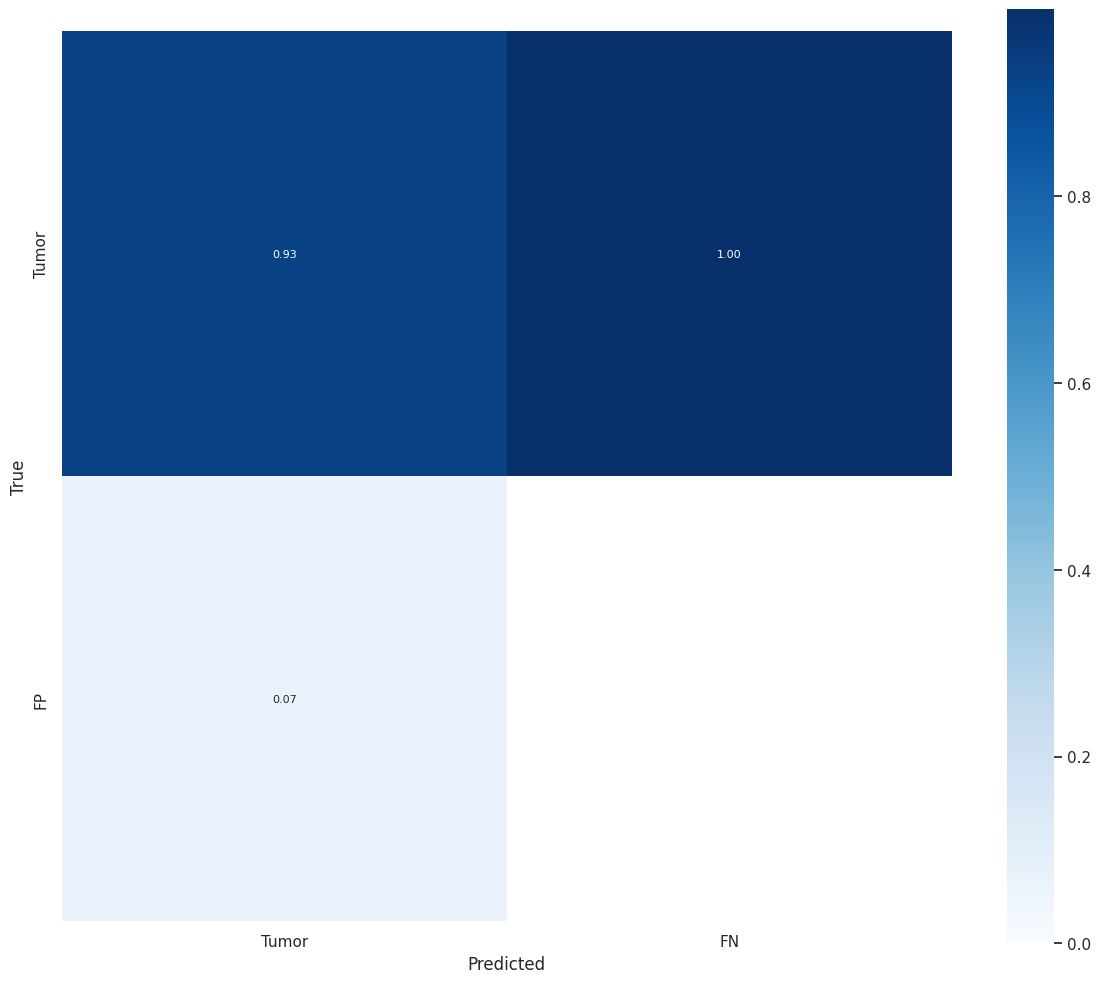

In [ ]:

import os

import numpy as np

from onemetric.cv.object_detection import ConfusionMatrix

keys = list(ds.images.keys())

annotation_batches, prediction_batches = [], []

for key in keys:
    annotation=ds.annotations[key]
    annotation_batch = np.column_stack((
        annotation.xyxy,
        annotation.class_id
    ))
    annotation_batches.append(annotation_batch)

    prediction=predictions[key]
    prediction_batch = np.column_stack((
        prediction.xyxy,
        prediction.class_id,
        prediction.confidence
    ))
    prediction_batches.append(prediction_batch)

confusion_matrix = ConfusionMatrix.from_detections(
    true_batches=annotation_batches,
    detection_batches=prediction_batches,
    num_classes=len(ds.classes),
    conf_threshold=CONFIDENCE_TRESHOLD
)

confusion_matrix.plot(os.path.join("/content", "confusion_matrix.png"), class_names=ds.classes)

In [ ]:
import random
import supervision as sv

random.seed(10)

MAX_IMAGE_COUNT = 5

n = min(MAX_IMAGE_COUNT, len(ds.images))

keys = list(ds.images.keys())
keys = random.sample(keys, n)

box_annotator = sv.BoxAnnotator()

images = []
titles = []

In [ ]:
detections_list = []
prediction_list = []
for key in keys:
    # Para anotações
    annotation_detections = ds.annotations[key]
    for detection in annotation_detections:
        detections_list.append(detection[0])

    # Para previsões
    prediction_detections = predictions[key]
    for prediction in prediction_detections:
        prediction_list.append(prediction[0])

In [ ]:
import numpy as np


def iou(box1, box2):
    # Verifica se as bounding boxes são válidas.
    if box1[2] is None or box2[2] is None:
        return 0.0

    # Calcula as interseções das bounding boxes.
    inter_top = np.maximum(box1[0], box2[0])
    inter_bottom = np.minimum(box1[2], box2[2])
    inter_left = np.maximum(box1[1], box2[1])
    inter_right = np.minimum(box1[3], box2[3])
    inter_area = (inter_right - inter_left) * (inter_bottom - inter_top)

    # Calcula as áreas das bounding boxes.
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    # Calcula o IoU.
    iou = inter_area / (box1_area + box2_area - inter_area)

    return iou

for i in range(len(detections_list)):
  iou_score = iou(detections_list[i], prediction_list[i])

  # Imprime o IoU.
  print(iou_score)

0.8873508
0.8898279
0.91539186
0.91630524
0.8592779


In [ ]:
!zip -r /content/YoloNas.zip /content/checkpoints

<class 'list'>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
%cp -av "/content/YoloNas.Zip" "/content/drive/MyDrive"